# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

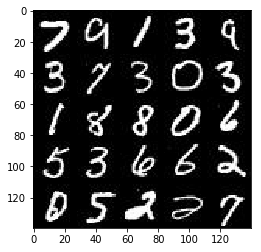

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

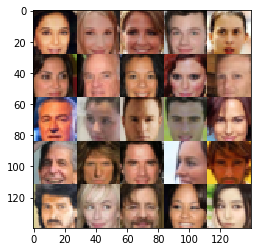

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    real_input_img = tf.placeholder(dtype=tf.float32, shape=(None, image_width, image_height, image_channels) )
    z_input = tf.placeholder(dtype=tf.float32, shape=(None,z_dim))
    learninig_rate = tf.placeholder(dtype=tf.float32, shape=(None))
    return real_input_img, z_input, learninig_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False ):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha=0.2
    keep_prob = 0.8
    
    with tf.variable_scope('discriminator', reuse=reuse):

        conv1 = tf.layers.conv2d(images, 64,5,2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        leaky_relu1 = tf.maximum(conv1 * alpha, conv1)
        dropout1 = tf.nn.dropout(leaky_relu1, keep_prob=keep_prob)
        
        
        conv2 = tf.layers.conv2d(dropout1, 128,5,2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        batch_normalization2 = tf.layers.batch_normalization(conv2, training=True)
        leaky_relu2 = tf.maximum(batch_normalization2 * alpha, batch_normalization2)
        dropout2 = tf.nn.dropout(leaky_relu2, keep_prob=keep_prob)


        conv3 = tf.layers.conv2d(leaky_relu2, 265,5,1, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        batch_normalization3 = tf.layers.batch_normalization(conv3, training=True)
        leaky_relu3 = tf.maximum(batch_normalization3 * alpha, batch_normalization3)
        dropout3 = tf.nn.dropout(leaky_relu3, keep_prob=keep_prob)


        conv4 = tf.layers.conv2d(leaky_relu3, 512,5,1, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
        batch_normalization4 = tf.layers.batch_normalization(conv4, training=True)
        leaky_relu4 = tf.maximum(batch_normalization4 * alpha, batch_normalization4)
        dropout4 = tf.nn.dropout(leaky_relu4, keep_prob=keep_prob)


        flattened = tf.reshape(dropout4, (-1, 7*7*512))
        logits = tf.layers.dense(flattened, 1)
        output = tf.sigmoid(logits)

        return output, logits





"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    keep_prob = 0.8

    
    with tf.variable_scope('generator', reuse=not is_train):
        

            dense = tf.layers.dense(z, 7*7*512)
            dense = tf.reshape(dense, (-1, 7, 7, 512))
            dense = tf.maximum(dense * alpha, dense)

            #reverse convolutions
            reconv1 = tf.layers.conv2d_transpose(dense, 265,5,1, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
            batch_normalization1 = tf.layers.batch_normalization(reconv1, training=is_train)
            leaky_relu1 = tf.maximum(batch_normalization1 * alpha, batch_normalization1)
            dropout1 = tf.nn.dropout(leaky_relu1, keep_prob=keep_prob)


            reconv2 = tf.layers.conv2d_transpose(dropout1, 128,5,1, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
            batch_normalization2 = tf.layers.batch_normalization(reconv2, training=is_train)
            leaky_relu2 = tf.maximum(batch_normalization2 * alpha, batch_normalization2)
            dropout2 = tf.nn.dropout(leaky_relu2, keep_prob=keep_prob)


            reconv3 = tf.layers.conv2d_transpose(dropout2, 64,5,2, kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
            batch_normalization3 = tf.layers.batch_normalization(reconv3, training=is_train)
            leaky_relu3 = tf.maximum(batch_normalization3 * alpha, batch_normalization3)
            dropout3 = tf.nn.dropout(leaky_relu3, keep_prob=keep_prob)


            #logits and outputs
            logits = tf.layers.conv2d_transpose(dropout3, out_channel_dim, 3,2,  kernel_initializer=tf.contrib.layers.xavier_initializer(), padding='same')
            output = tf.tanh(logits)

            return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                              labels=tf.ones_like(d_model_real) * 0.9))
    d_loss_fake = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                              labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
                 tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                         labels=tf.ones_like(d_model_fake)))
    

    return d_loss, g_loss   



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """    
 # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope='generator')):
        g_train_opt = tf.train.AdamOptimizer(learning_rate = learning_rate,beta1 = beta1).minimize(g_loss, var_list = g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 1
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
   

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.8517... Generator Loss: 0.8006
Epoch 1/2... Discriminator Loss: 8.9211... Generator Loss: 0.0014
Epoch 1/2... Discriminator Loss: 21.1990... Generator Loss: 0.0000
Epoch 1/2... Discriminator Loss: 1.6209... Generator Loss: 2.7006
Epoch 1/2... Discriminator Loss: 3.6525... Generator Loss: 0.2910
Epoch 1/2... Discriminator Loss: 17.3482... Generator Loss: 0.0000
Epoch 1/2... Discriminator Loss: 4.9240... Generator Loss: 0.0520
Epoch 1/2... Discriminator Loss: 5.2298... Generator Loss: 0.0981
Epoch 1/2... Discriminator Loss: 4.9106... Generator Loss: 0.6288
Epoch 1/2... Discriminator Loss: 6.9293... Generator Loss: 0.1907
Epoch 1/2... Discriminator Loss: 1.3863... Generator Loss: 3.1028
Epoch 1/2... Discriminator Loss: 3.5350... Generator Loss: 0.5572
Epoch 1/2... Discriminator Loss: 2.6769... Generator Loss: 0.4718
Epoch 1/2... Discriminator Loss: 3.4174... Generator Loss: 0.8875
Epoch 1/2... Discriminator Loss: 14.3861... Generator Loss: 0.0005
Epoch 1

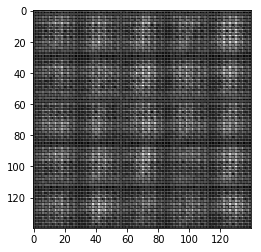

Epoch 1/2... Discriminator Loss: 3.3956... Generator Loss: 0.0604
Epoch 1/2... Discriminator Loss: 1.5332... Generator Loss: 4.9041
Epoch 1/2... Discriminator Loss: 3.5204... Generator Loss: 0.1096
Epoch 1/2... Discriminator Loss: 2.1680... Generator Loss: 0.3715
Epoch 1/2... Discriminator Loss: 1.6977... Generator Loss: 3.6110
Epoch 1/2... Discriminator Loss: 3.5033... Generator Loss: 0.1141
Epoch 1/2... Discriminator Loss: 1.0774... Generator Loss: 1.9626
Epoch 1/2... Discriminator Loss: 2.6039... Generator Loss: 0.2825
Epoch 1/2... Discriminator Loss: 1.3361... Generator Loss: 0.5701
Epoch 1/2... Discriminator Loss: 3.8730... Generator Loss: 0.0652
Epoch 1/2... Discriminator Loss: 1.0270... Generator Loss: 1.3566
Epoch 1/2... Discriminator Loss: 3.5249... Generator Loss: 0.1436
Epoch 1/2... Discriminator Loss: 2.1795... Generator Loss: 6.9155
Epoch 1/2... Discriminator Loss: 2.2422... Generator Loss: 0.5888
Epoch 1/2... Discriminator Loss: 3.1485... Generator Loss: 0.1051
Epoch 1/2.

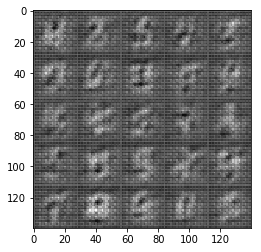

Epoch 1/2... Discriminator Loss: 0.8982... Generator Loss: 1.4598
Epoch 1/2... Discriminator Loss: 0.8891... Generator Loss: 1.0694
Epoch 1/2... Discriminator Loss: 1.1102... Generator Loss: 0.7404
Epoch 1/2... Discriminator Loss: 1.0211... Generator Loss: 2.8210
Epoch 1/2... Discriminator Loss: 2.3294... Generator Loss: 0.2009
Epoch 1/2... Discriminator Loss: 0.7218... Generator Loss: 2.7386
Epoch 1/2... Discriminator Loss: 1.8669... Generator Loss: 0.2789
Epoch 1/2... Discriminator Loss: 0.9309... Generator Loss: 1.2674
Epoch 1/2... Discriminator Loss: 0.8285... Generator Loss: 1.5194
Epoch 1/2... Discriminator Loss: 0.8027... Generator Loss: 1.3547
Epoch 1/2... Discriminator Loss: 0.8612... Generator Loss: 1.1730
Epoch 1/2... Discriminator Loss: 1.7633... Generator Loss: 0.3597
Epoch 1/2... Discriminator Loss: 0.8168... Generator Loss: 1.3531
Epoch 1/2... Discriminator Loss: 0.9282... Generator Loss: 0.8745
Epoch 1/2... Discriminator Loss: 0.7946... Generator Loss: 1.1910
Epoch 1/2.

Epoch 1/2... Discriminator Loss: 0.6276... Generator Loss: 1.9989
Epoch 1/2... Discriminator Loss: 0.6653... Generator Loss: 1.5926
Epoch 1/2... Discriminator Loss: 0.5700... Generator Loss: 2.1670
Epoch 1/2... Discriminator Loss: 0.4836... Generator Loss: 2.7884
Epoch 1/2... Discriminator Loss: 0.5475... Generator Loss: 2.0724
Epoch 1/2... Discriminator Loss: 0.8308... Generator Loss: 1.2020
Epoch 1/2... Discriminator Loss: 0.5634... Generator Loss: 2.0298
Epoch 1/2... Discriminator Loss: 0.7372... Generator Loss: 1.5450
Epoch 1/2... Discriminator Loss: 0.4687... Generator Loss: 2.9688
Epoch 1/2... Discriminator Loss: 0.5404... Generator Loss: 1.9968
Epoch 1/2... Discriminator Loss: 0.5012... Generator Loss: 3.5600
Epoch 1/2... Discriminator Loss: 0.4677... Generator Loss: 2.5774
Epoch 1/2... Discriminator Loss: 0.4251... Generator Loss: 3.0148
Epoch 1/2... Discriminator Loss: 0.5481... Generator Loss: 1.9740
Epoch 1/2... Discriminator Loss: 0.5012... Generator Loss: 2.7892
Epoch 1/2.

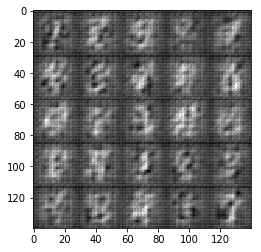

Epoch 1/2... Discriminator Loss: 0.9491... Generator Loss: 0.9888
Epoch 1/2... Discriminator Loss: 0.5382... Generator Loss: 2.5103
Epoch 1/2... Discriminator Loss: 0.6164... Generator Loss: 1.7040
Epoch 1/2... Discriminator Loss: 0.6844... Generator Loss: 1.7319
Epoch 1/2... Discriminator Loss: 0.6040... Generator Loss: 2.0884
Epoch 1/2... Discriminator Loss: 0.4564... Generator Loss: 2.6055
Epoch 1/2... Discriminator Loss: 0.8508... Generator Loss: 1.1763
Epoch 1/2... Discriminator Loss: 0.4266... Generator Loss: 2.9327
Epoch 1/2... Discriminator Loss: 0.5391... Generator Loss: 2.8783
Epoch 1/2... Discriminator Loss: 0.4368... Generator Loss: 3.0876
Epoch 1/2... Discriminator Loss: 2.9426... Generator Loss: 0.1564
Epoch 1/2... Discriminator Loss: 3.1939... Generator Loss: 8.0009
Epoch 1/2... Discriminator Loss: 0.8598... Generator Loss: 2.1667
Epoch 1/2... Discriminator Loss: 2.9060... Generator Loss: 0.1096
Epoch 1/2... Discriminator Loss: 0.9841... Generator Loss: 3.6966
Epoch 1/2.

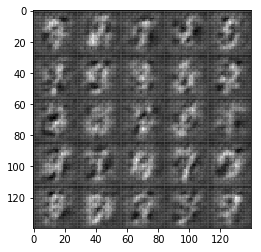

Epoch 1/2... Discriminator Loss: 0.9273... Generator Loss: 1.2701
Epoch 1/2... Discriminator Loss: 0.5923... Generator Loss: 4.1478
Epoch 1/2... Discriminator Loss: 0.7223... Generator Loss: 1.5796
Epoch 1/2... Discriminator Loss: 1.1759... Generator Loss: 0.8106
Epoch 1/2... Discriminator Loss: 0.8419... Generator Loss: 1.8560
Epoch 1/2... Discriminator Loss: 0.7455... Generator Loss: 1.7127
Epoch 1/2... Discriminator Loss: 0.6690... Generator Loss: 1.7983
Epoch 1/2... Discriminator Loss: 0.6103... Generator Loss: 1.6671
Epoch 1/2... Discriminator Loss: 0.6886... Generator Loss: 1.5718
Epoch 1/2... Discriminator Loss: 0.7891... Generator Loss: 1.4337
Epoch 1/2... Discriminator Loss: 0.6217... Generator Loss: 1.8553
Epoch 1/2... Discriminator Loss: 0.7596... Generator Loss: 1.2703
Epoch 1/2... Discriminator Loss: 0.6398... Generator Loss: 1.5809
Epoch 1/2... Discriminator Loss: 0.5483... Generator Loss: 2.0553
Epoch 1/2... Discriminator Loss: 1.0982... Generator Loss: 0.7618
Epoch 1/2.

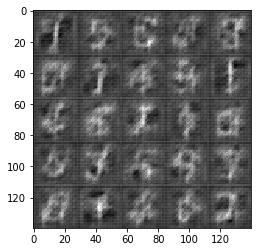

Epoch 1/2... Discriminator Loss: 0.7110... Generator Loss: 5.1315
Epoch 1/2... Discriminator Loss: 2.6339... Generator Loss: 0.1731
Epoch 1/2... Discriminator Loss: 0.9001... Generator Loss: 1.2741
Epoch 1/2... Discriminator Loss: 0.8285... Generator Loss: 2.9799
Epoch 1/2... Discriminator Loss: 0.9771... Generator Loss: 1.1769
Epoch 1/2... Discriminator Loss: 1.4150... Generator Loss: 0.7159
Epoch 1/2... Discriminator Loss: 1.1110... Generator Loss: 0.8342
Epoch 1/2... Discriminator Loss: 0.8261... Generator Loss: 1.2481
Epoch 1/2... Discriminator Loss: 0.5701... Generator Loss: 2.3453
Epoch 1/2... Discriminator Loss: 1.8172... Generator Loss: 0.3650
Epoch 1/2... Discriminator Loss: 0.9291... Generator Loss: 1.1029
Epoch 1/2... Discriminator Loss: 1.2792... Generator Loss: 0.6836
Epoch 1/2... Discriminator Loss: 0.9594... Generator Loss: 1.0030
Epoch 1/2... Discriminator Loss: 0.7964... Generator Loss: 1.3607
Epoch 1/2... Discriminator Loss: 3.3383... Generator Loss: 0.1321
Epoch 1/2.

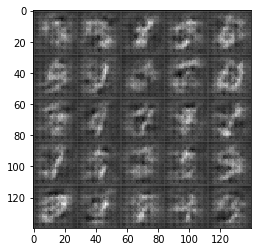

Epoch 1/2... Discriminator Loss: 1.1514... Generator Loss: 0.7201
Epoch 1/2... Discriminator Loss: 1.0548... Generator Loss: 0.8386
Epoch 1/2... Discriminator Loss: 1.7780... Generator Loss: 3.6135
Epoch 1/2... Discriminator Loss: 1.0576... Generator Loss: 1.2680
Epoch 1/2... Discriminator Loss: 0.7254... Generator Loss: 1.6439
Epoch 1/2... Discriminator Loss: 1.6484... Generator Loss: 0.9360
Epoch 1/2... Discriminator Loss: 0.9385... Generator Loss: 1.0390
Epoch 1/2... Discriminator Loss: 1.6174... Generator Loss: 2.7139
Epoch 1/2... Discriminator Loss: 1.1688... Generator Loss: 0.8679
Epoch 1/2... Discriminator Loss: 2.3101... Generator Loss: 0.2076
Epoch 1/2... Discriminator Loss: 2.8251... Generator Loss: 5.9089
Epoch 1/2... Discriminator Loss: 1.2002... Generator Loss: 1.3419
Epoch 1/2... Discriminator Loss: 0.8922... Generator Loss: 1.6516
Epoch 1/2... Discriminator Loss: 2.7364... Generator Loss: 0.1421
Epoch 1/2... Discriminator Loss: 0.7319... Generator Loss: 1.9703
Epoch 1/2.

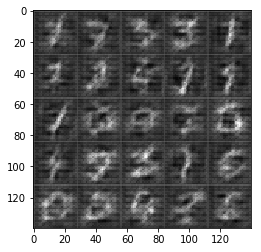

Epoch 1/2... Discriminator Loss: 0.6587... Generator Loss: 2.1116
Epoch 1/2... Discriminator Loss: 0.6801... Generator Loss: 1.8273
Epoch 1/2... Discriminator Loss: 1.1801... Generator Loss: 0.7381
Epoch 1/2... Discriminator Loss: 0.9139... Generator Loss: 1.0132
Epoch 1/2... Discriminator Loss: 0.9746... Generator Loss: 2.6407
Epoch 1/2... Discriminator Loss: 0.8576... Generator Loss: 1.4822
Epoch 1/2... Discriminator Loss: 1.8468... Generator Loss: 0.3183
Epoch 1/2... Discriminator Loss: 0.9175... Generator Loss: 1.0986
Epoch 1/2... Discriminator Loss: 0.9061... Generator Loss: 2.6914
Epoch 1/2... Discriminator Loss: 0.7199... Generator Loss: 1.4085
Epoch 1/2... Discriminator Loss: 1.7474... Generator Loss: 0.4831
Epoch 1/2... Discriminator Loss: 1.1398... Generator Loss: 3.5225
Epoch 1/2... Discriminator Loss: 0.8458... Generator Loss: 1.1465
Epoch 1/2... Discriminator Loss: 1.8589... Generator Loss: 0.4347
Epoch 1/2... Discriminator Loss: 0.7790... Generator Loss: 1.9309
Epoch 1/2.

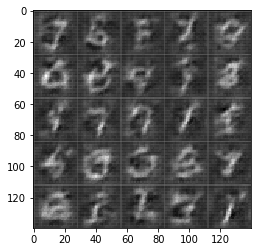

Epoch 1/2... Discriminator Loss: 2.2218... Generator Loss: 0.2565
Epoch 1/2... Discriminator Loss: 0.5086... Generator Loss: 2.7525
Epoch 1/2... Discriminator Loss: 0.7369... Generator Loss: 1.4531
Epoch 1/2... Discriminator Loss: 1.7265... Generator Loss: 0.4277
Epoch 1/2... Discriminator Loss: 0.5075... Generator Loss: 2.3658
Epoch 1/2... Discriminator Loss: 2.0228... Generator Loss: 0.3150
Epoch 1/2... Discriminator Loss: 0.9973... Generator Loss: 2.5879
Epoch 1/2... Discriminator Loss: 1.6178... Generator Loss: 0.4237
Epoch 1/2... Discriminator Loss: 1.2503... Generator Loss: 0.7371
Epoch 1/2... Discriminator Loss: 0.8775... Generator Loss: 2.7288
Epoch 1/2... Discriminator Loss: 1.9738... Generator Loss: 0.4868
Epoch 1/2... Discriminator Loss: 1.7440... Generator Loss: 0.3556
Epoch 1/2... Discriminator Loss: 0.6155... Generator Loss: 1.9219
Epoch 1/2... Discriminator Loss: 1.7910... Generator Loss: 0.3925
Epoch 1/2... Discriminator Loss: 1.3949... Generator Loss: 0.5403
Epoch 1/2.

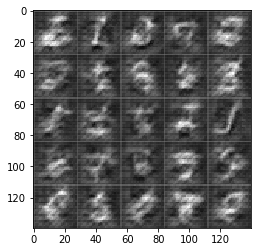

Epoch 1/2... Discriminator Loss: 0.7221... Generator Loss: 1.5439
Epoch 1/2... Discriminator Loss: 1.1511... Generator Loss: 0.7834
Epoch 1/2... Discriminator Loss: 0.7128... Generator Loss: 2.5718
Epoch 1/2... Discriminator Loss: 0.4807... Generator Loss: 2.3469
Epoch 1/2... Discriminator Loss: 1.3793... Generator Loss: 0.7559
Epoch 1/2... Discriminator Loss: 0.7875... Generator Loss: 1.2532
Epoch 1/2... Discriminator Loss: 0.5060... Generator Loss: 3.0750
Epoch 1/2... Discriminator Loss: 0.7639... Generator Loss: 1.5214
Epoch 1/2... Discriminator Loss: 2.0739... Generator Loss: 0.2534
Epoch 1/2... Discriminator Loss: 0.7296... Generator Loss: 1.3644
Epoch 1/2... Discriminator Loss: 0.5313... Generator Loss: 2.2061
Epoch 1/2... Discriminator Loss: 2.2018... Generator Loss: 0.2319
Epoch 1/2... Discriminator Loss: 1.0807... Generator Loss: 2.7293
Epoch 1/2... Discriminator Loss: 2.9863... Generator Loss: 0.1181
Epoch 1/2... Discriminator Loss: 3.2830... Generator Loss: 6.8136
Epoch 1/2.

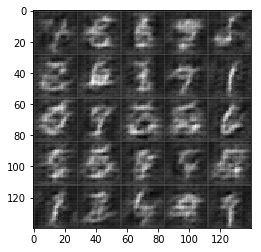

Epoch 1/2... Discriminator Loss: 0.4282... Generator Loss: 4.0390
Epoch 1/2... Discriminator Loss: 1.6487... Generator Loss: 0.5506
Epoch 1/2... Discriminator Loss: 1.3517... Generator Loss: 0.6576
Epoch 1/2... Discriminator Loss: 1.1120... Generator Loss: 3.1518
Epoch 1/2... Discriminator Loss: 1.0282... Generator Loss: 2.0556
Epoch 1/2... Discriminator Loss: 0.9780... Generator Loss: 1.2164
Epoch 1/2... Discriminator Loss: 1.8366... Generator Loss: 0.4033
Epoch 1/2... Discriminator Loss: 0.9276... Generator Loss: 1.8063
Epoch 1/2... Discriminator Loss: 1.3546... Generator Loss: 0.6830
Epoch 1/2... Discriminator Loss: 0.8411... Generator Loss: 1.1991
Epoch 1/2... Discriminator Loss: 0.9694... Generator Loss: 0.8538
Epoch 1/2... Discriminator Loss: 0.5866... Generator Loss: 3.4876
Epoch 1/2... Discriminator Loss: 0.4678... Generator Loss: 3.6948
Epoch 1/2... Discriminator Loss: 0.9981... Generator Loss: 1.2937
Epoch 1/2... Discriminator Loss: 1.1635... Generator Loss: 0.6597
Epoch 1/2.

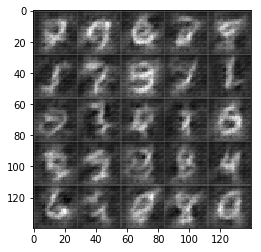

Epoch 1/2... Discriminator Loss: 1.4693... Generator Loss: 0.7570
Epoch 1/2... Discriminator Loss: 1.2608... Generator Loss: 0.6542
Epoch 1/2... Discriminator Loss: 1.3286... Generator Loss: 0.5586
Epoch 1/2... Discriminator Loss: 0.7299... Generator Loss: 1.9027
Epoch 1/2... Discriminator Loss: 3.2490... Generator Loss: 0.0816
Epoch 1/2... Discriminator Loss: 0.5283... Generator Loss: 1.9599
Epoch 1/2... Discriminator Loss: 0.6540... Generator Loss: 2.5220
Epoch 1/2... Discriminator Loss: 0.7673... Generator Loss: 1.4495
Epoch 1/2... Discriminator Loss: 2.3487... Generator Loss: 0.1820
Epoch 1/2... Discriminator Loss: 1.1378... Generator Loss: 0.7292
Epoch 1/2... Discriminator Loss: 1.6296... Generator Loss: 0.4071
Epoch 1/2... Discriminator Loss: 1.0224... Generator Loss: 3.8973
Epoch 1/2... Discriminator Loss: 1.4420... Generator Loss: 0.6356
Epoch 1/2... Discriminator Loss: 1.9927... Generator Loss: 0.4853
Epoch 1/2... Discriminator Loss: 1.1387... Generator Loss: 1.0190
Epoch 1/2.

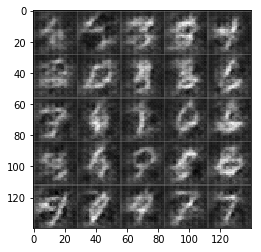

Epoch 1/2... Discriminator Loss: 0.7394... Generator Loss: 1.6698
Epoch 1/2... Discriminator Loss: 1.4702... Generator Loss: 0.5015
Epoch 1/2... Discriminator Loss: 0.8048... Generator Loss: 1.4765
Epoch 1/2... Discriminator Loss: 1.3968... Generator Loss: 0.8953
Epoch 1/2... Discriminator Loss: 1.0068... Generator Loss: 0.8379
Epoch 1/2... Discriminator Loss: 0.6780... Generator Loss: 1.5371
Epoch 1/2... Discriminator Loss: 0.5933... Generator Loss: 2.0917
Epoch 1/2... Discriminator Loss: 1.4097... Generator Loss: 0.5044
Epoch 1/2... Discriminator Loss: 0.7091... Generator Loss: 1.5356
Epoch 1/2... Discriminator Loss: 0.6847... Generator Loss: 1.4971
Epoch 1/2... Discriminator Loss: 0.5789... Generator Loss: 1.6798
Epoch 1/2... Discriminator Loss: 0.7339... Generator Loss: 1.4170
Epoch 1/2... Discriminator Loss: 3.6108... Generator Loss: 0.0739
Epoch 1/2... Discriminator Loss: 1.5641... Generator Loss: 3.9259
Epoch 1/2... Discriminator Loss: 0.6402... Generator Loss: 1.9130
Epoch 1/2.

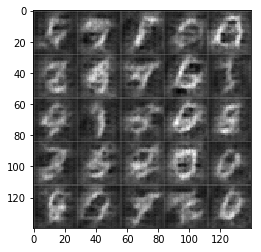

Epoch 1/2... Discriminator Loss: 1.8772... Generator Loss: 0.2917
Epoch 1/2... Discriminator Loss: 0.7569... Generator Loss: 1.4940
Epoch 1/2... Discriminator Loss: 0.7483... Generator Loss: 2.3224
Epoch 1/2... Discriminator Loss: 1.0643... Generator Loss: 0.9003
Epoch 1/2... Discriminator Loss: 0.7715... Generator Loss: 1.2587
Epoch 1/2... Discriminator Loss: 0.7724... Generator Loss: 1.5519
Epoch 1/2... Discriminator Loss: 0.9155... Generator Loss: 1.0928
Epoch 1/2... Discriminator Loss: 1.0094... Generator Loss: 0.8040
Epoch 1/2... Discriminator Loss: 2.3332... Generator Loss: 5.3399
Epoch 1/2... Discriminator Loss: 1.2084... Generator Loss: 0.9409
Epoch 1/2... Discriminator Loss: 1.6429... Generator Loss: 0.5649
Epoch 1/2... Discriminator Loss: 0.8775... Generator Loss: 2.3988
Epoch 1/2... Discriminator Loss: 0.9873... Generator Loss: 0.8180
Epoch 1/2... Discriminator Loss: 2.7635... Generator Loss: 0.1694
Epoch 1/2... Discriminator Loss: 2.7657... Generator Loss: 3.7962
Epoch 1/2.

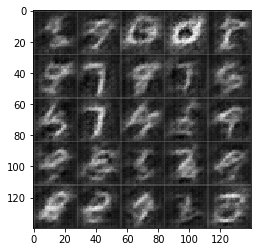

Epoch 1/2... Discriminator Loss: 0.6572... Generator Loss: 1.7511
Epoch 1/2... Discriminator Loss: 2.0490... Generator Loss: 0.2824
Epoch 1/2... Discriminator Loss: 1.1712... Generator Loss: 0.9153
Epoch 1/2... Discriminator Loss: 1.0207... Generator Loss: 1.0238
Epoch 1/2... Discriminator Loss: 1.0168... Generator Loss: 3.0439
Epoch 1/2... Discriminator Loss: 0.8450... Generator Loss: 1.6565
Epoch 1/2... Discriminator Loss: 2.0815... Generator Loss: 0.2644
Epoch 1/2... Discriminator Loss: 0.9959... Generator Loss: 1.2036
Epoch 1/2... Discriminator Loss: 0.5068... Generator Loss: 2.9502
Epoch 1/2... Discriminator Loss: 1.1898... Generator Loss: 0.8072
Epoch 1/2... Discriminator Loss: 1.5148... Generator Loss: 0.4428
Epoch 1/2... Discriminator Loss: 0.7221... Generator Loss: 1.4369
Epoch 1/2... Discriminator Loss: 1.7898... Generator Loss: 0.4159
Epoch 1/2... Discriminator Loss: 0.6368... Generator Loss: 1.7548
Epoch 1/2... Discriminator Loss: 0.8518... Generator Loss: 1.2852
Epoch 1/2.

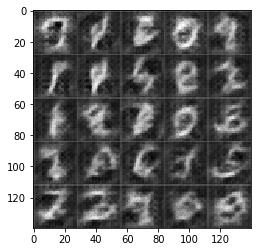

Epoch 1/2... Discriminator Loss: 1.3219... Generator Loss: 0.8975
Epoch 1/2... Discriminator Loss: 1.1473... Generator Loss: 0.8176
Epoch 1/2... Discriminator Loss: 1.0305... Generator Loss: 1.0828
Epoch 1/2... Discriminator Loss: 0.5774... Generator Loss: 1.9274
Epoch 1/2... Discriminator Loss: 1.0637... Generator Loss: 0.7927
Epoch 1/2... Discriminator Loss: 0.6557... Generator Loss: 1.9565
Epoch 1/2... Discriminator Loss: 0.8944... Generator Loss: 1.0396
Epoch 1/2... Discriminator Loss: 0.7555... Generator Loss: 1.5421
Epoch 1/2... Discriminator Loss: 1.8009... Generator Loss: 0.4377
Epoch 1/2... Discriminator Loss: 1.6681... Generator Loss: 0.3646
Epoch 1/2... Discriminator Loss: 0.8619... Generator Loss: 1.1698
Epoch 1/2... Discriminator Loss: 0.6783... Generator Loss: 1.8161
Epoch 1/2... Discriminator Loss: 0.6591... Generator Loss: 1.7509
Epoch 1/2... Discriminator Loss: 3.5524... Generator Loss: 0.1685
Epoch 1/2... Discriminator Loss: 0.6841... Generator Loss: 2.0924
Epoch 1/2.

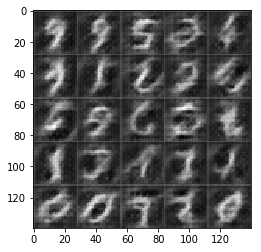

Epoch 1/2... Discriminator Loss: 2.2313... Generator Loss: 0.3061
Epoch 1/2... Discriminator Loss: 0.9723... Generator Loss: 1.7997
Epoch 1/2... Discriminator Loss: 2.3413... Generator Loss: 0.2625
Epoch 1/2... Discriminator Loss: 1.8978... Generator Loss: 0.3527
Epoch 1/2... Discriminator Loss: 1.8592... Generator Loss: 0.3065
Epoch 1/2... Discriminator Loss: 0.9143... Generator Loss: 1.3157
Epoch 1/2... Discriminator Loss: 1.2156... Generator Loss: 0.7392
Epoch 1/2... Discriminator Loss: 3.4957... Generator Loss: 0.1757
Epoch 1/2... Discriminator Loss: 1.0394... Generator Loss: 1.1021
Epoch 1/2... Discriminator Loss: 1.1403... Generator Loss: 2.1260
Epoch 1/2... Discriminator Loss: 1.9259... Generator Loss: 0.3922
Epoch 1/2... Discriminator Loss: 3.4353... Generator Loss: 0.0926
Epoch 1/2... Discriminator Loss: 1.0276... Generator Loss: 3.7808
Epoch 1/2... Discriminator Loss: 0.7906... Generator Loss: 1.6141
Epoch 1/2... Discriminator Loss: 1.2121... Generator Loss: 0.9485
Epoch 1/2.

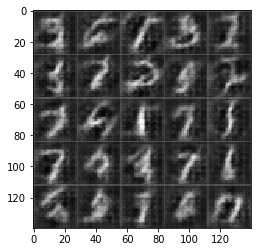

Epoch 1/2... Discriminator Loss: 0.8395... Generator Loss: 1.2252
Epoch 1/2... Discriminator Loss: 0.8798... Generator Loss: 1.0944
Epoch 1/2... Discriminator Loss: 1.6345... Generator Loss: 0.4452
Epoch 1/2... Discriminator Loss: 0.8892... Generator Loss: 1.1977
Epoch 1/2... Discriminator Loss: 0.7903... Generator Loss: 1.1151
Epoch 1/2... Discriminator Loss: 2.5723... Generator Loss: 0.1816
Epoch 1/2... Discriminator Loss: 1.0863... Generator Loss: 0.9545
Epoch 1/2... Discriminator Loss: 0.6872... Generator Loss: 2.6759
Epoch 1/2... Discriminator Loss: 3.2783... Generator Loss: 0.0954
Epoch 1/2... Discriminator Loss: 1.5191... Generator Loss: 0.4834
Epoch 1/2... Discriminator Loss: 1.0573... Generator Loss: 1.0160
Epoch 1/2... Discriminator Loss: 0.6038... Generator Loss: 1.9660
Epoch 1/2... Discriminator Loss: 0.7265... Generator Loss: 1.5339
Epoch 1/2... Discriminator Loss: 0.6485... Generator Loss: 1.7218
Epoch 1/2... Discriminator Loss: 0.4890... Generator Loss: 2.4821
Epoch 1/2.

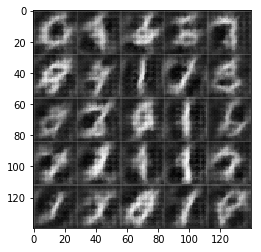

Epoch 1/2... Discriminator Loss: 1.2168... Generator Loss: 0.7912
Epoch 1/2... Discriminator Loss: 1.0686... Generator Loss: 2.1409
Epoch 1/2... Discriminator Loss: 2.0449... Generator Loss: 0.3306
Epoch 1/2... Discriminator Loss: 0.9981... Generator Loss: 0.9934
Epoch 1/2... Discriminator Loss: 1.1437... Generator Loss: 0.8199
Epoch 1/2... Discriminator Loss: 1.5981... Generator Loss: 0.4964
Epoch 1/2... Discriminator Loss: 1.0811... Generator Loss: 0.8419
Epoch 1/2... Discriminator Loss: 1.0538... Generator Loss: 0.9256
Epoch 1/2... Discriminator Loss: 1.1210... Generator Loss: 0.8380
Epoch 1/2... Discriminator Loss: 1.1543... Generator Loss: 0.9280
Epoch 1/2... Discriminator Loss: 0.9174... Generator Loss: 1.0527
Epoch 1/2... Discriminator Loss: 0.6147... Generator Loss: 1.8937
Epoch 1/2... Discriminator Loss: 2.2942... Generator Loss: 0.1838
Epoch 1/2... Discriminator Loss: 1.1138... Generator Loss: 0.7367
Epoch 1/2... Discriminator Loss: 0.6727... Generator Loss: 1.5901
Epoch 1/2.

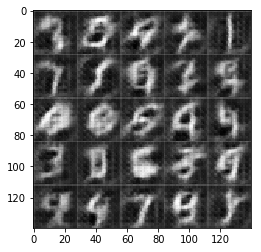

Epoch 1/2... Discriminator Loss: 1.5077... Generator Loss: 0.5712
Epoch 1/2... Discriminator Loss: 1.0462... Generator Loss: 1.1025
Epoch 1/2... Discriminator Loss: 0.8754... Generator Loss: 1.1357
Epoch 1/2... Discriminator Loss: 0.4740... Generator Loss: 2.4442
Epoch 1/2... Discriminator Loss: 1.4691... Generator Loss: 0.6879
Epoch 1/2... Discriminator Loss: 0.5713... Generator Loss: 2.1146
Epoch 1/2... Discriminator Loss: 0.8561... Generator Loss: 1.1530
Epoch 1/2... Discriminator Loss: 1.9461... Generator Loss: 0.2653
Epoch 1/2... Discriminator Loss: 1.4434... Generator Loss: 0.6550
Epoch 1/2... Discriminator Loss: 0.8193... Generator Loss: 2.5640
Epoch 1/2... Discriminator Loss: 0.6489... Generator Loss: 1.9730
Epoch 1/2... Discriminator Loss: 0.8801... Generator Loss: 1.2166
Epoch 1/2... Discriminator Loss: 2.1170... Generator Loss: 0.2425
Epoch 1/2... Discriminator Loss: 0.7793... Generator Loss: 1.1961
Epoch 1/2... Discriminator Loss: 0.6095... Generator Loss: 1.6743
Epoch 1/2.

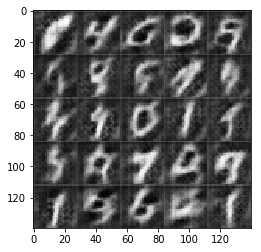

Epoch 1/2... Discriminator Loss: 0.8332... Generator Loss: 1.6723
Epoch 1/2... Discriminator Loss: 2.4492... Generator Loss: 0.1735
Epoch 1/2... Discriminator Loss: 0.8150... Generator Loss: 1.3591
Epoch 1/2... Discriminator Loss: 1.7385... Generator Loss: 0.3195
Epoch 1/2... Discriminator Loss: 0.7993... Generator Loss: 2.0606
Epoch 1/2... Discriminator Loss: 0.7613... Generator Loss: 1.7085
Epoch 1/2... Discriminator Loss: 3.5697... Generator Loss: 0.1465
Epoch 1/2... Discriminator Loss: 0.6739... Generator Loss: 2.1793
Epoch 1/2... Discriminator Loss: 0.8365... Generator Loss: 2.7337
Epoch 1/2... Discriminator Loss: 3.1352... Generator Loss: 0.0930
Epoch 1/2... Discriminator Loss: 1.2760... Generator Loss: 0.6697
Epoch 1/2... Discriminator Loss: 0.8490... Generator Loss: 2.0519
Epoch 1/2... Discriminator Loss: 0.5958... Generator Loss: 2.8063
Epoch 1/2... Discriminator Loss: 0.6281... Generator Loss: 1.8160
Epoch 1/2... Discriminator Loss: 1.3112... Generator Loss: 0.7601
Epoch 1/2.

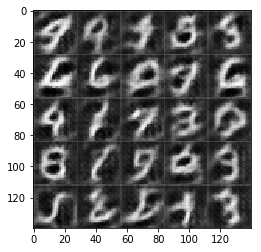

Epoch 1/2... Discriminator Loss: 1.0525... Generator Loss: 0.7405
Epoch 1/2... Discriminator Loss: 1.9325... Generator Loss: 5.3646
Epoch 1/2... Discriminator Loss: 1.3767... Generator Loss: 0.7199
Epoch 1/2... Discriminator Loss: 1.5129... Generator Loss: 0.4480
Epoch 1/2... Discriminator Loss: 1.2921... Generator Loss: 0.6813
Epoch 1/2... Discriminator Loss: 0.9269... Generator Loss: 0.9775
Epoch 1/2... Discriminator Loss: 0.7605... Generator Loss: 1.3045
Epoch 1/2... Discriminator Loss: 1.1790... Generator Loss: 0.7874
Epoch 1/2... Discriminator Loss: 0.8268... Generator Loss: 2.1623
Epoch 1/2... Discriminator Loss: 2.1327... Generator Loss: 0.4136
Epoch 1/2... Discriminator Loss: 1.0851... Generator Loss: 1.0183
Epoch 1/2... Discriminator Loss: 1.0288... Generator Loss: 2.5759
Epoch 1/2... Discriminator Loss: 1.2189... Generator Loss: 1.3211
Epoch 1/2... Discriminator Loss: 1.5977... Generator Loss: 0.4882
Epoch 1/2... Discriminator Loss: 1.1658... Generator Loss: 0.7788
Epoch 1/2.

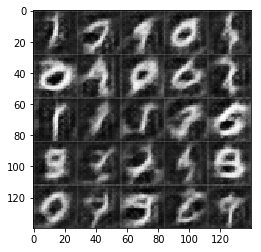

Epoch 1/2... Discriminator Loss: 3.0715... Generator Loss: 0.2016
Epoch 1/2... Discriminator Loss: 1.0924... Generator Loss: 0.8593
Epoch 1/2... Discriminator Loss: 1.1984... Generator Loss: 1.9027
Epoch 1/2... Discriminator Loss: 2.1225... Generator Loss: 0.2422
Epoch 1/2... Discriminator Loss: 2.2059... Generator Loss: 0.2351
Epoch 1/2... Discriminator Loss: 1.0627... Generator Loss: 2.2656
Epoch 1/2... Discriminator Loss: 3.3965... Generator Loss: 0.1310
Epoch 1/2... Discriminator Loss: 0.5536... Generator Loss: 2.2376
Epoch 1/2... Discriminator Loss: 0.5553... Generator Loss: 3.2660
Epoch 1/2... Discriminator Loss: 2.5174... Generator Loss: 0.4043
Epoch 1/2... Discriminator Loss: 1.9250... Generator Loss: 0.4539
Epoch 1/2... Discriminator Loss: 0.8974... Generator Loss: 3.0896
Epoch 1/2... Discriminator Loss: 0.9446... Generator Loss: 1.0707
Epoch 1/2... Discriminator Loss: 0.6703... Generator Loss: 2.8330
Epoch 1/2... Discriminator Loss: 3.2988... Generator Loss: 0.0957
Epoch 1/2.

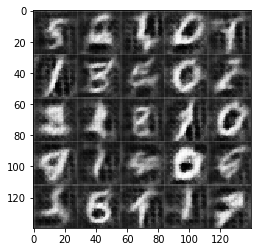

Epoch 1/2... Discriminator Loss: 1.9050... Generator Loss: 0.4404
Epoch 1/2... Discriminator Loss: 1.7463... Generator Loss: 0.5646
Epoch 1/2... Discriminator Loss: 0.7197... Generator Loss: 1.4560
Epoch 1/2... Discriminator Loss: 0.6853... Generator Loss: 2.3154
Epoch 1/2... Discriminator Loss: 2.5919... Generator Loss: 0.2170
Epoch 1/2... Discriminator Loss: 1.4650... Generator Loss: 0.4727
Epoch 1/2... Discriminator Loss: 1.1774... Generator Loss: 0.7959
Epoch 1/2... Discriminator Loss: 1.2300... Generator Loss: 0.7094
Epoch 1/2... Discriminator Loss: 0.6887... Generator Loss: 1.3830
Epoch 1/2... Discriminator Loss: 1.4614... Generator Loss: 0.5053
Epoch 1/2... Discriminator Loss: 1.2620... Generator Loss: 2.0507
Epoch 1/2... Discriminator Loss: 2.7414... Generator Loss: 0.1773
Epoch 1/2... Discriminator Loss: 0.7794... Generator Loss: 1.2974
Epoch 1/2... Discriminator Loss: 0.8574... Generator Loss: 1.3457
Epoch 1/2... Discriminator Loss: 0.8420... Generator Loss: 1.1952
Epoch 1/2.

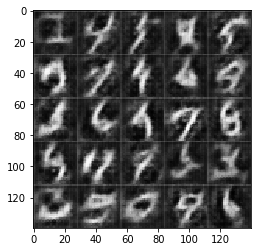

Epoch 1/2... Discriminator Loss: 0.7911... Generator Loss: 2.4613
Epoch 1/2... Discriminator Loss: 1.8086... Generator Loss: 0.4393
Epoch 1/2... Discriminator Loss: 1.4544... Generator Loss: 0.4872
Epoch 1/2... Discriminator Loss: 1.0982... Generator Loss: 1.3858
Epoch 1/2... Discriminator Loss: 1.6833... Generator Loss: 0.6530
Epoch 1/2... Discriminator Loss: 2.0483... Generator Loss: 0.3439
Epoch 1/2... Discriminator Loss: 1.2982... Generator Loss: 0.6400
Epoch 1/2... Discriminator Loss: 0.8209... Generator Loss: 1.3611
Epoch 1/2... Discriminator Loss: 2.8101... Generator Loss: 0.1427
Epoch 1/2... Discriminator Loss: 0.8814... Generator Loss: 2.3088
Epoch 1/2... Discriminator Loss: 1.6094... Generator Loss: 0.6045
Epoch 1/2... Discriminator Loss: 3.1033... Generator Loss: 0.2015
Epoch 1/2... Discriminator Loss: 1.2427... Generator Loss: 0.6743
Epoch 1/2... Discriminator Loss: 1.1332... Generator Loss: 0.8269
Epoch 1/2... Discriminator Loss: 1.1117... Generator Loss: 0.9630
Epoch 1/2.

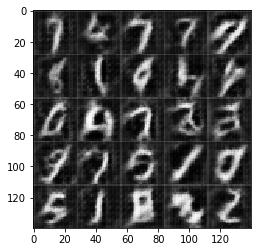

Epoch 1/2... Discriminator Loss: 0.6208... Generator Loss: 2.5790
Epoch 1/2... Discriminator Loss: 0.5660... Generator Loss: 1.9378
Epoch 1/2... Discriminator Loss: 1.1084... Generator Loss: 1.0763
Epoch 1/2... Discriminator Loss: 0.6373... Generator Loss: 1.8756
Epoch 1/2... Discriminator Loss: 0.5612... Generator Loss: 2.5992
Epoch 1/2... Discriminator Loss: 2.6525... Generator Loss: 0.1692
Epoch 1/2... Discriminator Loss: 1.9730... Generator Loss: 0.3565
Epoch 1/2... Discriminator Loss: 0.7655... Generator Loss: 2.3354
Epoch 1/2... Discriminator Loss: 0.4853... Generator Loss: 3.0436
Epoch 1/2... Discriminator Loss: 1.1185... Generator Loss: 0.9665
Epoch 1/2... Discriminator Loss: 1.0313... Generator Loss: 1.0231
Epoch 1/2... Discriminator Loss: 0.9088... Generator Loss: 1.1200
Epoch 1/2... Discriminator Loss: 1.0761... Generator Loss: 0.9542
Epoch 1/2... Discriminator Loss: 2.2064... Generator Loss: 0.2046
Epoch 1/2... Discriminator Loss: 1.1344... Generator Loss: 1.0151
Epoch 1/2.

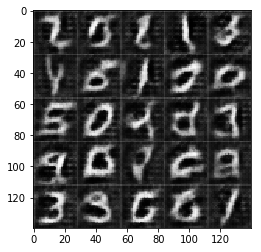

Epoch 1/2... Discriminator Loss: 0.6434... Generator Loss: 1.7765
Epoch 1/2... Discriminator Loss: 1.0250... Generator Loss: 0.9017
Epoch 1/2... Discriminator Loss: 0.6764... Generator Loss: 1.4281
Epoch 1/2... Discriminator Loss: 1.2484... Generator Loss: 0.7372
Epoch 1/2... Discriminator Loss: 0.9992... Generator Loss: 1.8863
Epoch 1/2... Discriminator Loss: 1.1323... Generator Loss: 0.8333
Epoch 1/2... Discriminator Loss: 0.7566... Generator Loss: 1.3438
Epoch 1/2... Discriminator Loss: 0.7689... Generator Loss: 1.3013
Epoch 1/2... Discriminator Loss: 1.2306... Generator Loss: 0.7056
Epoch 1/2... Discriminator Loss: 1.1047... Generator Loss: 0.7869
Epoch 1/2... Discriminator Loss: 1.8137... Generator Loss: 0.3398
Epoch 1/2... Discriminator Loss: 1.0899... Generator Loss: 0.8986
Epoch 1/2... Discriminator Loss: 0.9940... Generator Loss: 1.0238
Epoch 1/2... Discriminator Loss: 0.8425... Generator Loss: 1.0566
Epoch 1/2... Discriminator Loss: 0.8739... Generator Loss: 1.7297
Epoch 1/2.

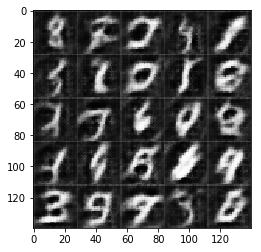

Epoch 1/2... Discriminator Loss: 0.9834... Generator Loss: 1.0390
Epoch 1/2... Discriminator Loss: 1.4552... Generator Loss: 0.5067
Epoch 1/2... Discriminator Loss: 0.7996... Generator Loss: 1.3366
Epoch 1/2... Discriminator Loss: 0.6269... Generator Loss: 1.8481
Epoch 1/2... Discriminator Loss: 0.9951... Generator Loss: 0.9332
Epoch 1/2... Discriminator Loss: 1.2401... Generator Loss: 0.7933
Epoch 1/2... Discriminator Loss: 1.2254... Generator Loss: 0.6779
Epoch 1/2... Discriminator Loss: 0.5849... Generator Loss: 2.1166
Epoch 1/2... Discriminator Loss: 0.8590... Generator Loss: 1.2525
Epoch 1/2... Discriminator Loss: 0.8606... Generator Loss: 0.9988
Epoch 1/2... Discriminator Loss: 3.8768... Generator Loss: 0.0520
Epoch 1/2... Discriminator Loss: 0.7501... Generator Loss: 1.3362
Epoch 1/2... Discriminator Loss: 4.0571... Generator Loss: 5.5580
Epoch 1/2... Discriminator Loss: 2.4220... Generator Loss: 0.2136
Epoch 1/2... Discriminator Loss: 1.3712... Generator Loss: 0.5843
Epoch 1/2.

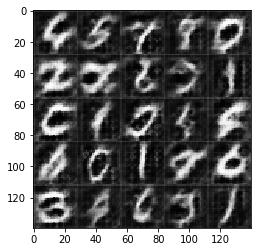

Epoch 1/2... Discriminator Loss: 0.8859... Generator Loss: 1.3738
Epoch 1/2... Discriminator Loss: 0.8952... Generator Loss: 1.1375
Epoch 1/2... Discriminator Loss: 0.7586... Generator Loss: 1.6278
Epoch 1/2... Discriminator Loss: 0.8548... Generator Loss: 1.3553
Epoch 1/2... Discriminator Loss: 1.8504... Generator Loss: 0.3704
Epoch 1/2... Discriminator Loss: 0.6423... Generator Loss: 1.6833
Epoch 1/2... Discriminator Loss: 0.5031... Generator Loss: 1.9927
Epoch 1/2... Discriminator Loss: 2.4773... Generator Loss: 0.2138
Epoch 1/2... Discriminator Loss: 2.1676... Generator Loss: 0.4247
Epoch 1/2... Discriminator Loss: 0.8569... Generator Loss: 1.5538
Epoch 1/2... Discriminator Loss: 0.8559... Generator Loss: 1.4375
Epoch 1/2... Discriminator Loss: 2.9107... Generator Loss: 0.1268
Epoch 1/2... Discriminator Loss: 1.3591... Generator Loss: 0.6215
Epoch 1/2... Discriminator Loss: 1.0773... Generator Loss: 0.7878
Epoch 1/2... Discriminator Loss: 0.5651... Generator Loss: 2.3425
Epoch 1/2.

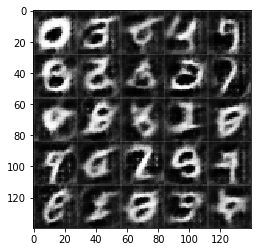

Epoch 1/2... Discriminator Loss: 0.8359... Generator Loss: 1.6993
Epoch 1/2... Discriminator Loss: 1.0026... Generator Loss: 0.9313
Epoch 1/2... Discriminator Loss: 1.3489... Generator Loss: 0.6638
Epoch 1/2... Discriminator Loss: 0.9322... Generator Loss: 1.1331
Epoch 1/2... Discriminator Loss: 2.0206... Generator Loss: 0.2543
Epoch 1/2... Discriminator Loss: 0.9005... Generator Loss: 1.0648
Epoch 1/2... Discriminator Loss: 0.5741... Generator Loss: 1.7889
Epoch 1/2... Discriminator Loss: 0.6062... Generator Loss: 1.6123
Epoch 1/2... Discriminator Loss: 1.5066... Generator Loss: 0.5414
Epoch 1/2... Discriminator Loss: 1.0633... Generator Loss: 0.8225
Epoch 1/2... Discriminator Loss: 0.7056... Generator Loss: 1.5996
Epoch 1/2... Discriminator Loss: 0.6317... Generator Loss: 1.5050
Epoch 1/2... Discriminator Loss: 0.6451... Generator Loss: 1.8359
Epoch 1/2... Discriminator Loss: 1.0552... Generator Loss: 0.9743
Epoch 1/2... Discriminator Loss: 0.8648... Generator Loss: 1.1418
Epoch 1/2.

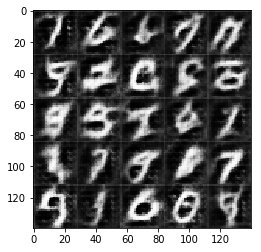

Epoch 1/2... Discriminator Loss: 1.3432... Generator Loss: 0.6192
Epoch 1/2... Discriminator Loss: 0.6329... Generator Loss: 1.7219
Epoch 1/2... Discriminator Loss: 2.3735... Generator Loss: 0.2502
Epoch 1/2... Discriminator Loss: 0.8575... Generator Loss: 1.4072
Epoch 1/2... Discriminator Loss: 0.9458... Generator Loss: 1.1021
Epoch 1/2... Discriminator Loss: 0.8413... Generator Loss: 1.1885
Epoch 1/2... Discriminator Loss: 0.7645... Generator Loss: 1.6953
Epoch 1/2... Discriminator Loss: 0.9242... Generator Loss: 1.3450
Epoch 1/2... Discriminator Loss: 1.2615... Generator Loss: 3.3683
Epoch 1/2... Discriminator Loss: 2.5269... Generator Loss: 0.1912
Epoch 1/2... Discriminator Loss: 0.9920... Generator Loss: 0.9089
Epoch 1/2... Discriminator Loss: 0.5366... Generator Loss: 2.4307
Epoch 1/2... Discriminator Loss: 3.4301... Generator Loss: 0.0811
Epoch 1/2... Discriminator Loss: 0.8163... Generator Loss: 1.2352
Epoch 1/2... Discriminator Loss: 0.9634... Generator Loss: 0.9335
Epoch 1/2.

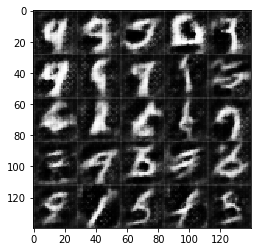

Epoch 1/2... Discriminator Loss: 2.3717... Generator Loss: 0.3117
Epoch 1/2... Discriminator Loss: 1.8537... Generator Loss: 0.3251
Epoch 1/2... Discriminator Loss: 1.0081... Generator Loss: 1.2785
Epoch 1/2... Discriminator Loss: 1.2988... Generator Loss: 0.6662
Epoch 1/2... Discriminator Loss: 0.8794... Generator Loss: 1.4252
Epoch 1/2... Discriminator Loss: 2.7224... Generator Loss: 0.1780
Epoch 1/2... Discriminator Loss: 1.4411... Generator Loss: 2.4646
Epoch 1/2... Discriminator Loss: 1.7082... Generator Loss: 0.4864
Epoch 1/2... Discriminator Loss: 1.4758... Generator Loss: 0.5019
Epoch 1/2... Discriminator Loss: 0.9505... Generator Loss: 2.1851
Epoch 1/2... Discriminator Loss: 0.8407... Generator Loss: 1.3129
Epoch 1/2... Discriminator Loss: 1.2528... Generator Loss: 1.2238
Epoch 1/2... Discriminator Loss: 0.5649... Generator Loss: 2.2498
Epoch 1/2... Discriminator Loss: 0.7690... Generator Loss: 2.4453
Epoch 1/2... Discriminator Loss: 1.7137... Generator Loss: 0.5177
Epoch 1/2.

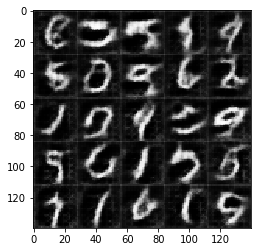

Epoch 1/2... Discriminator Loss: 0.9621... Generator Loss: 1.0871
Epoch 1/2... Discriminator Loss: 2.1254... Generator Loss: 0.2959
Epoch 1/2... Discriminator Loss: 2.0764... Generator Loss: 0.2833
Epoch 1/2... Discriminator Loss: 1.1738... Generator Loss: 3.2218
Epoch 1/2... Discriminator Loss: 1.0650... Generator Loss: 1.1969
Epoch 1/2... Discriminator Loss: 2.3662... Generator Loss: 0.3108
Epoch 1/2... Discriminator Loss: 0.9027... Generator Loss: 1.4762
Epoch 1/2... Discriminator Loss: 0.7120... Generator Loss: 1.4047
Epoch 1/2... Discriminator Loss: 1.3281... Generator Loss: 0.5965
Epoch 1/2... Discriminator Loss: 0.9581... Generator Loss: 1.6169
Epoch 1/2... Discriminator Loss: 1.4754... Generator Loss: 0.9072
Epoch 1/2... Discriminator Loss: 1.5156... Generator Loss: 0.4539
Epoch 1/2... Discriminator Loss: 1.1642... Generator Loss: 0.9034
Epoch 1/2... Discriminator Loss: 1.1958... Generator Loss: 0.9033
Epoch 1/2... Discriminator Loss: 1.3632... Generator Loss: 0.6229
Epoch 1/2.

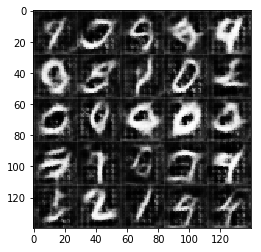

Epoch 1/2... Discriminator Loss: 1.3510... Generator Loss: 0.8025
Epoch 1/2... Discriminator Loss: 3.4740... Generator Loss: 0.0778
Epoch 1/2... Discriminator Loss: 0.8313... Generator Loss: 1.6572
Epoch 1/2... Discriminator Loss: 0.7335... Generator Loss: 2.6031
Epoch 1/2... Discriminator Loss: 3.7371... Generator Loss: 0.1101
Epoch 1/2... Discriminator Loss: 0.6701... Generator Loss: 1.8762
Epoch 1/2... Discriminator Loss: 0.7259... Generator Loss: 3.5764
Epoch 1/2... Discriminator Loss: 1.4316... Generator Loss: 0.8786
Epoch 1/2... Discriminator Loss: 1.6076... Generator Loss: 0.6077
Epoch 1/2... Discriminator Loss: 1.4685... Generator Loss: 0.4604
Epoch 1/2... Discriminator Loss: 1.3413... Generator Loss: 0.7539
Epoch 1/2... Discriminator Loss: 2.7033... Generator Loss: 0.1480
Epoch 1/2... Discriminator Loss: 1.0966... Generator Loss: 2.8757
Epoch 1/2... Discriminator Loss: 1.0227... Generator Loss: 0.9125
Epoch 1/2... Discriminator Loss: 0.7979... Generator Loss: 1.3813
Epoch 1/2.

Epoch 1/2... Discriminator Loss: 1.4451... Generator Loss: 0.5900
Epoch 1/2... Discriminator Loss: 1.3455... Generator Loss: 0.8628
Epoch 1/2... Discriminator Loss: 2.0505... Generator Loss: 0.3055
Epoch 1/2... Discriminator Loss: 1.1024... Generator Loss: 0.7136
Epoch 1/2... Discriminator Loss: 1.4000... Generator Loss: 0.5298
Epoch 1/2... Discriminator Loss: 1.0647... Generator Loss: 0.8703
Epoch 1/2... Discriminator Loss: 1.1113... Generator Loss: 0.8516
Epoch 1/2... Discriminator Loss: 1.5171... Generator Loss: 0.7283
Epoch 1/2... Discriminator Loss: 1.0768... Generator Loss: 0.8238
Epoch 1/2... Discriminator Loss: 1.3834... Generator Loss: 0.6197
Epoch 1/2... Discriminator Loss: 0.7332... Generator Loss: 1.7456
Epoch 1/2... Discriminator Loss: 0.6121... Generator Loss: 1.6988
Epoch 1/2... Discriminator Loss: 2.2401... Generator Loss: 0.2166
Epoch 1/2... Discriminator Loss: 1.7034... Generator Loss: 0.3506
Epoch 1/2... Discriminator Loss: 1.1764... Generator Loss: 0.8993
Epoch 1/2.

Epoch 1/2... Discriminator Loss: 0.7554... Generator Loss: 2.7551
Epoch 1/2... Discriminator Loss: 1.9547... Generator Loss: 0.3776
Epoch 1/2... Discriminator Loss: 1.0767... Generator Loss: 2.0351
Epoch 1/2... Discriminator Loss: 0.7828... Generator Loss: 2.1967
Epoch 1/2... Discriminator Loss: 0.7391... Generator Loss: 1.4451
Epoch 1/2... Discriminator Loss: 2.9632... Generator Loss: 0.1794
Epoch 1/2... Discriminator Loss: 1.5408... Generator Loss: 0.5039
Epoch 1/2... Discriminator Loss: 2.4072... Generator Loss: 4.9296
Epoch 1/2... Discriminator Loss: 1.2960... Generator Loss: 0.9904
Epoch 1/2... Discriminator Loss: 2.7906... Generator Loss: 0.2341
Epoch 1/2... Discriminator Loss: 1.9301... Generator Loss: 0.2921
Epoch 1/2... Discriminator Loss: 1.1818... Generator Loss: 1.2324
Epoch 1/2... Discriminator Loss: 0.5828... Generator Loss: 3.8211
Epoch 1/2... Discriminator Loss: 1.6258... Generator Loss: 0.5056
Epoch 1/2... Discriminator Loss: 2.9267... Generator Loss: 0.1419
Epoch 1/2.

Epoch 1/2... Discriminator Loss: 1.7044... Generator Loss: 0.3723
Epoch 1/2... Discriminator Loss: 0.8810... Generator Loss: 1.0844
Epoch 1/2... Discriminator Loss: 1.1363... Generator Loss: 0.7605
Epoch 1/2... Discriminator Loss: 0.8375... Generator Loss: 1.5813
Epoch 1/2... Discriminator Loss: 1.0200... Generator Loss: 0.8696
Epoch 1/2... Discriminator Loss: 1.2848... Generator Loss: 0.7269
Epoch 1/2... Discriminator Loss: 1.9045... Generator Loss: 0.3175
Epoch 1/2... Discriminator Loss: 1.0776... Generator Loss: 0.9551
Epoch 1/2... Discriminator Loss: 0.7974... Generator Loss: 1.2287
Epoch 1/2... Discriminator Loss: 1.0900... Generator Loss: 0.7875
Epoch 1/2... Discriminator Loss: 1.6493... Generator Loss: 0.5264
Epoch 1/2... Discriminator Loss: 1.4427... Generator Loss: 0.4820
Epoch 1/2... Discriminator Loss: 0.9012... Generator Loss: 1.1319
Epoch 1/2... Discriminator Loss: 0.8306... Generator Loss: 1.3206
Epoch 1/2... Discriminator Loss: 0.5842... Generator Loss: 1.7041
Epoch 1/2.

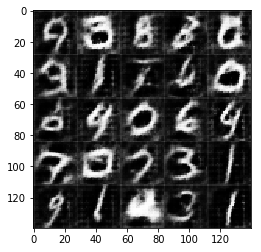

Epoch 1/2... Discriminator Loss: 1.0458... Generator Loss: 3.3500
Epoch 1/2... Discriminator Loss: 1.9065... Generator Loss: 0.6624
Epoch 1/2... Discriminator Loss: 2.0099... Generator Loss: 0.4094
Epoch 1/2... Discriminator Loss: 1.4775... Generator Loss: 1.9004
Epoch 1/2... Discriminator Loss: 1.2868... Generator Loss: 0.7582
Epoch 1/2... Discriminator Loss: 1.5465... Generator Loss: 0.6255
Epoch 1/2... Discriminator Loss: 1.2403... Generator Loss: 0.6558
Epoch 1/2... Discriminator Loss: 3.1077... Generator Loss: 0.1055
Epoch 1/2... Discriminator Loss: 1.9765... Generator Loss: 0.3190
Epoch 1/2... Discriminator Loss: 1.6158... Generator Loss: 2.9366
Epoch 1/2... Discriminator Loss: 0.8299... Generator Loss: 1.2728
Epoch 1/2... Discriminator Loss: 1.4550... Generator Loss: 0.4365
Epoch 1/2... Discriminator Loss: 1.1556... Generator Loss: 0.7703
Epoch 1/2... Discriminator Loss: 0.9843... Generator Loss: 0.9656
Epoch 1/2... Discriminator Loss: 1.1137... Generator Loss: 0.8070
Epoch 1/2.

Epoch 1/2... Discriminator Loss: 0.6401... Generator Loss: 2.4552
Epoch 1/2... Discriminator Loss: 0.9885... Generator Loss: 1.2254
Epoch 1/2... Discriminator Loss: 3.1381... Generator Loss: 0.1062
Epoch 1/2... Discriminator Loss: 0.7657... Generator Loss: 1.9838
Epoch 1/2... Discriminator Loss: 1.1963... Generator Loss: 2.9036
Epoch 1/2... Discriminator Loss: 1.7830... Generator Loss: 0.8852
Epoch 1/2... Discriminator Loss: 3.2166... Generator Loss: 0.0926
Epoch 1/2... Discriminator Loss: 0.6553... Generator Loss: 2.0971
Epoch 1/2... Discriminator Loss: 1.0024... Generator Loss: 2.7184
Epoch 1/2... Discriminator Loss: 2.5861... Generator Loss: 0.2167
Epoch 1/2... Discriminator Loss: 1.3654... Generator Loss: 0.6166
Epoch 1/2... Discriminator Loss: 1.3052... Generator Loss: 1.9387
Epoch 1/2... Discriminator Loss: 0.4637... Generator Loss: 2.7478
Epoch 1/2... Discriminator Loss: 1.1417... Generator Loss: 1.1457
Epoch 1/2... Discriminator Loss: 1.0208... Generator Loss: 0.9678
Epoch 1/2.

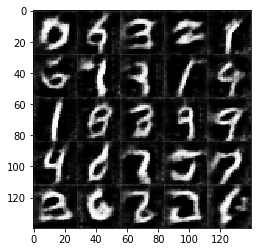

Epoch 1/2... Discriminator Loss: 0.6008... Generator Loss: 1.9326
Epoch 1/2... Discriminator Loss: 1.6427... Generator Loss: 0.5653
Epoch 1/2... Discriminator Loss: 0.8490... Generator Loss: 1.1618
Epoch 1/2... Discriminator Loss: 1.0152... Generator Loss: 0.9448
Epoch 1/2... Discriminator Loss: 0.6438... Generator Loss: 1.7667
Epoch 1/2... Discriminator Loss: 1.0530... Generator Loss: 0.8376
Epoch 1/2... Discriminator Loss: 2.0907... Generator Loss: 0.3065
Epoch 1/2... Discriminator Loss: 0.9724... Generator Loss: 1.1014
Epoch 1/2... Discriminator Loss: 0.8814... Generator Loss: 1.5683
Epoch 1/2... Discriminator Loss: 2.9064... Generator Loss: 0.1263
Epoch 1/2... Discriminator Loss: 1.3070... Generator Loss: 0.5588
Epoch 1/2... Discriminator Loss: 2.9764... Generator Loss: 4.4105
Epoch 1/2... Discriminator Loss: 1.6705... Generator Loss: 0.8134
Epoch 1/2... Discriminator Loss: 1.2448... Generator Loss: 0.7381
Epoch 1/2... Discriminator Loss: 1.1179... Generator Loss: 0.8889
Epoch 1/2.

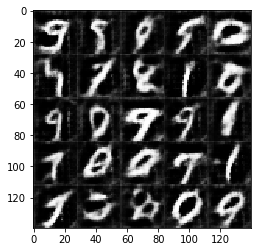

Epoch 1/2... Discriminator Loss: 0.9391... Generator Loss: 1.7621
Epoch 1/2... Discriminator Loss: 2.9311... Generator Loss: 0.1752
Epoch 1/2... Discriminator Loss: 1.2866... Generator Loss: 0.7445
Epoch 1/2... Discriminator Loss: 0.8549... Generator Loss: 3.5403
Epoch 1/2... Discriminator Loss: 0.7602... Generator Loss: 1.7765
Epoch 1/2... Discriminator Loss: 1.2336... Generator Loss: 0.6818
Epoch 1/2... Discriminator Loss: 2.7898... Generator Loss: 0.1355
Epoch 1/2... Discriminator Loss: 0.4744... Generator Loss: 2.6415
Epoch 1/2... Discriminator Loss: 0.8667... Generator Loss: 1.1155
Epoch 1/2... Discriminator Loss: 0.6124... Generator Loss: 1.8348
Epoch 1/2... Discriminator Loss: 0.4696... Generator Loss: 2.2916
Epoch 1/2... Discriminator Loss: 0.8777... Generator Loss: 1.0579
Epoch 1/2... Discriminator Loss: 1.8759... Generator Loss: 0.3192
Epoch 1/2... Discriminator Loss: 1.0085... Generator Loss: 0.8889
Epoch 1/2... Discriminator Loss: 0.7426... Generator Loss: 1.7448
Epoch 1/2.

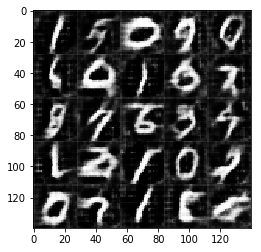

Epoch 1/2... Discriminator Loss: 2.4700... Generator Loss: 0.2012
Epoch 1/2... Discriminator Loss: 0.8654... Generator Loss: 2.0197
Epoch 1/2... Discriminator Loss: 0.6477... Generator Loss: 1.8671
Epoch 1/2... Discriminator Loss: 1.3380... Generator Loss: 0.6396
Epoch 1/2... Discriminator Loss: 2.5390... Generator Loss: 0.1674
Epoch 1/2... Discriminator Loss: 1.2258... Generator Loss: 0.6455
Epoch 1/2... Discriminator Loss: 0.7998... Generator Loss: 1.6543
Epoch 1/2... Discriminator Loss: 2.0754... Generator Loss: 0.2449
Epoch 1/2... Discriminator Loss: 0.9963... Generator Loss: 0.9579
Epoch 1/2... Discriminator Loss: 0.9870... Generator Loss: 1.8400
Epoch 1/2... Discriminator Loss: 0.6114... Generator Loss: 2.0657
Epoch 1/2... Discriminator Loss: 1.3344... Generator Loss: 0.7128
Epoch 1/2... Discriminator Loss: 1.5468... Generator Loss: 0.7832
Epoch 1/2... Discriminator Loss: 1.2843... Generator Loss: 0.6860
Epoch 1/2... Discriminator Loss: 1.1446... Generator Loss: 0.7728
Epoch 1/2.

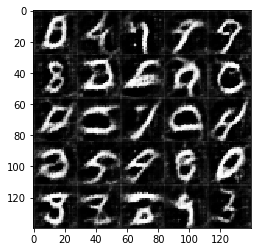

Epoch 1/2... Discriminator Loss: 1.0408... Generator Loss: 0.8214
Epoch 1/2... Discriminator Loss: 1.2202... Generator Loss: 1.1419
Epoch 1/2... Discriminator Loss: 0.6843... Generator Loss: 1.8817
Epoch 1/2... Discriminator Loss: 2.0150... Generator Loss: 0.3171
Epoch 1/2... Discriminator Loss: 1.0932... Generator Loss: 1.1727
Epoch 1/2... Discriminator Loss: 0.6591... Generator Loss: 1.4809
Epoch 1/2... Discriminator Loss: 2.4893... Generator Loss: 0.2554
Epoch 1/2... Discriminator Loss: 1.8125... Generator Loss: 0.5000
Epoch 1/2... Discriminator Loss: 1.3756... Generator Loss: 2.1569
Epoch 1/2... Discriminator Loss: 0.6662... Generator Loss: 1.8398
Epoch 1/2... Discriminator Loss: 1.7347... Generator Loss: 0.4043
Epoch 1/2... Discriminator Loss: 1.2439... Generator Loss: 0.7710
Epoch 1/2... Discriminator Loss: 1.4204... Generator Loss: 0.7304
Epoch 1/2... Discriminator Loss: 1.1851... Generator Loss: 0.8136
Epoch 1/2... Discriminator Loss: 3.7244... Generator Loss: 0.0680
Epoch 1/2.

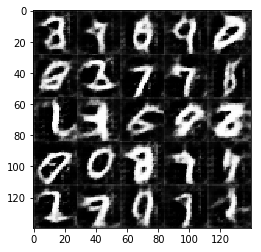

Epoch 1/2... Discriminator Loss: 1.6670... Generator Loss: 0.4232
Epoch 1/2... Discriminator Loss: 0.9592... Generator Loss: 1.7501
Epoch 1/2... Discriminator Loss: 0.5541... Generator Loss: 1.9594
Epoch 1/2... Discriminator Loss: 1.9723... Generator Loss: 0.3480
Epoch 1/2... Discriminator Loss: 1.7186... Generator Loss: 0.3854
Epoch 1/2... Discriminator Loss: 0.7380... Generator Loss: 1.4759
Epoch 1/2... Discriminator Loss: 0.9551... Generator Loss: 1.0514
Epoch 1/2... Discriminator Loss: 0.7464... Generator Loss: 1.3784
Epoch 1/2... Discriminator Loss: 1.3222... Generator Loss: 1.0968
Epoch 1/2... Discriminator Loss: 0.9756... Generator Loss: 1.2938
Epoch 1/2... Discriminator Loss: 0.5274... Generator Loss: 2.2639
Epoch 1/2... Discriminator Loss: 0.4189... Generator Loss: 3.1733
Epoch 1/2... Discriminator Loss: 1.1726... Generator Loss: 0.8328
Epoch 1/2... Discriminator Loss: 1.4678... Generator Loss: 0.5389
Epoch 1/2... Discriminator Loss: 0.6760... Generator Loss: 1.5858
Epoch 1/2.

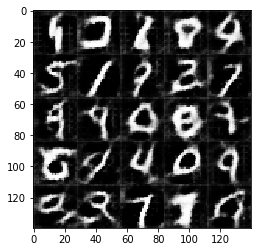

Epoch 1/2... Discriminator Loss: 1.2580... Generator Loss: 0.6256
Epoch 1/2... Discriminator Loss: 2.7060... Generator Loss: 0.1489
Epoch 1/2... Discriminator Loss: 1.1127... Generator Loss: 0.7733
Epoch 1/2... Discriminator Loss: 0.7181... Generator Loss: 1.5113
Epoch 1/2... Discriminator Loss: 0.6122... Generator Loss: 1.6263
Epoch 1/2... Discriminator Loss: 0.6888... Generator Loss: 1.6607
Epoch 1/2... Discriminator Loss: 1.0572... Generator Loss: 0.9926
Epoch 1/2... Discriminator Loss: 0.8898... Generator Loss: 1.2746
Epoch 1/2... Discriminator Loss: 1.2871... Generator Loss: 0.6491
Epoch 1/2... Discriminator Loss: 0.7917... Generator Loss: 1.2262
Epoch 1/2... Discriminator Loss: 1.8037... Generator Loss: 0.5451
Epoch 1/2... Discriminator Loss: 0.5876... Generator Loss: 1.7916
Epoch 1/2... Discriminator Loss: 0.4610... Generator Loss: 2.7093
Epoch 1/2... Discriminator Loss: 0.4393... Generator Loss: 3.3059
Epoch 1/2... Discriminator Loss: 0.6034... Generator Loss: 1.8086
Epoch 1/2.

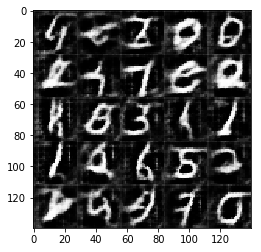

Epoch 1/2... Discriminator Loss: 0.9723... Generator Loss: 0.9573
Epoch 1/2... Discriminator Loss: 0.7296... Generator Loss: 1.5642
Epoch 1/2... Discriminator Loss: 0.5704... Generator Loss: 2.3804
Epoch 1/2... Discriminator Loss: 1.6517... Generator Loss: 0.5560
Epoch 1/2... Discriminator Loss: 2.5748... Generator Loss: 0.1737
Epoch 1/2... Discriminator Loss: 1.1870... Generator Loss: 0.7198
Epoch 1/2... Discriminator Loss: 0.5569... Generator Loss: 2.0374
Epoch 1/2... Discriminator Loss: 2.7588... Generator Loss: 0.1607
Epoch 1/2... Discriminator Loss: 1.0529... Generator Loss: 0.9002
Epoch 1/2... Discriminator Loss: 4.6384... Generator Loss: 5.8595
Epoch 1/2... Discriminator Loss: 2.1936... Generator Loss: 0.4582
Epoch 1/2... Discriminator Loss: 1.7289... Generator Loss: 0.4274
Epoch 1/2... Discriminator Loss: 1.0299... Generator Loss: 2.9558
Epoch 1/2... Discriminator Loss: 1.5080... Generator Loss: 0.5213
Epoch 1/2... Discriminator Loss: 1.7114... Generator Loss: 0.4381
Epoch 1/2.

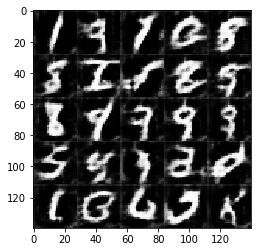

Epoch 1/2... Discriminator Loss: 0.8900... Generator Loss: 1.0063
Epoch 1/2... Discriminator Loss: 0.4752... Generator Loss: 2.5699
Epoch 1/2... Discriminator Loss: 0.7087... Generator Loss: 1.5595
Epoch 1/2... Discriminator Loss: 1.6970... Generator Loss: 0.5139
Epoch 1/2... Discriminator Loss: 0.9817... Generator Loss: 1.0012
Epoch 1/2... Discriminator Loss: 0.6297... Generator Loss: 2.0824
Epoch 1/2... Discriminator Loss: 0.5887... Generator Loss: 2.4590
Epoch 1/2... Discriminator Loss: 1.3825... Generator Loss: 0.7430
Epoch 1/2... Discriminator Loss: 1.0986... Generator Loss: 1.0479
Epoch 1/2... Discriminator Loss: 0.7434... Generator Loss: 1.7822
Epoch 1/2... Discriminator Loss: 1.1338... Generator Loss: 0.8962
Epoch 1/2... Discriminator Loss: 0.6274... Generator Loss: 1.6199
Epoch 1/2... Discriminator Loss: 0.8044... Generator Loss: 1.4972
Epoch 1/2... Discriminator Loss: 1.9824... Generator Loss: 0.3549
Epoch 1/2... Discriminator Loss: 1.0797... Generator Loss: 0.8586
Epoch 1/2.

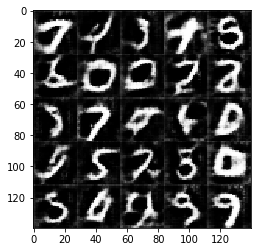

Epoch 1/2... Discriminator Loss: 0.8152... Generator Loss: 1.7002
Epoch 1/2... Discriminator Loss: 0.8830... Generator Loss: 1.8485
Epoch 1/2... Discriminator Loss: 1.0664... Generator Loss: 1.0052
Epoch 1/2... Discriminator Loss: 1.4021... Generator Loss: 0.4833
Epoch 1/2... Discriminator Loss: 0.9417... Generator Loss: 1.0466
Epoch 1/2... Discriminator Loss: 3.2393... Generator Loss: 0.1631
Epoch 1/2... Discriminator Loss: 0.7515... Generator Loss: 1.5298
Epoch 1/2... Discriminator Loss: 0.5795... Generator Loss: 3.2171
Epoch 1/2... Discriminator Loss: 0.6617... Generator Loss: 1.8867
Epoch 1/2... Discriminator Loss: 1.7391... Generator Loss: 0.6159
Epoch 1/2... Discriminator Loss: 1.7586... Generator Loss: 0.3862
Epoch 1/2... Discriminator Loss: 0.8699... Generator Loss: 1.4136
Epoch 1/2... Discriminator Loss: 0.8169... Generator Loss: 1.4892
Epoch 1/2... Discriminator Loss: 0.8976... Generator Loss: 1.0830
Epoch 1/2... Discriminator Loss: 1.0934... Generator Loss: 0.9712
Epoch 1/2.

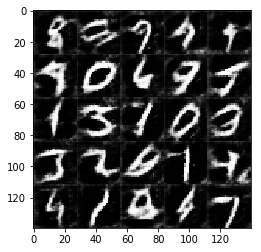

Epoch 1/2... Discriminator Loss: 0.9501... Generator Loss: 1.0590
Epoch 1/2... Discriminator Loss: 1.0644... Generator Loss: 0.8014
Epoch 1/2... Discriminator Loss: 1.3364... Generator Loss: 0.8336
Epoch 1/2... Discriminator Loss: 0.9772... Generator Loss: 1.2015
Epoch 1/2... Discriminator Loss: 0.8126... Generator Loss: 1.8117
Epoch 1/2... Discriminator Loss: 0.4651... Generator Loss: 3.1336
Epoch 1/2... Discriminator Loss: 1.8020... Generator Loss: 0.4234
Epoch 1/2... Discriminator Loss: 0.7318... Generator Loss: 2.7137
Epoch 1/2... Discriminator Loss: 0.4758... Generator Loss: 3.2371
Epoch 1/2... Discriminator Loss: 2.4153... Generator Loss: 0.3330
Epoch 1/2... Discriminator Loss: 1.1724... Generator Loss: 1.4254
Epoch 1/2... Discriminator Loss: 1.1805... Generator Loss: 4.5805
Epoch 1/2... Discriminator Loss: 0.4150... Generator Loss: 3.9744
Epoch 1/2... Discriminator Loss: 3.1349... Generator Loss: 0.1845
Epoch 1/2... Discriminator Loss: 1.0088... Generator Loss: 1.1003
Epoch 1/2.

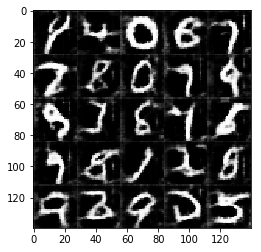

Epoch 1/2... Discriminator Loss: 0.8162... Generator Loss: 1.5452
Epoch 1/2... Discriminator Loss: 0.6853... Generator Loss: 1.4961
Epoch 1/2... Discriminator Loss: 0.9380... Generator Loss: 1.4119
Epoch 1/2... Discriminator Loss: 1.0956... Generator Loss: 0.9046
Epoch 1/2... Discriminator Loss: 0.7460... Generator Loss: 1.3712
Epoch 1/2... Discriminator Loss: 0.5576... Generator Loss: 2.2995
Epoch 1/2... Discriminator Loss: 1.0426... Generator Loss: 1.0075
Epoch 1/2... Discriminator Loss: 0.9360... Generator Loss: 1.3988
Epoch 1/2... Discriminator Loss: 0.6532... Generator Loss: 1.8654
Epoch 1/2... Discriminator Loss: 0.6231... Generator Loss: 1.7544
Epoch 1/2... Discriminator Loss: 1.3990... Generator Loss: 0.5321
Epoch 1/2... Discriminator Loss: 0.9528... Generator Loss: 1.1431
Epoch 1/2... Discriminator Loss: 0.8310... Generator Loss: 2.7336
Epoch 1/2... Discriminator Loss: 1.5901... Generator Loss: 0.4530
Epoch 1/2... Discriminator Loss: 1.7314... Generator Loss: 0.4383
Epoch 1/2.

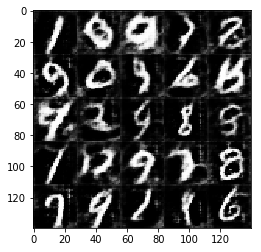

Epoch 1/2... Discriminator Loss: 1.6972... Generator Loss: 0.3664
Epoch 1/2... Discriminator Loss: 0.6267... Generator Loss: 2.0594
Epoch 1/2... Discriminator Loss: 1.2416... Generator Loss: 0.7458
Epoch 1/2... Discriminator Loss: 2.3646... Generator Loss: 0.2568
Epoch 1/2... Discriminator Loss: 1.1329... Generator Loss: 0.9294
Epoch 1/2... Discriminator Loss: 0.9915... Generator Loss: 0.9940
Epoch 1/2... Discriminator Loss: 0.6830... Generator Loss: 2.0871
Epoch 1/2... Discriminator Loss: 0.8266... Generator Loss: 1.6521
Epoch 1/2... Discriminator Loss: 1.6930... Generator Loss: 0.4851
Epoch 1/2... Discriminator Loss: 1.5491... Generator Loss: 0.7199
Epoch 1/2... Discriminator Loss: 0.9031... Generator Loss: 1.0444
Epoch 1/2... Discriminator Loss: 1.0943... Generator Loss: 0.8468
Epoch 1/2... Discriminator Loss: 0.7020... Generator Loss: 1.3561
Epoch 1/2... Discriminator Loss: 1.7368... Generator Loss: 0.3859
Epoch 1/2... Discriminator Loss: 0.5654... Generator Loss: 2.3249
Epoch 1/2.

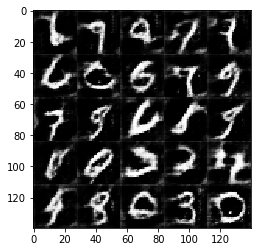

Epoch 1/2... Discriminator Loss: 2.0152... Generator Loss: 3.2565
Epoch 1/2... Discriminator Loss: 1.2462... Generator Loss: 1.3329
Epoch 1/2... Discriminator Loss: 3.6895... Generator Loss: 0.0861
Epoch 1/2... Discriminator Loss: 1.5582... Generator Loss: 0.4578
Epoch 1/2... Discriminator Loss: 1.2928... Generator Loss: 2.5566
Epoch 1/2... Discriminator Loss: 0.8412... Generator Loss: 1.1846
Epoch 1/2... Discriminator Loss: 0.7419... Generator Loss: 1.7397
Epoch 1/2... Discriminator Loss: 2.2607... Generator Loss: 0.2769
Epoch 1/2... Discriminator Loss: 1.6754... Generator Loss: 0.5340
Epoch 1/2... Discriminator Loss: 1.5829... Generator Loss: 3.3138
Epoch 1/2... Discriminator Loss: 0.6474... Generator Loss: 2.3464
Epoch 1/2... Discriminator Loss: 0.6912... Generator Loss: 2.1352
Epoch 1/2... Discriminator Loss: 0.6410... Generator Loss: 1.7925
Epoch 1/2... Discriminator Loss: 0.6718... Generator Loss: 1.8196
Epoch 1/2... Discriminator Loss: 0.7280... Generator Loss: 1.4234
Epoch 1/2.

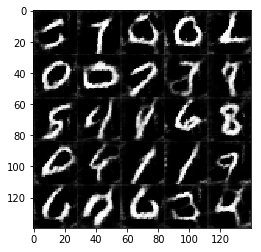

Epoch 1/2... Discriminator Loss: 2.8910... Generator Loss: 0.1938
Epoch 1/2... Discriminator Loss: 1.0721... Generator Loss: 4.2418
Epoch 1/2... Discriminator Loss: 0.6805... Generator Loss: 2.3283
Epoch 1/2... Discriminator Loss: 0.7993... Generator Loss: 2.2974
Epoch 1/2... Discriminator Loss: 3.1159... Generator Loss: 0.3603
Epoch 1/2... Discriminator Loss: 0.7672... Generator Loss: 2.0677
Epoch 1/2... Discriminator Loss: 0.7892... Generator Loss: 3.6344
Epoch 1/2... Discriminator Loss: 0.5694... Generator Loss: 2.7148
Epoch 1/2... Discriminator Loss: 1.6137... Generator Loss: 0.4971
Epoch 1/2... Discriminator Loss: 0.7130... Generator Loss: 1.9705
Epoch 1/2... Discriminator Loss: 1.8616... Generator Loss: 0.4408
Epoch 1/2... Discriminator Loss: 0.6831... Generator Loss: 1.6919
Epoch 1/2... Discriminator Loss: 1.0029... Generator Loss: 0.9738
Epoch 1/2... Discriminator Loss: 0.5874... Generator Loss: 2.1133
Epoch 1/2... Discriminator Loss: 1.2222... Generator Loss: 0.8285
Epoch 1/2.

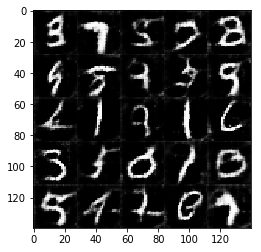

Epoch 1/2... Discriminator Loss: 1.6166... Generator Loss: 0.5478
Epoch 1/2... Discriminator Loss: 2.7326... Generator Loss: 0.1769
Epoch 1/2... Discriminator Loss: 0.6026... Generator Loss: 2.5588
Epoch 1/2... Discriminator Loss: 1.4266... Generator Loss: 3.3870
Epoch 1/2... Discriminator Loss: 2.3250... Generator Loss: 0.4130
Epoch 1/2... Discriminator Loss: 1.0249... Generator Loss: 1.0172
Epoch 1/2... Discriminator Loss: 1.6451... Generator Loss: 0.6218
Epoch 1/2... Discriminator Loss: 1.2102... Generator Loss: 1.8743
Epoch 1/2... Discriminator Loss: 0.8605... Generator Loss: 1.8750
Epoch 1/2... Discriminator Loss: 2.6018... Generator Loss: 0.2217
Epoch 1/2... Discriminator Loss: 1.0447... Generator Loss: 0.9374
Epoch 1/2... Discriminator Loss: 1.7010... Generator Loss: 4.0494
Epoch 1/2... Discriminator Loss: 1.2982... Generator Loss: 0.8493
Epoch 1/2... Discriminator Loss: 1.2463... Generator Loss: 0.9142
Epoch 1/2... Discriminator Loss: 0.7944... Generator Loss: 1.8911
Epoch 1/2.

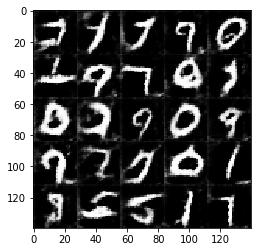

Epoch 1/2... Discriminator Loss: 1.0134... Generator Loss: 0.9145
Epoch 1/2... Discriminator Loss: 0.5706... Generator Loss: 2.2949
Epoch 1/2... Discriminator Loss: 1.3537... Generator Loss: 0.7308
Epoch 1/2... Discriminator Loss: 1.3048... Generator Loss: 0.6780
Epoch 1/2... Discriminator Loss: 0.8920... Generator Loss: 1.1549
Epoch 1/2... Discriminator Loss: 1.1846... Generator Loss: 0.7716
Epoch 1/2... Discriminator Loss: 0.9378... Generator Loss: 1.0218
Epoch 1/2... Discriminator Loss: 0.6095... Generator Loss: 1.7074
Epoch 1/2... Discriminator Loss: 1.0675... Generator Loss: 0.8785
Epoch 1/2... Discriminator Loss: 0.5792... Generator Loss: 1.9103
Epoch 1/2... Discriminator Loss: 0.8396... Generator Loss: 1.2792
Epoch 1/2... Discriminator Loss: 1.1617... Generator Loss: 0.8032
Epoch 1/2... Discriminator Loss: 1.0983... Generator Loss: 0.7197
Epoch 1/2... Discriminator Loss: 0.7158... Generator Loss: 1.5612
Epoch 1/2... Discriminator Loss: 1.3889... Generator Loss: 0.8770
Epoch 1/2.

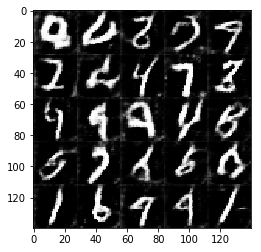

Epoch 1/2... Discriminator Loss: 1.4114... Generator Loss: 3.5258
Epoch 1/2... Discriminator Loss: 1.2725... Generator Loss: 0.9877
Epoch 1/2... Discriminator Loss: 1.2259... Generator Loss: 0.8948
Epoch 1/2... Discriminator Loss: 1.2937... Generator Loss: 4.2848
Epoch 1/2... Discriminator Loss: 0.6952... Generator Loss: 2.6495
Epoch 1/2... Discriminator Loss: 1.4164... Generator Loss: 0.6791
Epoch 1/2... Discriminator Loss: 0.6205... Generator Loss: 1.6199
Epoch 1/2... Discriminator Loss: 0.6802... Generator Loss: 2.0595
Epoch 1/2... Discriminator Loss: 1.2763... Generator Loss: 0.7934
Epoch 1/2... Discriminator Loss: 1.5606... Generator Loss: 0.4381
Epoch 1/2... Discriminator Loss: 1.6285... Generator Loss: 0.7036
Epoch 1/2... Discriminator Loss: 1.4279... Generator Loss: 0.4821
Epoch 1/2... Discriminator Loss: 1.1185... Generator Loss: 0.8249
Epoch 1/2... Discriminator Loss: 0.9621... Generator Loss: 1.2121
Epoch 1/2... Discriminator Loss: 1.1570... Generator Loss: 1.0219
Epoch 1/2.

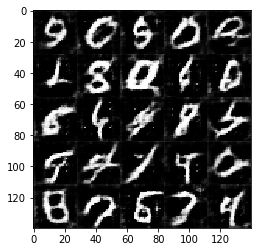

Epoch 1/2... Discriminator Loss: 0.8997... Generator Loss: 1.4518
Epoch 1/2... Discriminator Loss: 1.2151... Generator Loss: 0.9745
Epoch 1/2... Discriminator Loss: 1.5718... Generator Loss: 0.5375
Epoch 1/2... Discriminator Loss: 0.6659... Generator Loss: 1.7767
Epoch 1/2... Discriminator Loss: 0.5026... Generator Loss: 2.6124
Epoch 1/2... Discriminator Loss: 0.5985... Generator Loss: 2.1166
Epoch 1/2... Discriminator Loss: 1.3537... Generator Loss: 1.1462
Epoch 1/2... Discriminator Loss: 0.7987... Generator Loss: 1.4208
Epoch 1/2... Discriminator Loss: 0.9025... Generator Loss: 1.9631
Epoch 1/2... Discriminator Loss: 2.4934... Generator Loss: 0.2184
Epoch 1/2... Discriminator Loss: 0.8828... Generator Loss: 1.3936
Epoch 1/2... Discriminator Loss: 1.4031... Generator Loss: 1.6355
Epoch 1/2... Discriminator Loss: 0.9109... Generator Loss: 1.4067
Epoch 1/2... Discriminator Loss: 2.9587... Generator Loss: 0.1105
Epoch 1/2... Discriminator Loss: 0.8769... Generator Loss: 1.4116
Epoch 1/2.

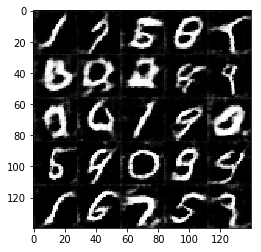

Epoch 1/2... Discriminator Loss: 1.9249... Generator Loss: 3.9898
Epoch 1/2... Discriminator Loss: 0.9358... Generator Loss: 1.4983
Epoch 1/2... Discriminator Loss: 1.8772... Generator Loss: 0.4033
Epoch 1/2... Discriminator Loss: 1.7600... Generator Loss: 0.5287
Epoch 1/2... Discriminator Loss: 0.9407... Generator Loss: 1.2422
Epoch 1/2... Discriminator Loss: 0.5382... Generator Loss: 3.3212
Epoch 1/2... Discriminator Loss: 0.5687... Generator Loss: 1.9887
Epoch 1/2... Discriminator Loss: 1.0645... Generator Loss: 0.9051
Epoch 1/2... Discriminator Loss: 2.1074... Generator Loss: 0.3739
Epoch 1/2... Discriminator Loss: 0.5997... Generator Loss: 1.9469
Epoch 1/2... Discriminator Loss: 0.5605... Generator Loss: 2.6712
Epoch 1/2... Discriminator Loss: 0.5961... Generator Loss: 1.7008
Epoch 1/2... Discriminator Loss: 1.1508... Generator Loss: 1.0677
Epoch 1/2... Discriminator Loss: 1.2771... Generator Loss: 0.8801
Epoch 1/2... Discriminator Loss: 0.4870... Generator Loss: 2.3651
Epoch 1/2.

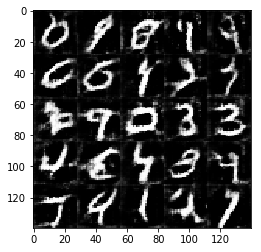

Epoch 1/2... Discriminator Loss: 1.1738... Generator Loss: 0.8082
Epoch 1/2... Discriminator Loss: 0.9805... Generator Loss: 1.0897
Epoch 1/2... Discriminator Loss: 0.9037... Generator Loss: 1.0246
Epoch 1/2... Discriminator Loss: 0.9909... Generator Loss: 0.9468
Epoch 1/2... Discriminator Loss: 0.9427... Generator Loss: 1.0453
Epoch 1/2... Discriminator Loss: 1.1502... Generator Loss: 0.7040
Epoch 1/2... Discriminator Loss: 2.1925... Generator Loss: 0.2554
Epoch 1/2... Discriminator Loss: 1.1332... Generator Loss: 1.5351
Epoch 1/2... Discriminator Loss: 0.6373... Generator Loss: 2.1712
Epoch 1/2... Discriminator Loss: 1.7208... Generator Loss: 0.4373
Epoch 1/2... Discriminator Loss: 0.8184... Generator Loss: 1.2817
Epoch 1/2... Discriminator Loss: 0.6926... Generator Loss: 1.8143
Epoch 1/2... Discriminator Loss: 0.5952... Generator Loss: 2.7080
Epoch 1/2... Discriminator Loss: 1.4824... Generator Loss: 0.5949
Epoch 1/2... Discriminator Loss: 1.1014... Generator Loss: 0.9989
Epoch 1/2.

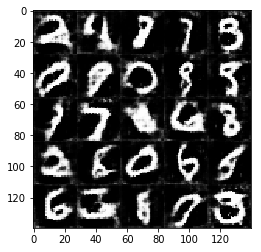

Epoch 2/2... Discriminator Loss: 1.7888... Generator Loss: 0.5329
Epoch 2/2... Discriminator Loss: 1.2752... Generator Loss: 0.7478
Epoch 2/2... Discriminator Loss: 0.4704... Generator Loss: 2.6530
Epoch 2/2... Discriminator Loss: 0.4078... Generator Loss: 3.0960
Epoch 2/2... Discriminator Loss: 1.7391... Generator Loss: 0.4096
Epoch 2/2... Discriminator Loss: 0.6831... Generator Loss: 1.8828
Epoch 2/2... Discriminator Loss: 0.9351... Generator Loss: 1.1670
Epoch 2/2... Discriminator Loss: 0.5289... Generator Loss: 2.2460
Epoch 2/2... Discriminator Loss: 1.2573... Generator Loss: 0.9309
Epoch 2/2... Discriminator Loss: 2.9642... Generator Loss: 0.1071
Epoch 2/2... Discriminator Loss: 0.3935... Generator Loss: 3.3681
Epoch 2/2... Discriminator Loss: 0.7857... Generator Loss: 1.8937
Epoch 2/2... Discriminator Loss: 0.7095... Generator Loss: 2.1992
Epoch 2/2... Discriminator Loss: 1.0050... Generator Loss: 1.0629
Epoch 2/2... Discriminator Loss: 2.9943... Generator Loss: 0.1208
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.5497... Generator Loss: 2.3569
Epoch 2/2... Discriminator Loss: 0.4147... Generator Loss: 2.8300
Epoch 2/2... Discriminator Loss: 1.3510... Generator Loss: 0.7613
Epoch 2/2... Discriminator Loss: 1.6879... Generator Loss: 0.4764
Epoch 2/2... Discriminator Loss: 0.6199... Generator Loss: 2.1227
Epoch 2/2... Discriminator Loss: 0.4560... Generator Loss: 3.4383
Epoch 2/2... Discriminator Loss: 0.6101... Generator Loss: 2.3328
Epoch 2/2... Discriminator Loss: 0.5254... Generator Loss: 2.5735
Epoch 2/2... Discriminator Loss: 0.7045... Generator Loss: 1.6084
Epoch 2/2... Discriminator Loss: 0.5511... Generator Loss: 2.1857
Epoch 2/2... Discriminator Loss: 0.5600... Generator Loss: 2.1120
Epoch 2/2... Discriminator Loss: 1.0022... Generator Loss: 0.8552
Epoch 2/2... Discriminator Loss: 0.8865... Generator Loss: 1.1913
Epoch 2/2... Discriminator Loss: 1.2767... Generator Loss: 0.7451
Epoch 2/2... Discriminator Loss: 1.2332... Generator Loss: 0.7913
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 1.1816... Generator Loss: 3.4281
Epoch 2/2... Discriminator Loss: 0.8518... Generator Loss: 1.5390
Epoch 2/2... Discriminator Loss: 3.4176... Generator Loss: 0.3237
Epoch 2/2... Discriminator Loss: 0.9248... Generator Loss: 1.3930
Epoch 2/2... Discriminator Loss: 0.7911... Generator Loss: 2.3326
Epoch 2/2... Discriminator Loss: 0.6289... Generator Loss: 3.3514
Epoch 2/2... Discriminator Loss: 1.6828... Generator Loss: 0.6962
Epoch 2/2... Discriminator Loss: 1.3129... Generator Loss: 0.6548
Epoch 2/2... Discriminator Loss: 0.8200... Generator Loss: 1.3710
Epoch 2/2... Discriminator Loss: 0.7945... Generator Loss: 1.4357
Epoch 2/2... Discriminator Loss: 0.9133... Generator Loss: 1.3360
Epoch 2/2... Discriminator Loss: 0.6987... Generator Loss: 1.7508
Epoch 2/2... Discriminator Loss: 1.1485... Generator Loss: 1.7048
Epoch 2/2... Discriminator Loss: 1.2217... Generator Loss: 1.0839
Epoch 2/2... Discriminator Loss: 1.3362... Generator Loss: 0.9374
Epoch 2/2.

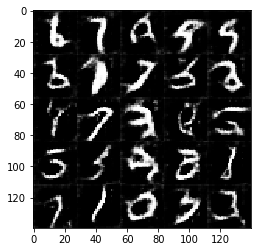

Epoch 2/2... Discriminator Loss: 1.2533... Generator Loss: 0.6147
Epoch 2/2... Discriminator Loss: 0.8020... Generator Loss: 1.1731
Epoch 2/2... Discriminator Loss: 1.4804... Generator Loss: 0.4649
Epoch 2/2... Discriminator Loss: 2.0257... Generator Loss: 0.2878
Epoch 2/2... Discriminator Loss: 0.6205... Generator Loss: 1.6784
Epoch 2/2... Discriminator Loss: 0.9305... Generator Loss: 1.1618
Epoch 2/2... Discriminator Loss: 0.5692... Generator Loss: 2.0545
Epoch 2/2... Discriminator Loss: 0.6877... Generator Loss: 1.5671
Epoch 2/2... Discriminator Loss: 0.8033... Generator Loss: 1.3436
Epoch 2/2... Discriminator Loss: 1.5883... Generator Loss: 0.5320
Epoch 2/2... Discriminator Loss: 0.9006... Generator Loss: 1.1415
Epoch 2/2... Discriminator Loss: 0.8084... Generator Loss: 1.3506
Epoch 2/2... Discriminator Loss: 0.8253... Generator Loss: 1.2671
Epoch 2/2... Discriminator Loss: 2.2118... Generator Loss: 0.2681
Epoch 2/2... Discriminator Loss: 1.2142... Generator Loss: 5.3549
Epoch 2/2.

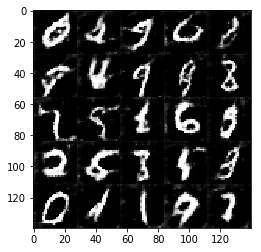

Epoch 2/2... Discriminator Loss: 0.7267... Generator Loss: 1.7910
Epoch 2/2... Discriminator Loss: 2.6924... Generator Loss: 0.1675
Epoch 2/2... Discriminator Loss: 1.6084... Generator Loss: 0.4537
Epoch 2/2... Discriminator Loss: 1.0431... Generator Loss: 0.8957
Epoch 2/2... Discriminator Loss: 0.6073... Generator Loss: 2.2579
Epoch 2/2... Discriminator Loss: 0.4654... Generator Loss: 2.3713
Epoch 2/2... Discriminator Loss: 1.8508... Generator Loss: 0.4951
Epoch 2/2... Discriminator Loss: 1.2902... Generator Loss: 0.6712
Epoch 2/2... Discriminator Loss: 0.7351... Generator Loss: 2.0545
Epoch 2/2... Discriminator Loss: 0.7727... Generator Loss: 2.3087
Epoch 2/2... Discriminator Loss: 1.8212... Generator Loss: 0.4665
Epoch 2/2... Discriminator Loss: 2.1475... Generator Loss: 0.3541
Epoch 2/2... Discriminator Loss: 0.5563... Generator Loss: 1.7779
Epoch 2/2... Discriminator Loss: 2.4774... Generator Loss: 0.2314
Epoch 2/2... Discriminator Loss: 0.6275... Generator Loss: 4.9360
Epoch 2/2.

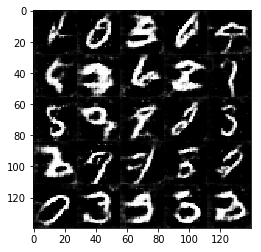

Epoch 2/2... Discriminator Loss: 0.7325... Generator Loss: 1.6654
Epoch 2/2... Discriminator Loss: 0.7150... Generator Loss: 2.6228
Epoch 2/2... Discriminator Loss: 0.8726... Generator Loss: 1.7278
Epoch 2/2... Discriminator Loss: 2.3445... Generator Loss: 0.2261
Epoch 2/2... Discriminator Loss: 2.9320... Generator Loss: 0.1994
Epoch 2/2... Discriminator Loss: 1.0900... Generator Loss: 1.0437
Epoch 2/2... Discriminator Loss: 0.6316... Generator Loss: 3.2046
Epoch 2/2... Discriminator Loss: 0.4117... Generator Loss: 3.5690
Epoch 2/2... Discriminator Loss: 0.6714... Generator Loss: 1.6794
Epoch 2/2... Discriminator Loss: 0.8207... Generator Loss: 1.2295
Epoch 2/2... Discriminator Loss: 0.9900... Generator Loss: 1.0961
Epoch 2/2... Discriminator Loss: 1.4389... Generator Loss: 0.5407
Epoch 2/2... Discriminator Loss: 0.9312... Generator Loss: 1.5200
Epoch 2/2... Discriminator Loss: 1.0487... Generator Loss: 0.9493
Epoch 2/2... Discriminator Loss: 0.5157... Generator Loss: 2.2003
Epoch 2/2.

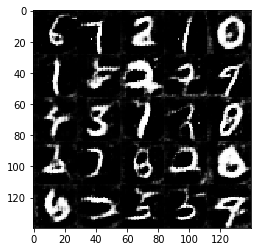

Epoch 2/2... Discriminator Loss: 0.5784... Generator Loss: 4.1433
Epoch 2/2... Discriminator Loss: 1.8063... Generator Loss: 0.4550
Epoch 2/2... Discriminator Loss: 1.3617... Generator Loss: 0.5955
Epoch 2/2... Discriminator Loss: 0.7063... Generator Loss: 2.1401
Epoch 2/2... Discriminator Loss: 0.7915... Generator Loss: 1.5963
Epoch 2/2... Discriminator Loss: 0.9834... Generator Loss: 1.0247
Epoch 2/2... Discriminator Loss: 2.5781... Generator Loss: 0.1843
Epoch 2/2... Discriminator Loss: 1.0996... Generator Loss: 3.4790
Epoch 2/2... Discriminator Loss: 0.4910... Generator Loss: 3.4340
Epoch 2/2... Discriminator Loss: 1.4199... Generator Loss: 0.9597
Epoch 2/2... Discriminator Loss: 1.6649... Generator Loss: 0.4261
Epoch 2/2... Discriminator Loss: 1.4643... Generator Loss: 4.3994
Epoch 2/2... Discriminator Loss: 0.5095... Generator Loss: 3.6665
Epoch 2/2... Discriminator Loss: 1.7235... Generator Loss: 0.6084
Epoch 2/2... Discriminator Loss: 1.1606... Generator Loss: 0.7003
Epoch 2/2.

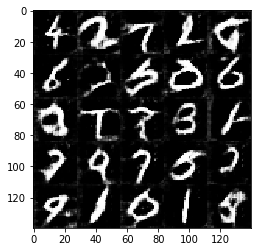

Epoch 2/2... Discriminator Loss: 1.2713... Generator Loss: 0.6957
Epoch 2/2... Discriminator Loss: 0.8090... Generator Loss: 1.6858
Epoch 2/2... Discriminator Loss: 0.6321... Generator Loss: 1.8873
Epoch 2/2... Discriminator Loss: 0.8554... Generator Loss: 1.4132
Epoch 2/2... Discriminator Loss: 0.9683... Generator Loss: 1.1874
Epoch 2/2... Discriminator Loss: 2.4354... Generator Loss: 0.1881
Epoch 2/2... Discriminator Loss: 1.1203... Generator Loss: 0.8216
Epoch 2/2... Discriminator Loss: 0.9296... Generator Loss: 1.1725
Epoch 2/2... Discriminator Loss: 0.6082... Generator Loss: 1.8131
Epoch 2/2... Discriminator Loss: 1.7253... Generator Loss: 0.4705
Epoch 2/2... Discriminator Loss: 1.0131... Generator Loss: 0.9458
Epoch 2/2... Discriminator Loss: 0.4253... Generator Loss: 3.9608
Epoch 2/2... Discriminator Loss: 0.8401... Generator Loss: 1.4794
Epoch 2/2... Discriminator Loss: 2.1642... Generator Loss: 0.3314
Epoch 2/2... Discriminator Loss: 0.7087... Generator Loss: 2.7517
Epoch 2/2.

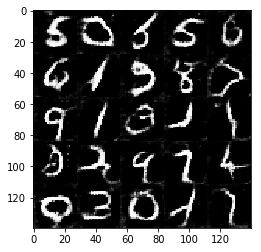

Epoch 2/2... Discriminator Loss: 0.9313... Generator Loss: 0.9383
Epoch 2/2... Discriminator Loss: 0.7987... Generator Loss: 1.2882
Epoch 2/2... Discriminator Loss: 0.4811... Generator Loss: 3.0342
Epoch 2/2... Discriminator Loss: 0.5424... Generator Loss: 2.3518
Epoch 2/2... Discriminator Loss: 0.8568... Generator Loss: 1.2605
Epoch 2/2... Discriminator Loss: 0.7272... Generator Loss: 1.6293
Epoch 2/2... Discriminator Loss: 0.6882... Generator Loss: 1.4741
Epoch 2/2... Discriminator Loss: 0.9650... Generator Loss: 0.9377
Epoch 2/2... Discriminator Loss: 0.7803... Generator Loss: 1.3252
Epoch 2/2... Discriminator Loss: 0.7634... Generator Loss: 1.4022
Epoch 2/2... Discriminator Loss: 0.8735... Generator Loss: 1.4426
Epoch 2/2... Discriminator Loss: 1.4714... Generator Loss: 0.5429
Epoch 2/2... Discriminator Loss: 0.9928... Generator Loss: 1.1150
Epoch 2/2... Discriminator Loss: 0.6319... Generator Loss: 3.2415
Epoch 2/2... Discriminator Loss: 0.6088... Generator Loss: 1.9573
Epoch 2/2.

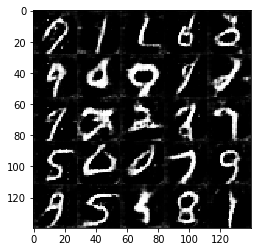

Epoch 2/2... Discriminator Loss: 1.4945... Generator Loss: 0.5027
Epoch 2/2... Discriminator Loss: 0.7850... Generator Loss: 1.4692
Epoch 2/2... Discriminator Loss: 0.6359... Generator Loss: 2.1213
Epoch 2/2... Discriminator Loss: 1.8268... Generator Loss: 0.3847
Epoch 2/2... Discriminator Loss: 1.0847... Generator Loss: 1.1134
Epoch 2/2... Discriminator Loss: 0.8119... Generator Loss: 1.4072
Epoch 2/2... Discriminator Loss: 0.4867... Generator Loss: 2.3592
Epoch 2/2... Discriminator Loss: 1.4072... Generator Loss: 0.8329
Epoch 2/2... Discriminator Loss: 1.6722... Generator Loss: 0.4233
Epoch 2/2... Discriminator Loss: 0.7147... Generator Loss: 1.5698
Epoch 2/2... Discriminator Loss: 0.7576... Generator Loss: 1.8251
Epoch 2/2... Discriminator Loss: 1.0486... Generator Loss: 0.8355
Epoch 2/2... Discriminator Loss: 0.6879... Generator Loss: 1.4456
Epoch 2/2... Discriminator Loss: 0.8013... Generator Loss: 1.4044
Epoch 2/2... Discriminator Loss: 0.9793... Generator Loss: 0.9456
Epoch 2/2.

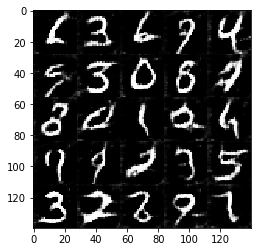

Epoch 2/2... Discriminator Loss: 0.8501... Generator Loss: 1.1486
Epoch 2/2... Discriminator Loss: 0.7370... Generator Loss: 1.6239
Epoch 2/2... Discriminator Loss: 1.0817... Generator Loss: 0.9302
Epoch 2/2... Discriminator Loss: 0.8652... Generator Loss: 1.2559
Epoch 2/2... Discriminator Loss: 1.0775... Generator Loss: 1.0859
Epoch 2/2... Discriminator Loss: 0.5967... Generator Loss: 2.0885
Epoch 2/2... Discriminator Loss: 1.4042... Generator Loss: 0.7366
Epoch 2/2... Discriminator Loss: 0.9449... Generator Loss: 1.2037
Epoch 2/2... Discriminator Loss: 0.8792... Generator Loss: 1.1866
Epoch 2/2... Discriminator Loss: 0.7412... Generator Loss: 1.7974
Epoch 2/2... Discriminator Loss: 0.6386... Generator Loss: 1.7201
Epoch 2/2... Discriminator Loss: 1.0326... Generator Loss: 0.8984
Epoch 2/2... Discriminator Loss: 1.0064... Generator Loss: 1.9624
Epoch 2/2... Discriminator Loss: 1.2213... Generator Loss: 0.9895
Epoch 2/2... Discriminator Loss: 1.6789... Generator Loss: 0.4999
Epoch 2/2.

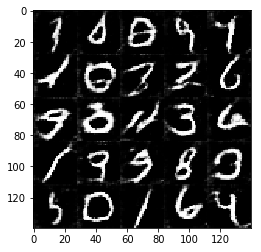

Epoch 2/2... Discriminator Loss: 0.8029... Generator Loss: 1.0889
Epoch 2/2... Discriminator Loss: 1.1729... Generator Loss: 0.6984
Epoch 2/2... Discriminator Loss: 0.6274... Generator Loss: 1.6567
Epoch 2/2... Discriminator Loss: 0.8138... Generator Loss: 1.3007
Epoch 2/2... Discriminator Loss: 0.6772... Generator Loss: 1.5221
Epoch 2/2... Discriminator Loss: 0.6334... Generator Loss: 2.1756
Epoch 2/2... Discriminator Loss: 0.4728... Generator Loss: 2.6506
Epoch 2/2... Discriminator Loss: 0.8921... Generator Loss: 1.2662
Epoch 2/2... Discriminator Loss: 1.0713... Generator Loss: 1.4894
Epoch 2/2... Discriminator Loss: 0.7527... Generator Loss: 2.0203
Epoch 2/2... Discriminator Loss: 0.8348... Generator Loss: 1.4096
Epoch 2/2... Discriminator Loss: 0.6852... Generator Loss: 1.6197
Epoch 2/2... Discriminator Loss: 0.8388... Generator Loss: 1.5453
Epoch 2/2... Discriminator Loss: 1.3064... Generator Loss: 0.5800
Epoch 2/2... Discriminator Loss: 0.6002... Generator Loss: 1.9477
Epoch 2/2.

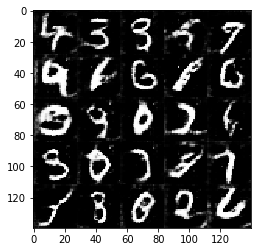

Epoch 2/2... Discriminator Loss: 0.5026... Generator Loss: 2.0719
Epoch 2/2... Discriminator Loss: 0.5195... Generator Loss: 2.3884
Epoch 2/2... Discriminator Loss: 0.6681... Generator Loss: 1.6720
Epoch 2/2... Discriminator Loss: 0.5325... Generator Loss: 1.9518
Epoch 2/2... Discriminator Loss: 1.2829... Generator Loss: 0.5755
Epoch 2/2... Discriminator Loss: 0.9953... Generator Loss: 0.9299
Epoch 2/2... Discriminator Loss: 0.7844... Generator Loss: 1.2218
Epoch 2/2... Discriminator Loss: 0.6036... Generator Loss: 1.6050
Epoch 2/2... Discriminator Loss: 3.2928... Generator Loss: 0.0828
Epoch 2/2... Discriminator Loss: 1.7628... Generator Loss: 0.3308
Epoch 2/2... Discriminator Loss: 1.7311... Generator Loss: 0.3898
Epoch 2/2... Discriminator Loss: 0.6043... Generator Loss: 4.4868
Epoch 2/2... Discriminator Loss: 0.4532... Generator Loss: 3.7186
Epoch 2/2... Discriminator Loss: 0.9506... Generator Loss: 1.2281
Epoch 2/2... Discriminator Loss: 1.8213... Generator Loss: 0.5790
Epoch 2/2.

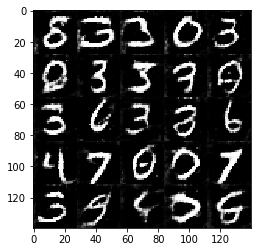

Epoch 2/2... Discriminator Loss: 0.7642... Generator Loss: 1.5709
Epoch 2/2... Discriminator Loss: 0.7516... Generator Loss: 2.0128
Epoch 2/2... Discriminator Loss: 0.5189... Generator Loss: 3.0859
Epoch 2/2... Discriminator Loss: 2.1998... Generator Loss: 0.2579
Epoch 2/2... Discriminator Loss: 1.1094... Generator Loss: 0.7063
Epoch 2/2... Discriminator Loss: 1.0752... Generator Loss: 4.5461
Epoch 2/2... Discriminator Loss: 0.5128... Generator Loss: 2.3014
Epoch 2/2... Discriminator Loss: 2.7945... Generator Loss: 0.2476
Epoch 2/2... Discriminator Loss: 1.8182... Generator Loss: 0.5430
Epoch 2/2... Discriminator Loss: 0.5823... Generator Loss: 2.5051
Epoch 2/2... Discriminator Loss: 0.6783... Generator Loss: 2.0980
Epoch 2/2... Discriminator Loss: 2.0942... Generator Loss: 0.3137
Epoch 2/2... Discriminator Loss: 0.8539... Generator Loss: 1.1339
Epoch 2/2... Discriminator Loss: 0.6359... Generator Loss: 2.1869
Epoch 2/2... Discriminator Loss: 1.0884... Generator Loss: 1.2198
Epoch 2/2.

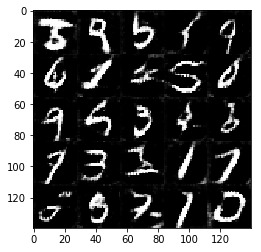

Epoch 2/2... Discriminator Loss: 1.2854... Generator Loss: 0.5838
Epoch 2/2... Discriminator Loss: 0.8040... Generator Loss: 1.4220
Epoch 2/2... Discriminator Loss: 0.5653... Generator Loss: 2.3654
Epoch 2/2... Discriminator Loss: 0.9721... Generator Loss: 1.0747
Epoch 2/2... Discriminator Loss: 1.0846... Generator Loss: 1.0746
Epoch 2/2... Discriminator Loss: 0.8104... Generator Loss: 1.5063
Epoch 2/2... Discriminator Loss: 0.7391... Generator Loss: 1.4293
Epoch 2/2... Discriminator Loss: 0.7158... Generator Loss: 1.5478
Epoch 2/2... Discriminator Loss: 1.1300... Generator Loss: 0.7658
Epoch 2/2... Discriminator Loss: 0.8158... Generator Loss: 1.9422
Epoch 2/2... Discriminator Loss: 1.3827... Generator Loss: 0.6824
Epoch 2/2... Discriminator Loss: 0.9183... Generator Loss: 1.2096
Epoch 2/2... Discriminator Loss: 0.9673... Generator Loss: 4.9760
Epoch 2/2... Discriminator Loss: 0.5210... Generator Loss: 2.6799
Epoch 2/2... Discriminator Loss: 2.7452... Generator Loss: 0.2143
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 3.1450... Generator Loss: 0.1472
Epoch 2/2... Discriminator Loss: 0.7208... Generator Loss: 2.5120
Epoch 2/2... Discriminator Loss: 1.1988... Generator Loss: 0.7433
Epoch 2/2... Discriminator Loss: 1.0717... Generator Loss: 1.0471
Epoch 2/2... Discriminator Loss: 0.7734... Generator Loss: 1.4287
Epoch 2/2... Discriminator Loss: 0.9970... Generator Loss: 1.8124
Epoch 2/2... Discriminator Loss: 2.3343... Generator Loss: 0.4775
Epoch 2/2... Discriminator Loss: 0.6239... Generator Loss: 2.1059
Epoch 2/2... Discriminator Loss: 0.8643... Generator Loss: 1.3668
Epoch 2/2... Discriminator Loss: 1.0961... Generator Loss: 1.0847
Epoch 2/2... Discriminator Loss: 0.6530... Generator Loss: 2.4672
Epoch 2/2... Discriminator Loss: 1.6179... Generator Loss: 0.6065
Epoch 2/2... Discriminator Loss: 2.0752... Generator Loss: 0.2958
Epoch 2/2... Discriminator Loss: 1.0336... Generator Loss: 1.2571
Epoch 2/2... Discriminator Loss: 0.6051... Generator Loss: 2.0324
Epoch 2/2.

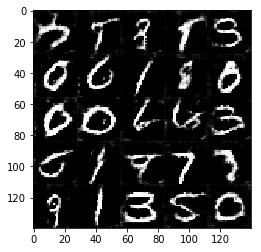

Epoch 2/2... Discriminator Loss: 1.6182... Generator Loss: 0.3754
Epoch 2/2... Discriminator Loss: 1.9250... Generator Loss: 0.3134
Epoch 2/2... Discriminator Loss: 0.8486... Generator Loss: 1.3902
Epoch 2/2... Discriminator Loss: 0.5305... Generator Loss: 2.9238
Epoch 2/2... Discriminator Loss: 1.2779... Generator Loss: 0.7583
Epoch 2/2... Discriminator Loss: 0.5195... Generator Loss: 2.1495
Epoch 2/2... Discriminator Loss: 0.6826... Generator Loss: 1.9235
Epoch 2/2... Discriminator Loss: 1.6593... Generator Loss: 0.4684
Epoch 2/2... Discriminator Loss: 0.8481... Generator Loss: 1.3660
Epoch 2/2... Discriminator Loss: 1.0478... Generator Loss: 0.9684
Epoch 2/2... Discriminator Loss: 1.3440... Generator Loss: 0.7975
Epoch 2/2... Discriminator Loss: 0.4803... Generator Loss: 2.8792
Epoch 2/2... Discriminator Loss: 0.5419... Generator Loss: 2.0735
Epoch 2/2... Discriminator Loss: 0.7748... Generator Loss: 1.3390
Epoch 2/2... Discriminator Loss: 0.7914... Generator Loss: 1.2893
Epoch 2/2.

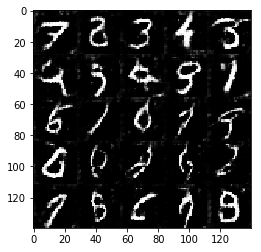

Epoch 2/2... Discriminator Loss: 0.7498... Generator Loss: 1.5314
Epoch 2/2... Discriminator Loss: 0.3782... Generator Loss: 3.6715
Epoch 2/2... Discriminator Loss: 1.3767... Generator Loss: 0.5764
Epoch 2/2... Discriminator Loss: 0.7686... Generator Loss: 1.1787
Epoch 2/2... Discriminator Loss: 1.0064... Generator Loss: 1.2452
Epoch 2/2... Discriminator Loss: 0.6441... Generator Loss: 1.8204
Epoch 2/2... Discriminator Loss: 1.2257... Generator Loss: 0.7027
Epoch 2/2... Discriminator Loss: 0.9336... Generator Loss: 1.0757
Epoch 2/2... Discriminator Loss: 0.7520... Generator Loss: 2.0807
Epoch 2/2... Discriminator Loss: 0.4860... Generator Loss: 2.5722
Epoch 2/2... Discriminator Loss: 0.6641... Generator Loss: 1.5178
Epoch 2/2... Discriminator Loss: 1.9289... Generator Loss: 0.2912
Epoch 2/2... Discriminator Loss: 1.3158... Generator Loss: 0.5990
Epoch 2/2... Discriminator Loss: 2.4530... Generator Loss: 0.2427
Epoch 2/2... Discriminator Loss: 0.8392... Generator Loss: 1.1320
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.5636... Generator Loss: 2.3186
Epoch 2/2... Discriminator Loss: 0.7853... Generator Loss: 1.2619
Epoch 2/2... Discriminator Loss: 0.8336... Generator Loss: 1.1078
Epoch 2/2... Discriminator Loss: 0.4942... Generator Loss: 2.2705
Epoch 2/2... Discriminator Loss: 0.5860... Generator Loss: 2.0002
Epoch 2/2... Discriminator Loss: 1.9754... Generator Loss: 0.3290
Epoch 2/2... Discriminator Loss: 0.6019... Generator Loss: 1.6463
Epoch 2/2... Discriminator Loss: 0.4728... Generator Loss: 2.7470
Epoch 2/2... Discriminator Loss: 0.8625... Generator Loss: 1.2962
Epoch 2/2... Discriminator Loss: 1.6670... Generator Loss: 0.4201
Epoch 2/2... Discriminator Loss: 0.8138... Generator Loss: 1.2681
Epoch 2/2... Discriminator Loss: 0.4350... Generator Loss: 2.8181
Epoch 2/2... Discriminator Loss: 0.4253... Generator Loss: 3.7263
Epoch 2/2... Discriminator Loss: 0.6506... Generator Loss: 2.1083
Epoch 2/2... Discriminator Loss: 1.1322... Generator Loss: 0.7596
Epoch 2/2.

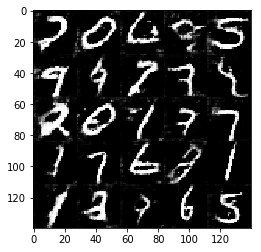

Epoch 2/2... Discriminator Loss: 0.7031... Generator Loss: 1.5741
Epoch 2/2... Discriminator Loss: 0.4947... Generator Loss: 3.2117
Epoch 2/2... Discriminator Loss: 0.5492... Generator Loss: 2.4370
Epoch 2/2... Discriminator Loss: 1.6285... Generator Loss: 0.8834
Epoch 2/2... Discriminator Loss: 1.3706... Generator Loss: 0.6756
Epoch 2/2... Discriminator Loss: 0.7923... Generator Loss: 1.3608
Epoch 2/2... Discriminator Loss: 1.1096... Generator Loss: 1.1363
Epoch 2/2... Discriminator Loss: 1.9870... Generator Loss: 0.2676
Epoch 2/2... Discriminator Loss: 1.1851... Generator Loss: 0.7982
Epoch 2/2... Discriminator Loss: 1.3558... Generator Loss: 0.6178
Epoch 2/2... Discriminator Loss: 0.8174... Generator Loss: 1.7847
Epoch 2/2... Discriminator Loss: 0.8132... Generator Loss: 1.7163
Epoch 2/2... Discriminator Loss: 0.6366... Generator Loss: 1.8826
Epoch 2/2... Discriminator Loss: 0.5480... Generator Loss: 2.1228
Epoch 2/2... Discriminator Loss: 2.2336... Generator Loss: 0.2805
Epoch 2/2.

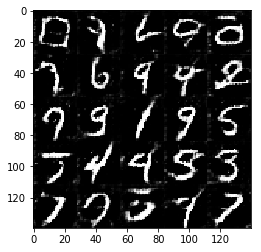

Epoch 2/2... Discriminator Loss: 2.4069... Generator Loss: 0.1741
Epoch 2/2... Discriminator Loss: 1.4512... Generator Loss: 0.5838
Epoch 2/2... Discriminator Loss: 0.5630... Generator Loss: 2.2165
Epoch 2/2... Discriminator Loss: 0.9042... Generator Loss: 1.5348
Epoch 2/2... Discriminator Loss: 0.7708... Generator Loss: 1.4821
Epoch 2/2... Discriminator Loss: 1.0778... Generator Loss: 1.2780
Epoch 2/2... Discriminator Loss: 1.3231... Generator Loss: 0.6901
Epoch 2/2... Discriminator Loss: 0.8641... Generator Loss: 1.7996
Epoch 2/2... Discriminator Loss: 0.7707... Generator Loss: 1.9013
Epoch 2/2... Discriminator Loss: 1.3556... Generator Loss: 0.6766
Epoch 2/2... Discriminator Loss: 1.4057... Generator Loss: 0.6426
Epoch 2/2... Discriminator Loss: 0.8423... Generator Loss: 1.0965
Epoch 2/2... Discriminator Loss: 0.5537... Generator Loss: 1.9284
Epoch 2/2... Discriminator Loss: 1.1474... Generator Loss: 0.8653
Epoch 2/2... Discriminator Loss: 0.8218... Generator Loss: 1.3011
Epoch 2/2.

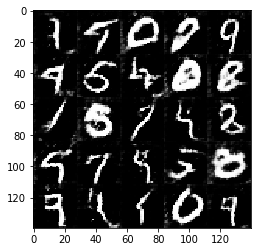

Epoch 2/2... Discriminator Loss: 0.7100... Generator Loss: 1.5770
Epoch 2/2... Discriminator Loss: 0.6673... Generator Loss: 2.7212
Epoch 2/2... Discriminator Loss: 0.5827... Generator Loss: 2.4263
Epoch 2/2... Discriminator Loss: 0.7658... Generator Loss: 1.7953
Epoch 2/2... Discriminator Loss: 1.0457... Generator Loss: 0.9780
Epoch 2/2... Discriminator Loss: 0.8507... Generator Loss: 1.7359
Epoch 2/2... Discriminator Loss: 1.0257... Generator Loss: 1.0742
Epoch 2/2... Discriminator Loss: 0.5566... Generator Loss: 2.2129
Epoch 2/2... Discriminator Loss: 1.2126... Generator Loss: 4.1598
Epoch 2/2... Discriminator Loss: 1.1396... Generator Loss: 1.3528
Epoch 2/2... Discriminator Loss: 1.0844... Generator Loss: 1.3987
Epoch 2/2... Discriminator Loss: 0.7498... Generator Loss: 1.5693
Epoch 2/2... Discriminator Loss: 0.5642... Generator Loss: 2.3197
Epoch 2/2... Discriminator Loss: 0.6279... Generator Loss: 1.8200
Epoch 2/2... Discriminator Loss: 1.7109... Generator Loss: 0.3934
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 1.4233... Generator Loss: 0.7180
Epoch 2/2... Discriminator Loss: 0.8446... Generator Loss: 1.2284
Epoch 2/2... Discriminator Loss: 0.9217... Generator Loss: 1.4118
Epoch 2/2... Discriminator Loss: 0.7395... Generator Loss: 1.3535
Epoch 2/2... Discriminator Loss: 1.6027... Generator Loss: 0.4279
Epoch 2/2... Discriminator Loss: 1.2743... Generator Loss: 0.8508
Epoch 2/2... Discriminator Loss: 0.4203... Generator Loss: 2.9975
Epoch 2/2... Discriminator Loss: 1.7455... Generator Loss: 0.4083
Epoch 2/2... Discriminator Loss: 1.0027... Generator Loss: 0.9385
Epoch 2/2... Discriminator Loss: 1.3994... Generator Loss: 0.5293
Epoch 2/2... Discriminator Loss: 0.9817... Generator Loss: 1.2342
Epoch 2/2... Discriminator Loss: 1.4921... Generator Loss: 0.6979
Epoch 2/2... Discriminator Loss: 0.7900... Generator Loss: 1.4660
Epoch 2/2... Discriminator Loss: 0.6197... Generator Loss: 2.3853
Epoch 2/2... Discriminator Loss: 0.9108... Generator Loss: 1.1906
Epoch 2/2.

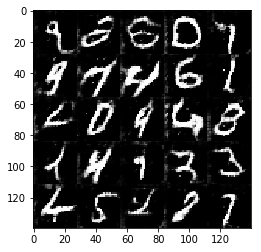

Epoch 2/2... Discriminator Loss: 1.7094... Generator Loss: 0.6781
Epoch 2/2... Discriminator Loss: 1.9913... Generator Loss: 0.4971
Epoch 2/2... Discriminator Loss: 1.1330... Generator Loss: 0.8044
Epoch 2/2... Discriminator Loss: 0.7149... Generator Loss: 1.6904
Epoch 2/2... Discriminator Loss: 1.8045... Generator Loss: 0.3168
Epoch 2/2... Discriminator Loss: 1.3771... Generator Loss: 0.7966
Epoch 2/2... Discriminator Loss: 0.5225... Generator Loss: 2.0823
Epoch 2/2... Discriminator Loss: 0.8302... Generator Loss: 1.2932
Epoch 2/2... Discriminator Loss: 2.6255... Generator Loss: 0.2467
Epoch 2/2... Discriminator Loss: 2.4054... Generator Loss: 0.2857
Epoch 2/2... Discriminator Loss: 0.6758... Generator Loss: 1.7542
Epoch 2/2... Discriminator Loss: 0.7900... Generator Loss: 1.3302
Epoch 2/2... Discriminator Loss: 1.0267... Generator Loss: 0.9198
Epoch 2/2... Discriminator Loss: 1.0693... Generator Loss: 1.1900
Epoch 2/2... Discriminator Loss: 1.4186... Generator Loss: 0.6741
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.8907... Generator Loss: 1.4556
Epoch 2/2... Discriminator Loss: 1.3062... Generator Loss: 1.1091
Epoch 2/2... Discriminator Loss: 0.8371... Generator Loss: 1.1694
Epoch 2/2... Discriminator Loss: 0.7685... Generator Loss: 1.9295
Epoch 2/2... Discriminator Loss: 0.8028... Generator Loss: 1.5142
Epoch 2/2... Discriminator Loss: 1.2940... Generator Loss: 0.6222
Epoch 2/2... Discriminator Loss: 1.1046... Generator Loss: 0.8663
Epoch 2/2... Discriminator Loss: 0.8886... Generator Loss: 1.1061
Epoch 2/2... Discriminator Loss: 0.8240... Generator Loss: 1.3335
Epoch 2/2... Discriminator Loss: 0.7474... Generator Loss: 1.4955
Epoch 2/2... Discriminator Loss: 0.6910... Generator Loss: 1.6452
Epoch 2/2... Discriminator Loss: 0.5949... Generator Loss: 1.9697
Epoch 2/2... Discriminator Loss: 1.2387... Generator Loss: 0.9587
Epoch 2/2... Discriminator Loss: 0.9059... Generator Loss: 1.1351
Epoch 2/2... Discriminator Loss: 1.0281... Generator Loss: 0.8396
Epoch 2/2.

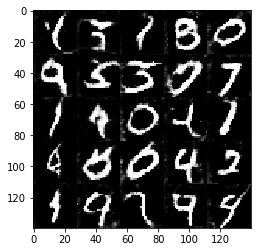

Epoch 2/2... Discriminator Loss: 2.0388... Generator Loss: 0.3653
Epoch 2/2... Discriminator Loss: 1.2744... Generator Loss: 0.9341
Epoch 2/2... Discriminator Loss: 0.8401... Generator Loss: 1.4242
Epoch 2/2... Discriminator Loss: 0.6156... Generator Loss: 1.9618
Epoch 2/2... Discriminator Loss: 0.7569... Generator Loss: 1.2362
Epoch 2/2... Discriminator Loss: 0.5646... Generator Loss: 2.1081
Epoch 2/2... Discriminator Loss: 1.7050... Generator Loss: 0.7466
Epoch 2/2... Discriminator Loss: 0.9693... Generator Loss: 1.3071
Epoch 2/2... Discriminator Loss: 1.2766... Generator Loss: 3.0858
Epoch 2/2... Discriminator Loss: 0.5309... Generator Loss: 2.3182
Epoch 2/2... Discriminator Loss: 0.9380... Generator Loss: 1.0715
Epoch 2/2... Discriminator Loss: 1.8981... Generator Loss: 0.3859
Epoch 2/2... Discriminator Loss: 0.8105... Generator Loss: 1.6870
Epoch 2/2... Discriminator Loss: 0.7155... Generator Loss: 1.8375
Epoch 2/2... Discriminator Loss: 0.8046... Generator Loss: 1.2719
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 2.3810... Generator Loss: 0.2815
Epoch 2/2... Discriminator Loss: 1.0222... Generator Loss: 0.8374
Epoch 2/2... Discriminator Loss: 1.5728... Generator Loss: 3.5290
Epoch 2/2... Discriminator Loss: 2.1458... Generator Loss: 0.3504
Epoch 2/2... Discriminator Loss: 0.7307... Generator Loss: 1.4927
Epoch 2/2... Discriminator Loss: 0.7370... Generator Loss: 1.6193
Epoch 2/2... Discriminator Loss: 0.6163... Generator Loss: 1.6873
Epoch 2/2... Discriminator Loss: 0.8946... Generator Loss: 1.1244
Epoch 2/2... Discriminator Loss: 1.0184... Generator Loss: 0.8447
Epoch 2/2... Discriminator Loss: 1.5021... Generator Loss: 0.4366
Epoch 2/2... Discriminator Loss: 1.2179... Generator Loss: 0.6388
Epoch 2/2... Discriminator Loss: 1.2094... Generator Loss: 3.7109
Epoch 2/2... Discriminator Loss: 0.9518... Generator Loss: 1.0694
Epoch 2/2... Discriminator Loss: 1.4438... Generator Loss: 0.6199
Epoch 2/2... Discriminator Loss: 1.0896... Generator Loss: 0.9317
Epoch 2/2.

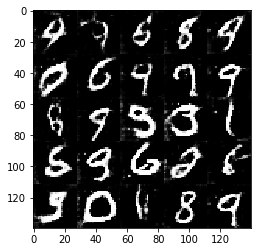

Epoch 2/2... Discriminator Loss: 1.8741... Generator Loss: 0.4354
Epoch 2/2... Discriminator Loss: 1.2328... Generator Loss: 0.7496
Epoch 2/2... Discriminator Loss: 0.7235... Generator Loss: 1.4506
Epoch 2/2... Discriminator Loss: 1.3696... Generator Loss: 0.5626
Epoch 2/2... Discriminator Loss: 0.6882... Generator Loss: 1.5673
Epoch 2/2... Discriminator Loss: 0.7199... Generator Loss: 1.3434
Epoch 2/2... Discriminator Loss: 0.6021... Generator Loss: 2.4367
Epoch 2/2... Discriminator Loss: 0.6006... Generator Loss: 2.0793
Epoch 2/2... Discriminator Loss: 0.4888... Generator Loss: 2.7146
Epoch 2/2... Discriminator Loss: 0.9783... Generator Loss: 0.8667
Epoch 2/2... Discriminator Loss: 0.8768... Generator Loss: 1.1121
Epoch 2/2... Discriminator Loss: 1.5854... Generator Loss: 0.4936
Epoch 2/2... Discriminator Loss: 0.7041... Generator Loss: 1.5279
Epoch 2/2... Discriminator Loss: 0.7414... Generator Loss: 1.4664
Epoch 2/2... Discriminator Loss: 0.5949... Generator Loss: 2.0097
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 1.5096... Generator Loss: 0.6666
Epoch 2/2... Discriminator Loss: 1.5224... Generator Loss: 0.5963
Epoch 2/2... Discriminator Loss: 0.6661... Generator Loss: 2.0248
Epoch 2/2... Discriminator Loss: 0.4888... Generator Loss: 3.0481
Epoch 2/2... Discriminator Loss: 0.5080... Generator Loss: 2.8287
Epoch 2/2... Discriminator Loss: 1.0189... Generator Loss: 1.3458
Epoch 2/2... Discriminator Loss: 1.1561... Generator Loss: 1.3016
Epoch 2/2... Discriminator Loss: 0.8108... Generator Loss: 1.3429
Epoch 2/2... Discriminator Loss: 0.5724... Generator Loss: 2.3557
Epoch 2/2... Discriminator Loss: 0.5637... Generator Loss: 2.1184
Epoch 2/2... Discriminator Loss: 1.8712... Generator Loss: 0.3233
Epoch 2/2... Discriminator Loss: 2.4116... Generator Loss: 0.1986
Epoch 2/2... Discriminator Loss: 0.5187... Generator Loss: 2.7233
Epoch 2/2... Discriminator Loss: 1.2307... Generator Loss: 2.5704
Epoch 2/2... Discriminator Loss: 0.3862... Generator Loss: 4.2321
Epoch 2/2.

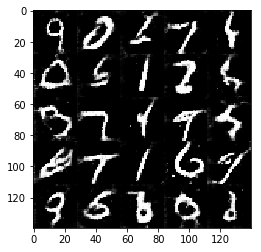

Epoch 2/2... Discriminator Loss: 0.8276... Generator Loss: 1.2559
Epoch 2/2... Discriminator Loss: 0.8966... Generator Loss: 1.1699
Epoch 2/2... Discriminator Loss: 0.8516... Generator Loss: 1.1726
Epoch 2/2... Discriminator Loss: 0.6655... Generator Loss: 1.6254
Epoch 2/2... Discriminator Loss: 0.6377... Generator Loss: 1.5963
Epoch 2/2... Discriminator Loss: 1.2578... Generator Loss: 0.6971
Epoch 2/2... Discriminator Loss: 0.8837... Generator Loss: 0.9805
Epoch 2/2... Discriminator Loss: 0.8520... Generator Loss: 1.1120
Epoch 2/2... Discriminator Loss: 1.0015... Generator Loss: 0.9403
Epoch 2/2... Discriminator Loss: 1.0142... Generator Loss: 0.9234
Epoch 2/2... Discriminator Loss: 1.1184... Generator Loss: 0.7607
Epoch 2/2... Discriminator Loss: 0.5381... Generator Loss: 1.9402
Epoch 2/2... Discriminator Loss: 1.0486... Generator Loss: 0.8555
Epoch 2/2... Discriminator Loss: 0.8781... Generator Loss: 1.0819
Epoch 2/2... Discriminator Loss: 1.0037... Generator Loss: 0.9781
Epoch 2/2.

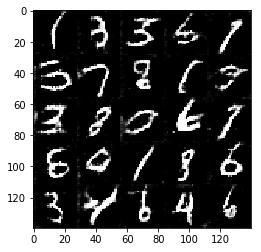

Epoch 2/2... Discriminator Loss: 0.5583... Generator Loss: 3.3544
Epoch 2/2... Discriminator Loss: 2.8521... Generator Loss: 0.2011
Epoch 2/2... Discriminator Loss: 0.7361... Generator Loss: 1.4553
Epoch 2/2... Discriminator Loss: 0.5876... Generator Loss: 2.3931
Epoch 2/2... Discriminator Loss: 0.7193... Generator Loss: 1.4224
Epoch 2/2... Discriminator Loss: 0.5609... Generator Loss: 2.1572
Epoch 2/2... Discriminator Loss: 0.6744... Generator Loss: 2.1803
Epoch 2/2... Discriminator Loss: 2.5749... Generator Loss: 0.1635
Epoch 2/2... Discriminator Loss: 0.8236... Generator Loss: 1.2739
Epoch 2/2... Discriminator Loss: 0.6123... Generator Loss: 2.1816
Epoch 2/2... Discriminator Loss: 0.6818... Generator Loss: 1.9259
Epoch 2/2... Discriminator Loss: 2.8466... Generator Loss: 0.1418
Epoch 2/2... Discriminator Loss: 1.6204... Generator Loss: 0.4461
Epoch 2/2... Discriminator Loss: 2.5375... Generator Loss: 6.0136
Epoch 2/2... Discriminator Loss: 0.8224... Generator Loss: 3.1368
Epoch 2/2.

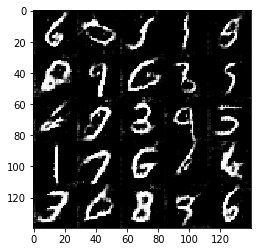

Epoch 2/2... Discriminator Loss: 2.7218... Generator Loss: 0.2342
Epoch 2/2... Discriminator Loss: 1.2832... Generator Loss: 0.6353
Epoch 2/2... Discriminator Loss: 0.7276... Generator Loss: 1.9084
Epoch 2/2... Discriminator Loss: 0.7978... Generator Loss: 1.6676
Epoch 2/2... Discriminator Loss: 1.5463... Generator Loss: 0.5565
Epoch 2/2... Discriminator Loss: 0.7990... Generator Loss: 1.3071
Epoch 2/2... Discriminator Loss: 0.6047... Generator Loss: 2.1861
Epoch 2/2... Discriminator Loss: 0.5566... Generator Loss: 2.5560
Epoch 2/2... Discriminator Loss: 2.6982... Generator Loss: 0.2180
Epoch 2/2... Discriminator Loss: 0.4639... Generator Loss: 3.8205
Epoch 2/2... Discriminator Loss: 0.5640... Generator Loss: 2.8851
Epoch 2/2... Discriminator Loss: 1.7652... Generator Loss: 0.4742
Epoch 2/2... Discriminator Loss: 0.6608... Generator Loss: 2.0247
Epoch 2/2... Discriminator Loss: 1.7325... Generator Loss: 0.4788
Epoch 2/2... Discriminator Loss: 0.8619... Generator Loss: 1.0075
Epoch 2/2.

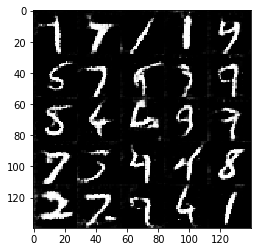

Epoch 2/2... Discriminator Loss: 2.7597... Generator Loss: 0.1659
Epoch 2/2... Discriminator Loss: 0.6675... Generator Loss: 2.4872
Epoch 2/2... Discriminator Loss: 0.6528... Generator Loss: 1.7403
Epoch 2/2... Discriminator Loss: 1.1747... Generator Loss: 1.1460
Epoch 2/2... Discriminator Loss: 0.5285... Generator Loss: 2.2063
Epoch 2/2... Discriminator Loss: 1.0152... Generator Loss: 0.8484
Epoch 2/2... Discriminator Loss: 0.4819... Generator Loss: 2.5061
Epoch 2/2... Discriminator Loss: 1.7195... Generator Loss: 0.3798
Epoch 2/2... Discriminator Loss: 1.1706... Generator Loss: 0.7248
Epoch 2/2... Discriminator Loss: 1.0974... Generator Loss: 0.9744
Epoch 2/2... Discriminator Loss: 0.5098... Generator Loss: 2.9891
Epoch 2/2... Discriminator Loss: 0.4984... Generator Loss: 2.5231
Epoch 2/2... Discriminator Loss: 0.9619... Generator Loss: 1.1063
Epoch 2/2... Discriminator Loss: 0.8918... Generator Loss: 1.2303
Epoch 2/2... Discriminator Loss: 0.8768... Generator Loss: 1.3932
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.4054... Generator Loss: 3.1457
Epoch 2/2... Discriminator Loss: 0.7023... Generator Loss: 1.8084
Epoch 2/2... Discriminator Loss: 1.5918... Generator Loss: 0.5190
Epoch 2/2... Discriminator Loss: 0.7820... Generator Loss: 1.7048
Epoch 2/2... Discriminator Loss: 0.7886... Generator Loss: 1.6662
Epoch 2/2... Discriminator Loss: 1.0779... Generator Loss: 0.8244
Epoch 2/2... Discriminator Loss: 0.5429... Generator Loss: 2.0315
Epoch 2/2... Discriminator Loss: 0.8042... Generator Loss: 1.5845
Epoch 2/2... Discriminator Loss: 0.9756... Generator Loss: 0.9606
Epoch 2/2... Discriminator Loss: 0.7313... Generator Loss: 1.6214
Epoch 2/2... Discriminator Loss: 0.8839... Generator Loss: 1.1340
Epoch 2/2... Discriminator Loss: 1.4443... Generator Loss: 0.5862
Epoch 2/2... Discriminator Loss: 1.8927... Generator Loss: 0.2924
Epoch 2/2... Discriminator Loss: 0.8902... Generator Loss: 0.9866
Epoch 2/2... Discriminator Loss: 1.9139... Generator Loss: 0.2981
Epoch 2/2.

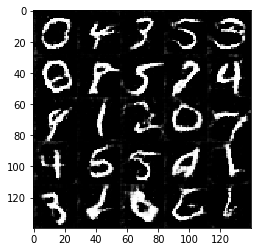

Epoch 2/2... Discriminator Loss: 0.7643... Generator Loss: 1.8632
Epoch 2/2... Discriminator Loss: 2.9417... Generator Loss: 0.1623
Epoch 2/2... Discriminator Loss: 2.1310... Generator Loss: 0.3619
Epoch 2/2... Discriminator Loss: 0.5711... Generator Loss: 2.2556
Epoch 2/2... Discriminator Loss: 1.0914... Generator Loss: 0.8283
Epoch 2/2... Discriminator Loss: 1.9542... Generator Loss: 0.2936
Epoch 2/2... Discriminator Loss: 1.4144... Generator Loss: 0.5366
Epoch 2/2... Discriminator Loss: 1.0290... Generator Loss: 1.2127
Epoch 2/2... Discriminator Loss: 0.8637... Generator Loss: 1.1981
Epoch 2/2... Discriminator Loss: 2.2318... Generator Loss: 0.2425
Epoch 2/2... Discriminator Loss: 0.9160... Generator Loss: 1.2437
Epoch 2/2... Discriminator Loss: 1.2603... Generator Loss: 0.6827
Epoch 2/2... Discriminator Loss: 1.0716... Generator Loss: 0.8173
Epoch 2/2... Discriminator Loss: 0.6393... Generator Loss: 1.7987
Epoch 2/2... Discriminator Loss: 0.9026... Generator Loss: 1.0743
Epoch 2/2.

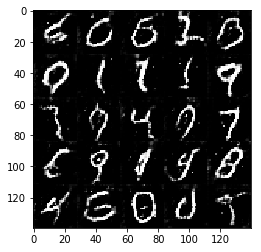

Epoch 2/2... Discriminator Loss: 0.7039... Generator Loss: 1.7808
Epoch 2/2... Discriminator Loss: 0.7722... Generator Loss: 1.9480
Epoch 2/2... Discriminator Loss: 0.6772... Generator Loss: 1.7420
Epoch 2/2... Discriminator Loss: 0.8331... Generator Loss: 1.5079
Epoch 2/2... Discriminator Loss: 1.1977... Generator Loss: 0.6315
Epoch 2/2... Discriminator Loss: 0.8041... Generator Loss: 1.6943
Epoch 2/2... Discriminator Loss: 0.8995... Generator Loss: 1.2126
Epoch 2/2... Discriminator Loss: 1.0285... Generator Loss: 0.9282
Epoch 2/2... Discriminator Loss: 0.8974... Generator Loss: 2.1320
Epoch 2/2... Discriminator Loss: 2.1409... Generator Loss: 0.5387
Epoch 2/2... Discriminator Loss: 1.2257... Generator Loss: 1.0579
Epoch 2/2... Discriminator Loss: 0.5803... Generator Loss: 2.1501
Epoch 2/2... Discriminator Loss: 0.5972... Generator Loss: 2.7860
Epoch 2/2... Discriminator Loss: 1.2211... Generator Loss: 0.8361
Epoch 2/2... Discriminator Loss: 1.2925... Generator Loss: 0.8179
Epoch 2/2.

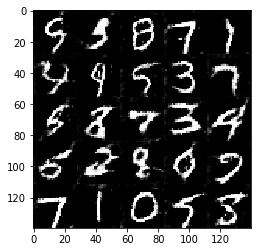

Epoch 2/2... Discriminator Loss: 1.3909... Generator Loss: 0.6527
Epoch 2/2... Discriminator Loss: 0.6371... Generator Loss: 1.6790
Epoch 2/2... Discriminator Loss: 0.6056... Generator Loss: 2.0828
Epoch 2/2... Discriminator Loss: 2.0187... Generator Loss: 0.2778
Epoch 2/2... Discriminator Loss: 0.5962... Generator Loss: 1.9240
Epoch 2/2... Discriminator Loss: 0.6625... Generator Loss: 1.7796
Epoch 2/2... Discriminator Loss: 1.0042... Generator Loss: 1.0324
Epoch 2/2... Discriminator Loss: 0.8488... Generator Loss: 1.4582
Epoch 2/2... Discriminator Loss: 0.7409... Generator Loss: 1.5512
Epoch 2/2... Discriminator Loss: 0.6611... Generator Loss: 1.6765
Epoch 2/2... Discriminator Loss: 0.5633... Generator Loss: 1.7499
Epoch 2/2... Discriminator Loss: 1.0853... Generator Loss: 0.8342
Epoch 2/2... Discriminator Loss: 0.9290... Generator Loss: 0.9357
Epoch 2/2... Discriminator Loss: 0.5107... Generator Loss: 2.3144
Epoch 2/2... Discriminator Loss: 1.4979... Generator Loss: 0.5504
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.6916... Generator Loss: 1.6421
Epoch 2/2... Discriminator Loss: 0.9749... Generator Loss: 0.8668
Epoch 2/2... Discriminator Loss: 0.8829... Generator Loss: 1.0319
Epoch 2/2... Discriminator Loss: 1.0482... Generator Loss: 0.7549
Epoch 2/2... Discriminator Loss: 1.8895... Generator Loss: 0.4339
Epoch 2/2... Discriminator Loss: 0.9794... Generator Loss: 1.0881
Epoch 2/2... Discriminator Loss: 0.8417... Generator Loss: 2.5413
Epoch 2/2... Discriminator Loss: 0.8077... Generator Loss: 1.5322
Epoch 2/2... Discriminator Loss: 1.0838... Generator Loss: 0.8626
Epoch 2/2... Discriminator Loss: 1.4327... Generator Loss: 0.8464
Epoch 2/2... Discriminator Loss: 1.6440... Generator Loss: 0.4227
Epoch 2/2... Discriminator Loss: 1.8449... Generator Loss: 2.8830
Epoch 2/2... Discriminator Loss: 0.6375... Generator Loss: 1.7065
Epoch 2/2... Discriminator Loss: 1.7639... Generator Loss: 0.3997
Epoch 2/2... Discriminator Loss: 0.6753... Generator Loss: 1.7737
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.7404... Generator Loss: 1.3190
Epoch 2/2... Discriminator Loss: 1.8550... Generator Loss: 0.3746
Epoch 2/2... Discriminator Loss: 0.7227... Generator Loss: 1.7205
Epoch 2/2... Discriminator Loss: 0.7641... Generator Loss: 1.3287
Epoch 2/2... Discriminator Loss: 0.5841... Generator Loss: 3.5906
Epoch 2/2... Discriminator Loss: 1.1467... Generator Loss: 0.7930
Epoch 2/2... Discriminator Loss: 1.0841... Generator Loss: 0.9286
Epoch 2/2... Discriminator Loss: 0.7944... Generator Loss: 1.3111
Epoch 2/2... Discriminator Loss: 0.5383... Generator Loss: 2.6016
Epoch 2/2... Discriminator Loss: 0.8306... Generator Loss: 1.1956
Epoch 2/2... Discriminator Loss: 1.3568... Generator Loss: 0.5748
Epoch 2/2... Discriminator Loss: 0.7903... Generator Loss: 1.4252
Epoch 2/2... Discriminator Loss: 1.4893... Generator Loss: 0.6632
Epoch 2/2... Discriminator Loss: 0.7817... Generator Loss: 1.2450
Epoch 2/2... Discriminator Loss: 0.5641... Generator Loss: 2.5294
Epoch 2/2.

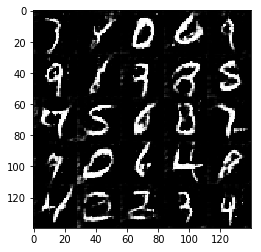

Epoch 2/2... Discriminator Loss: 0.7494... Generator Loss: 1.7910
Epoch 2/2... Discriminator Loss: 0.5573... Generator Loss: 1.9167
Epoch 2/2... Discriminator Loss: 2.5898... Generator Loss: 0.1710
Epoch 2/2... Discriminator Loss: 0.9559... Generator Loss: 1.2889
Epoch 2/2... Discriminator Loss: 0.4384... Generator Loss: 2.6549
Epoch 2/2... Discriminator Loss: 0.8357... Generator Loss: 1.1208
Epoch 2/2... Discriminator Loss: 0.5364... Generator Loss: 1.8973
Epoch 2/2... Discriminator Loss: 0.8556... Generator Loss: 1.0604
Epoch 2/2... Discriminator Loss: 0.7236... Generator Loss: 1.8621
Epoch 2/2... Discriminator Loss: 0.7913... Generator Loss: 1.2026
Epoch 2/2... Discriminator Loss: 0.8353... Generator Loss: 1.1227
Epoch 2/2... Discriminator Loss: 1.0057... Generator Loss: 0.9430
Epoch 2/2... Discriminator Loss: 0.6482... Generator Loss: 1.6079
Epoch 2/2... Discriminator Loss: 0.7531... Generator Loss: 1.4984
Epoch 2/2... Discriminator Loss: 1.6269... Generator Loss: 0.3722
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.5980... Generator Loss: 2.2164
Epoch 2/2... Discriminator Loss: 1.4446... Generator Loss: 0.5340
Epoch 2/2... Discriminator Loss: 1.0902... Generator Loss: 0.7268
Epoch 2/2... Discriminator Loss: 0.8422... Generator Loss: 1.1393
Epoch 2/2... Discriminator Loss: 0.8184... Generator Loss: 2.1972
Epoch 2/2... Discriminator Loss: 0.6933... Generator Loss: 1.8310
Epoch 2/2... Discriminator Loss: 2.6182... Generator Loss: 0.2347
Epoch 2/2... Discriminator Loss: 0.6738... Generator Loss: 1.3337
Epoch 2/2... Discriminator Loss: 0.8042... Generator Loss: 3.0575
Epoch 2/2... Discriminator Loss: 0.8387... Generator Loss: 1.2184
Epoch 2/2... Discriminator Loss: 1.6552... Generator Loss: 0.3825
Epoch 2/2... Discriminator Loss: 0.8179... Generator Loss: 1.3687
Epoch 2/2... Discriminator Loss: 1.3895... Generator Loss: 3.4642
Epoch 2/2... Discriminator Loss: 2.4312... Generator Loss: 0.2413
Epoch 2/2... Discriminator Loss: 1.3826... Generator Loss: 0.5544
Epoch 2/2.

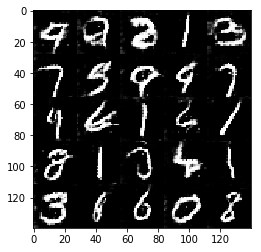

Epoch 2/2... Discriminator Loss: 0.8624... Generator Loss: 1.0489
Epoch 2/2... Discriminator Loss: 1.9564... Generator Loss: 0.3539
Epoch 2/2... Discriminator Loss: 0.8818... Generator Loss: 1.0703
Epoch 2/2... Discriminator Loss: 0.6118... Generator Loss: 2.7973
Epoch 2/2... Discriminator Loss: 0.7547... Generator Loss: 2.2266
Epoch 2/2... Discriminator Loss: 0.6672... Generator Loss: 1.7907
Epoch 2/2... Discriminator Loss: 1.4302... Generator Loss: 0.6678
Epoch 2/2... Discriminator Loss: 2.2543... Generator Loss: 0.1884
Epoch 2/2... Discriminator Loss: 0.7454... Generator Loss: 1.3089
Epoch 2/2... Discriminator Loss: 0.7667... Generator Loss: 1.5713
Epoch 2/2... Discriminator Loss: 0.6786... Generator Loss: 1.4431
Epoch 2/2... Discriminator Loss: 0.6458... Generator Loss: 1.5207
Epoch 2/2... Discriminator Loss: 2.0036... Generator Loss: 0.3586
Epoch 2/2... Discriminator Loss: 1.1955... Generator Loss: 1.5753
Epoch 2/2... Discriminator Loss: 0.4895... Generator Loss: 3.2183
Epoch 2/2.

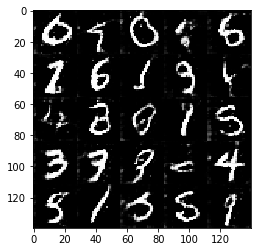

Epoch 2/2... Discriminator Loss: 1.5454... Generator Loss: 0.5051
Epoch 2/2... Discriminator Loss: 1.3917... Generator Loss: 0.4757
Epoch 2/2... Discriminator Loss: 1.3050... Generator Loss: 0.6441
Epoch 2/2... Discriminator Loss: 0.6170... Generator Loss: 2.8117
Epoch 2/2... Discriminator Loss: 0.9900... Generator Loss: 1.2200
Epoch 2/2... Discriminator Loss: 1.1930... Generator Loss: 1.0097
Epoch 2/2... Discriminator Loss: 1.0924... Generator Loss: 4.0019
Epoch 2/2... Discriminator Loss: 0.9458... Generator Loss: 1.1558
Epoch 2/2... Discriminator Loss: 1.2712... Generator Loss: 0.7673
Epoch 2/2... Discriminator Loss: 0.8682... Generator Loss: 1.2211
Epoch 2/2... Discriminator Loss: 0.6959... Generator Loss: 1.8207
Epoch 2/2... Discriminator Loss: 0.6685... Generator Loss: 2.3845
Epoch 2/2... Discriminator Loss: 2.0314... Generator Loss: 0.3607
Epoch 2/2... Discriminator Loss: 1.5888... Generator Loss: 0.4541
Epoch 2/2... Discriminator Loss: 0.8305... Generator Loss: 1.2404
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.7006... Generator Loss: 1.4001
Epoch 2/2... Discriminator Loss: 0.8245... Generator Loss: 1.2548
Epoch 2/2... Discriminator Loss: 0.4072... Generator Loss: 2.9808
Epoch 2/2... Discriminator Loss: 2.1028... Generator Loss: 0.2918
Epoch 2/2... Discriminator Loss: 0.8573... Generator Loss: 1.0728
Epoch 2/2... Discriminator Loss: 0.5790... Generator Loss: 2.6643
Epoch 2/2... Discriminator Loss: 0.5569... Generator Loss: 2.1569
Epoch 2/2... Discriminator Loss: 0.8455... Generator Loss: 1.2957
Epoch 2/2... Discriminator Loss: 1.9696... Generator Loss: 0.3331
Epoch 2/2... Discriminator Loss: 1.4365... Generator Loss: 0.7164
Epoch 2/2... Discriminator Loss: 0.7510... Generator Loss: 1.4585
Epoch 2/2... Discriminator Loss: 0.7835... Generator Loss: 1.3520
Epoch 2/2... Discriminator Loss: 0.8043... Generator Loss: 1.4399
Epoch 2/2... Discriminator Loss: 0.7464... Generator Loss: 1.5293
Epoch 2/2... Discriminator Loss: 1.4594... Generator Loss: 0.6314
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 1.5192... Generator Loss: 0.4246
Epoch 2/2... Discriminator Loss: 0.6901... Generator Loss: 1.4730
Epoch 2/2... Discriminator Loss: 0.6961... Generator Loss: 1.4597
Epoch 2/2... Discriminator Loss: 1.1302... Generator Loss: 0.8550
Epoch 2/2... Discriminator Loss: 0.8408... Generator Loss: 1.2584
Epoch 2/2... Discriminator Loss: 1.2396... Generator Loss: 0.8507
Epoch 2/2... Discriminator Loss: 0.9284... Generator Loss: 1.1445
Epoch 2/2... Discriminator Loss: 0.8751... Generator Loss: 1.2703
Epoch 2/2... Discriminator Loss: 0.4446... Generator Loss: 2.6963
Epoch 2/2... Discriminator Loss: 0.5383... Generator Loss: 2.2951
Epoch 2/2... Discriminator Loss: 0.6847... Generator Loss: 1.4371
Epoch 2/2... Discriminator Loss: 0.6103... Generator Loss: 1.8239
Epoch 2/2... Discriminator Loss: 0.9836... Generator Loss: 0.9381
Epoch 2/2... Discriminator Loss: 0.8822... Generator Loss: 0.9482
Epoch 2/2... Discriminator Loss: 0.6635... Generator Loss: 1.6262
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.8001... Generator Loss: 1.3220
Epoch 2/2... Discriminator Loss: 1.7424... Generator Loss: 3.2363
Epoch 2/2... Discriminator Loss: 0.7423... Generator Loss: 2.0986
Epoch 2/2... Discriminator Loss: 1.8570... Generator Loss: 0.5412
Epoch 2/2... Discriminator Loss: 1.0302... Generator Loss: 1.2247
Epoch 2/2... Discriminator Loss: 1.6496... Generator Loss: 0.4420
Epoch 2/2... Discriminator Loss: 1.0079... Generator Loss: 1.4798
Epoch 2/2... Discriminator Loss: 1.1030... Generator Loss: 1.0149
Epoch 2/2... Discriminator Loss: 1.0363... Generator Loss: 0.8299
Epoch 2/2... Discriminator Loss: 0.8268... Generator Loss: 1.7087
Epoch 2/2... Discriminator Loss: 0.8016... Generator Loss: 1.3649
Epoch 2/2... Discriminator Loss: 0.7759... Generator Loss: 1.4247
Epoch 2/2... Discriminator Loss: 0.7414... Generator Loss: 1.5829
Epoch 2/2... Discriminator Loss: 0.7795... Generator Loss: 1.3407
Epoch 2/2... Discriminator Loss: 0.6259... Generator Loss: 2.1376
Epoch 2/2.

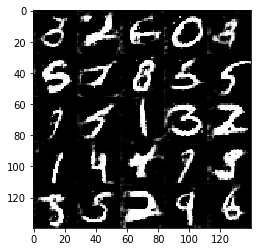

Epoch 2/2... Discriminator Loss: 1.0855... Generator Loss: 0.8939
Epoch 2/2... Discriminator Loss: 1.6781... Generator Loss: 0.5087
Epoch 2/2... Discriminator Loss: 0.4841... Generator Loss: 2.7798
Epoch 2/2... Discriminator Loss: 0.6039... Generator Loss: 1.8022
Epoch 2/2... Discriminator Loss: 1.9325... Generator Loss: 0.4448
Epoch 2/2... Discriminator Loss: 0.6107... Generator Loss: 1.7603
Epoch 2/2... Discriminator Loss: 0.5957... Generator Loss: 2.2039
Epoch 2/2... Discriminator Loss: 0.7436... Generator Loss: 1.2981
Epoch 2/2... Discriminator Loss: 1.0158... Generator Loss: 0.9913
Epoch 2/2... Discriminator Loss: 0.9158... Generator Loss: 1.6002
Epoch 2/2... Discriminator Loss: 0.7234... Generator Loss: 1.6124
Epoch 2/2... Discriminator Loss: 3.3991... Generator Loss: 0.0993
Epoch 2/2... Discriminator Loss: 1.1433... Generator Loss: 1.1692
Epoch 2/2... Discriminator Loss: 0.8847... Generator Loss: 1.1713
Epoch 2/2... Discriminator Loss: 0.6016... Generator Loss: 2.0142
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 0.6021... Generator Loss: 1.8573
Epoch 2/2... Discriminator Loss: 0.5262... Generator Loss: 2.5672
Epoch 2/2... Discriminator Loss: 0.6845... Generator Loss: 1.5710
Epoch 2/2... Discriminator Loss: 1.6813... Generator Loss: 0.5668
Epoch 2/2... Discriminator Loss: 1.2837... Generator Loss: 0.5446
Epoch 2/2... Discriminator Loss: 0.6854... Generator Loss: 1.5777
Epoch 2/2... Discriminator Loss: 0.5145... Generator Loss: 2.2015
Epoch 2/2... Discriminator Loss: 0.7455... Generator Loss: 1.3577
Epoch 2/2... Discriminator Loss: 0.5713... Generator Loss: 2.0963
Epoch 2/2... Discriminator Loss: 1.2052... Generator Loss: 0.8076
Epoch 2/2... Discriminator Loss: 1.3519... Generator Loss: 0.9031
Epoch 2/2... Discriminator Loss: 1.2492... Generator Loss: 0.6158
Epoch 2/2... Discriminator Loss: 0.6061... Generator Loss: 2.0796
Epoch 2/2... Discriminator Loss: 0.4094... Generator Loss: 5.1474
Epoch 2/2... Discriminator Loss: 0.6686... Generator Loss: 1.5568
Epoch 2/2.

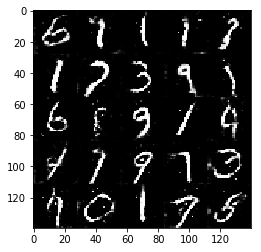

Epoch 2/2... Discriminator Loss: 0.7708... Generator Loss: 1.5809
Epoch 2/2... Discriminator Loss: 0.8667... Generator Loss: 1.0682
Epoch 2/2... Discriminator Loss: 1.4958... Generator Loss: 0.5295
Epoch 2/2... Discriminator Loss: 1.3882... Generator Loss: 0.6150
Epoch 2/2... Discriminator Loss: 1.2753... Generator Loss: 0.5645
Epoch 2/2... Discriminator Loss: 1.9703... Generator Loss: 0.3561
Epoch 2/2... Discriminator Loss: 1.2398... Generator Loss: 0.8213
Epoch 2/2... Discriminator Loss: 0.3716... Generator Loss: 3.6266
Epoch 2/2... Discriminator Loss: 0.7761... Generator Loss: 1.7737
Epoch 2/2... Discriminator Loss: 1.0080... Generator Loss: 1.2325
Epoch 2/2... Discriminator Loss: 1.4655... Generator Loss: 0.8119
Epoch 2/2... Discriminator Loss: 0.7109... Generator Loss: 1.4851
Epoch 2/2... Discriminator Loss: 0.9318... Generator Loss: 2.3360
Epoch 2/2... Discriminator Loss: 0.5031... Generator Loss: 2.4617
Epoch 2/2... Discriminator Loss: 0.7117... Generator Loss: 1.4106
Epoch 2/2.

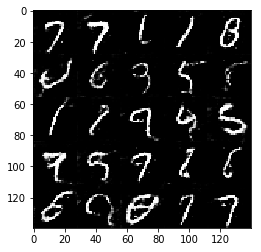

Epoch 2/2... Discriminator Loss: 0.6159... Generator Loss: 1.9612
Epoch 2/2... Discriminator Loss: 1.0808... Generator Loss: 0.9768
Epoch 2/2... Discriminator Loss: 0.7289... Generator Loss: 1.6142
Epoch 2/2... Discriminator Loss: 0.8251... Generator Loss: 1.1149
Epoch 2/2... Discriminator Loss: 0.4872... Generator Loss: 2.5612
Epoch 2/2... Discriminator Loss: 0.9023... Generator Loss: 0.9183
Epoch 2/2... Discriminator Loss: 0.9372... Generator Loss: 1.0816
Epoch 2/2... Discriminator Loss: 0.5825... Generator Loss: 1.9260
Epoch 2/2... Discriminator Loss: 1.0121... Generator Loss: 0.8520
Epoch 2/2... Discriminator Loss: 0.9591... Generator Loss: 1.0096
Epoch 2/2... Discriminator Loss: 0.9975... Generator Loss: 0.8061
Epoch 2/2... Discriminator Loss: 0.5605... Generator Loss: 2.1221
Epoch 2/2... Discriminator Loss: 0.4567... Generator Loss: 3.2756
Epoch 2/2... Discriminator Loss: 0.6164... Generator Loss: 2.0062
Epoch 2/2... Discriminator Loss: 2.7174... Generator Loss: 0.1310
Epoch 2/2.

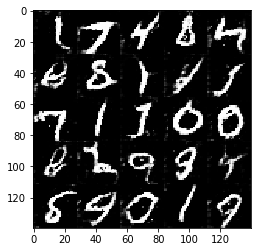

Epoch 2/2... Discriminator Loss: 0.7736... Generator Loss: 1.5329
Epoch 2/2... Discriminator Loss: 0.7104... Generator Loss: 1.5523
Epoch 2/2... Discriminator Loss: 1.1562... Generator Loss: 0.6134
Epoch 2/2... Discriminator Loss: 0.5207... Generator Loss: 2.0894
Epoch 2/2... Discriminator Loss: 1.2285... Generator Loss: 0.6768
Epoch 2/2... Discriminator Loss: 0.9588... Generator Loss: 1.0241
Epoch 2/2... Discriminator Loss: 0.6092... Generator Loss: 1.6097
Epoch 2/2... Discriminator Loss: 0.9110... Generator Loss: 1.1304
Epoch 2/2... Discriminator Loss: 0.6606... Generator Loss: 1.7231
Epoch 2/2... Discriminator Loss: 0.5609... Generator Loss: 2.1102
Epoch 2/2... Discriminator Loss: 0.6077... Generator Loss: 1.5030
Epoch 2/2... Discriminator Loss: 0.7399... Generator Loss: 1.5482
Epoch 2/2... Discriminator Loss: 0.8014... Generator Loss: 1.2648
Epoch 2/2... Discriminator Loss: 0.6060... Generator Loss: 1.7396
Epoch 2/2... Discriminator Loss: 0.6754... Generator Loss: 1.6849
Epoch 2/2.

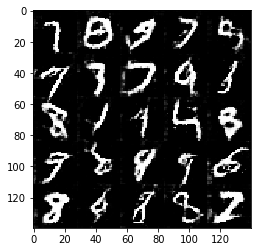

Epoch 2/2... Discriminator Loss: 0.6620... Generator Loss: 2.3850
Epoch 2/2... Discriminator Loss: 0.7562... Generator Loss: 1.5633
Epoch 2/2... Discriminator Loss: 1.1759... Generator Loss: 0.6900
Epoch 2/2... Discriminator Loss: 1.2006... Generator Loss: 0.6577
Epoch 2/2... Discriminator Loss: 0.6377... Generator Loss: 1.5730
Epoch 2/2... Discriminator Loss: 2.0688... Generator Loss: 0.2243
Epoch 2/2... Discriminator Loss: 0.5990... Generator Loss: 1.8245
Epoch 2/2... Discriminator Loss: 0.6469... Generator Loss: 1.7801
Epoch 2/2... Discriminator Loss: 0.9300... Generator Loss: 1.0181
Epoch 2/2... Discriminator Loss: 0.7089... Generator Loss: 1.4831
Epoch 2/2... Discriminator Loss: 0.4631... Generator Loss: 2.4071
Epoch 2/2... Discriminator Loss: 0.8341... Generator Loss: 1.0360
Epoch 2/2... Discriminator Loss: 1.2184... Generator Loss: 0.6637
Epoch 2/2... Discriminator Loss: 0.6413... Generator Loss: 1.5870
Epoch 2/2... Discriminator Loss: 0.7324... Generator Loss: 1.4758
Epoch 2/2.

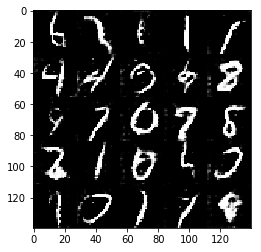

Epoch 2/2... Discriminator Loss: 1.6015... Generator Loss: 0.5735
Epoch 2/2... Discriminator Loss: 1.0817... Generator Loss: 3.5595
Epoch 2/2... Discriminator Loss: 0.7447... Generator Loss: 3.9878
Epoch 2/2... Discriminator Loss: 0.7620... Generator Loss: 1.4736
Epoch 2/2... Discriminator Loss: 1.4253... Generator Loss: 0.5101
Epoch 2/2... Discriminator Loss: 0.8192... Generator Loss: 1.7441
Epoch 2/2... Discriminator Loss: 0.6405... Generator Loss: 1.9523
Epoch 2/2... Discriminator Loss: 0.6476... Generator Loss: 1.5407
Epoch 2/2... Discriminator Loss: 0.7308... Generator Loss: 1.4064
Epoch 2/2... Discriminator Loss: 1.2701... Generator Loss: 0.7153
Epoch 2/2... Discriminator Loss: 1.4600... Generator Loss: 0.5000
Epoch 2/2... Discriminator Loss: 0.9596... Generator Loss: 1.1012
Epoch 2/2... Discriminator Loss: 0.6830... Generator Loss: 2.1070
Epoch 2/2... Discriminator Loss: 0.4817... Generator Loss: 2.7057
Epoch 2/2... Discriminator Loss: 0.8577... Generator Loss: 1.4191
Epoch 2/2.

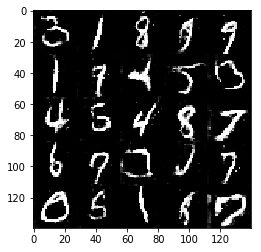

Epoch 2/2... Discriminator Loss: 1.0073... Generator Loss: 1.2286
Epoch 2/2... Discriminator Loss: 1.2492... Generator Loss: 0.6648
Epoch 2/2... Discriminator Loss: 0.5536... Generator Loss: 2.3322
Epoch 2/2... Discriminator Loss: 0.9885... Generator Loss: 3.2655
Epoch 2/2... Discriminator Loss: 1.5782... Generator Loss: 0.7545
Epoch 2/2... Discriminator Loss: 1.2462... Generator Loss: 1.0046
Epoch 2/2... Discriminator Loss: 0.5012... Generator Loss: 2.9244
Epoch 2/2... Discriminator Loss: 0.4321... Generator Loss: 3.4530
Epoch 2/2... Discriminator Loss: 2.9042... Generator Loss: 0.1650
Epoch 2/2... Discriminator Loss: 0.4115... Generator Loss: 4.2329
Epoch 2/2... Discriminator Loss: 0.7946... Generator Loss: 1.4854
Epoch 2/2... Discriminator Loss: 0.9087... Generator Loss: 1.0907
Epoch 2/2... Discriminator Loss: 1.2318... Generator Loss: 0.9422
Epoch 2/2... Discriminator Loss: 1.0945... Generator Loss: 1.0270
Epoch 2/2... Discriminator Loss: 0.7067... Generator Loss: 1.7552
Epoch 2/2.

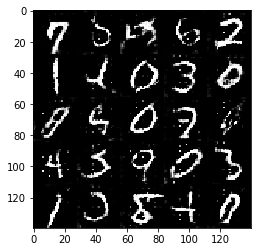

Epoch 2/2... Discriminator Loss: 0.9195... Generator Loss: 1.4052
Epoch 2/2... Discriminator Loss: 1.3060... Generator Loss: 0.7750
Epoch 2/2... Discriminator Loss: 1.3457... Generator Loss: 0.7978
Epoch 2/2... Discriminator Loss: 1.1693... Generator Loss: 0.8982
Epoch 2/2... Discriminator Loss: 1.0308... Generator Loss: 0.8901
Epoch 2/2... Discriminator Loss: 0.6765... Generator Loss: 1.6133
Epoch 2/2... Discriminator Loss: 0.9934... Generator Loss: 1.1131
Epoch 2/2... Discriminator Loss: 0.9112... Generator Loss: 1.0500
Epoch 2/2... Discriminator Loss: 0.7138... Generator Loss: 1.5278
Epoch 2/2... Discriminator Loss: 2.0715... Generator Loss: 0.3629
Epoch 2/2... Discriminator Loss: 1.2883... Generator Loss: 0.7104
Epoch 2/2... Discriminator Loss: 0.9986... Generator Loss: 1.0161
Epoch 2/2... Discriminator Loss: 0.9898... Generator Loss: 1.2590
Epoch 2/2... Discriminator Loss: 1.8365... Generator Loss: 0.4801
Epoch 2/2... Discriminator Loss: 0.8391... Generator Loss: 1.2381
Epoch 2/2.

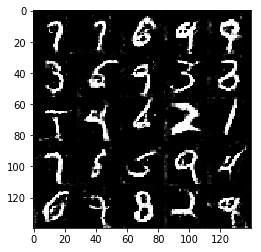

Epoch 2/2... Discriminator Loss: 0.9015... Generator Loss: 1.0148
Epoch 2/2... Discriminator Loss: 0.9155... Generator Loss: 0.9758
Epoch 2/2... Discriminator Loss: 2.1436... Generator Loss: 0.3519
Epoch 2/2... Discriminator Loss: 1.9568... Generator Loss: 0.2913
Epoch 2/2... Discriminator Loss: 1.0415... Generator Loss: 1.0109
Epoch 2/2... Discriminator Loss: 1.0013... Generator Loss: 1.9245
Epoch 2/2... Discriminator Loss: 0.4452... Generator Loss: 2.6780
Epoch 2/2... Discriminator Loss: 1.3376... Generator Loss: 0.7506
Epoch 2/2... Discriminator Loss: 1.3210... Generator Loss: 0.5498
Epoch 2/2... Discriminator Loss: 0.4730... Generator Loss: 2.6927
Epoch 2/2... Discriminator Loss: 1.8200... Generator Loss: 0.3242
Epoch 2/2... Discriminator Loss: 0.7462... Generator Loss: 1.4049
Epoch 2/2... Discriminator Loss: 0.5992... Generator Loss: 1.9987
Epoch 2/2... Discriminator Loss: 0.7395... Generator Loss: 1.8319
Epoch 2/2... Discriminator Loss: 2.2131... Generator Loss: 0.2644
Epoch 2/2.

Epoch 2/2... Discriminator Loss: 1.0593... Generator Loss: 0.7464
Epoch 2/2... Discriminator Loss: 0.5048... Generator Loss: 2.2212
Epoch 2/2... Discriminator Loss: 0.3970... Generator Loss: 3.3181
Epoch 2/2... Discriminator Loss: 0.6433... Generator Loss: 1.8223
Epoch 2/2... Discriminator Loss: 1.2300... Generator Loss: 0.7660
Epoch 2/2... Discriminator Loss: 1.9908... Generator Loss: 0.4028
Epoch 2/2... Discriminator Loss: 0.7075... Generator Loss: 1.3503
Epoch 2/2... Discriminator Loss: 0.4444... Generator Loss: 3.5316
Epoch 2/2... Discriminator Loss: 0.6264... Generator Loss: 1.7925
Epoch 2/2... Discriminator Loss: 0.7998... Generator Loss: 1.3420
Epoch 2/2... Discriminator Loss: 0.7477... Generator Loss: 1.3069
Epoch 2/2... Discriminator Loss: 1.3419... Generator Loss: 0.6477
Epoch 2/2... Discriminator Loss: 2.2599... Generator Loss: 0.2445
Epoch 2/2... Discriminator Loss: 1.1342... Generator Loss: 0.7836
Epoch 2/2... Discriminator Loss: 0.5943... Generator Loss: 1.7237
Epoch 2/2.

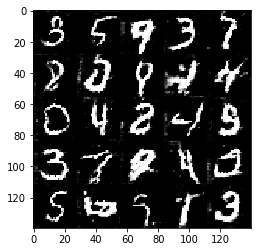

Epoch 2/2... Discriminator Loss: 0.6883... Generator Loss: 2.4431
Epoch 2/2... Discriminator Loss: 1.4650... Generator Loss: 0.5407
Epoch 2/2... Discriminator Loss: 0.7645... Generator Loss: 1.2161
Epoch 2/2... Discriminator Loss: 0.6971... Generator Loss: 1.2983
Epoch 2/2... Discriminator Loss: 0.5926... Generator Loss: 1.8313
Epoch 2/2... Discriminator Loss: 1.3104... Generator Loss: 0.8667
Epoch 2/2... Discriminator Loss: 1.6301... Generator Loss: 0.6124
Epoch 2/2... Discriminator Loss: 0.5073... Generator Loss: 2.2721
Epoch 2/2... Discriminator Loss: 0.6147... Generator Loss: 2.6945
Epoch 2/2... Discriminator Loss: 2.9880... Generator Loss: 0.1342
Epoch 2/2... Discriminator Loss: 1.3057... Generator Loss: 0.7112
Epoch 2/2... Discriminator Loss: 0.8093... Generator Loss: 1.9221
Epoch 2/2... Discriminator Loss: 0.7833... Generator Loss: 2.3114
Epoch 2/2... Discriminator Loss: 1.4127... Generator Loss: 1.0141
Epoch 2/2... Discriminator Loss: 0.8745... Generator Loss: 1.1372
Epoch 2/2.

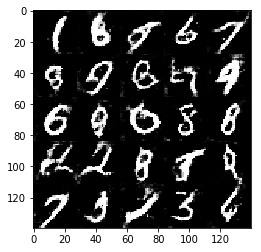

Epoch 2/2... Discriminator Loss: 0.8547... Generator Loss: 1.1813
Epoch 2/2... Discriminator Loss: 0.7842... Generator Loss: 1.1829
Epoch 2/2... Discriminator Loss: 0.9418... Generator Loss: 0.8803
Epoch 2/2... Discriminator Loss: 1.8897... Generator Loss: 0.3124
Epoch 2/2... Discriminator Loss: 1.0574... Generator Loss: 0.7938
Epoch 2/2... Discriminator Loss: 1.2244... Generator Loss: 3.4701
Epoch 2/2... Discriminator Loss: 0.5963... Generator Loss: 2.4674
Epoch 2/2... Discriminator Loss: 0.9196... Generator Loss: 1.3133
Epoch 2/2... Discriminator Loss: 2.5957... Generator Loss: 0.2556
Epoch 2/2... Discriminator Loss: 0.8899... Generator Loss: 1.0026
Epoch 2/2... Discriminator Loss: 0.8362... Generator Loss: 1.7221
Epoch 2/2... Discriminator Loss: 0.5603... Generator Loss: 2.3980
Epoch 2/2... Discriminator Loss: 0.8208... Generator Loss: 1.1147
Epoch 2/2... Discriminator Loss: 1.7027... Generator Loss: 0.3985
Epoch 2/2... Discriminator Loss: 1.1175... Generator Loss: 0.8206
Epoch 2/2.

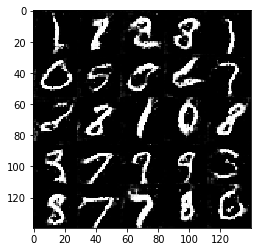

Epoch 2/2... Discriminator Loss: 0.7026... Generator Loss: 1.7459
Epoch 2/2... Discriminator Loss: 0.8225... Generator Loss: 1.8993
Epoch 2/2... Discriminator Loss: 1.6616... Generator Loss: 0.6521
Epoch 2/2... Discriminator Loss: 1.7477... Generator Loss: 0.3751
Epoch 2/2... Discriminator Loss: 0.5208... Generator Loss: 1.9994
Epoch 2/2... Discriminator Loss: 1.1588... Generator Loss: 0.8084
Epoch 2/2... Discriminator Loss: 1.1308... Generator Loss: 0.7569
Epoch 2/2... Discriminator Loss: 0.8604... Generator Loss: 1.1791
Epoch 2/2... Discriminator Loss: 0.5685... Generator Loss: 1.8253
Epoch 2/2... Discriminator Loss: 1.4149... Generator Loss: 0.6520
Epoch 2/2... Discriminator Loss: 1.7110... Generator Loss: 0.6455
Epoch 2/2... Discriminator Loss: 1.1757... Generator Loss: 0.7995
Epoch 2/2... Discriminator Loss: 0.6450... Generator Loss: 2.7706
Epoch 2/2... Discriminator Loss: 0.7717... Generator Loss: 1.3593
Epoch 2/2... Discriminator Loss: 1.1485... Generator Loss: 0.9938
Epoch 2/2.

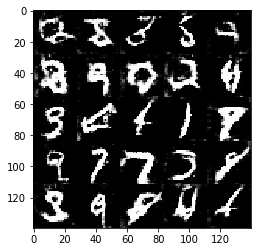

In [15]:

batch_size = 10
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.6833... Generator Loss: 2.9896
Epoch 1/1... Discriminator Loss: 0.5230... Generator Loss: 4.5691
Epoch 1/1... Discriminator Loss: 3.3993... Generator Loss: 0.1887
Epoch 1/1... Discriminator Loss: 2.0034... Generator Loss: 9.8618
Epoch 1/1... Discriminator Loss: 0.7753... Generator Loss: 5.4992
Epoch 1/1... Discriminator Loss: 1.5473... Generator Loss: 1.2912
Epoch 1/1... Discriminator Loss: 0.7626... Generator Loss: 2.3683
Epoch 1/1... Discriminator Loss: 0.8670... Generator Loss: 4.9333
Epoch 1/1... Discriminator Loss: 1.8370... Generator Loss: 0.9913
Epoch 1/1... Discriminator Loss: 0.7759... Generator Loss: 9.9746
Epoch 1/1... Discriminator Loss: 0.5407... Generator Loss: 8.9700
Epoch 1/1... Discriminator Loss: 1.0443... Generator Loss: 2.2337
Epoch 1/1... Discriminator Loss: 0.5779... Generator Loss: 4.0895
Epoch 1/1... Discriminator Loss: 0.7801... Generator Loss: 2.0023
Epoch 1/1... Discriminator Loss: 0.5858... Generator Loss: 3.7638
Epoch 1/1.

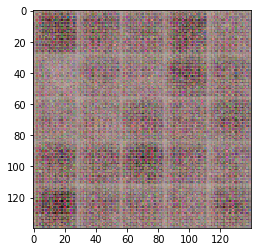

Epoch 1/1... Discriminator Loss: 1.6665... Generator Loss: 2.6202
Epoch 1/1... Discriminator Loss: 0.5685... Generator Loss: 2.9836
Epoch 1/1... Discriminator Loss: 0.6343... Generator Loss: 3.4526
Epoch 1/1... Discriminator Loss: 0.7904... Generator Loss: 2.1912
Epoch 1/1... Discriminator Loss: 0.6420... Generator Loss: 2.2397
Epoch 1/1... Discriminator Loss: 0.6156... Generator Loss: 2.4439
Epoch 1/1... Discriminator Loss: 0.8097... Generator Loss: 2.3187
Epoch 1/1... Discriminator Loss: 0.5611... Generator Loss: 2.2696
Epoch 1/1... Discriminator Loss: 1.1147... Generator Loss: 1.4116
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 3.9888
Epoch 1/1... Discriminator Loss: 0.8651... Generator Loss: 1.2600
Epoch 1/1... Discriminator Loss: 0.7586... Generator Loss: 3.5841
Epoch 1/1... Discriminator Loss: 0.5144... Generator Loss: 2.8258
Epoch 1/1... Discriminator Loss: 0.8869... Generator Loss: 1.4322
Epoch 1/1... Discriminator Loss: 0.8882... Generator Loss: 4.0031
Epoch 1/1.

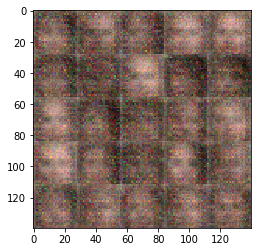

Epoch 1/1... Discriminator Loss: 0.8652... Generator Loss: 4.2209
Epoch 1/1... Discriminator Loss: 0.6511... Generator Loss: 2.4444
Epoch 1/1... Discriminator Loss: 0.8240... Generator Loss: 1.6676
Epoch 1/1... Discriminator Loss: 0.6885... Generator Loss: 2.7468
Epoch 1/1... Discriminator Loss: 0.9679... Generator Loss: 1.2931
Epoch 1/1... Discriminator Loss: 0.9324... Generator Loss: 2.9447
Epoch 1/1... Discriminator Loss: 0.8061... Generator Loss: 1.8063
Epoch 1/1... Discriminator Loss: 0.7111... Generator Loss: 1.6568
Epoch 1/1... Discriminator Loss: 0.6628... Generator Loss: 3.1425
Epoch 1/1... Discriminator Loss: 0.5247... Generator Loss: 2.9330
Epoch 1/1... Discriminator Loss: 0.5983... Generator Loss: 2.0191
Epoch 1/1... Discriminator Loss: 0.5934... Generator Loss: 2.7539
Epoch 1/1... Discriminator Loss: 0.7560... Generator Loss: 1.7699
Epoch 1/1... Discriminator Loss: 0.5799... Generator Loss: 3.6336
Epoch 1/1... Discriminator Loss: 0.5762... Generator Loss: 2.3393
Epoch 1/1.

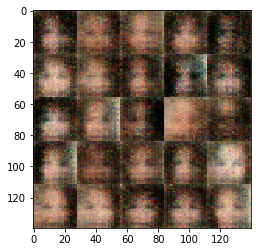

Epoch 1/1... Discriminator Loss: 0.7932... Generator Loss: 3.5318
Epoch 1/1... Discriminator Loss: 1.1660... Generator Loss: 1.1381
Epoch 1/1... Discriminator Loss: 0.9787... Generator Loss: 4.2784
Epoch 1/1... Discriminator Loss: 1.1126... Generator Loss: 1.6877
Epoch 1/1... Discriminator Loss: 0.6401... Generator Loss: 2.8472
Epoch 1/1... Discriminator Loss: 1.4421... Generator Loss: 1.4102
Epoch 1/1... Discriminator Loss: 1.8334... Generator Loss: 5.7134
Epoch 1/1... Discriminator Loss: 0.8971... Generator Loss: 1.5045
Epoch 1/1... Discriminator Loss: 0.6425... Generator Loss: 2.0660
Epoch 1/1... Discriminator Loss: 0.8277... Generator Loss: 3.2933
Epoch 1/1... Discriminator Loss: 0.7599... Generator Loss: 1.4207
Epoch 1/1... Discriminator Loss: 0.8114... Generator Loss: 2.8209
Epoch 1/1... Discriminator Loss: 0.8970... Generator Loss: 1.5290
Epoch 1/1... Discriminator Loss: 0.9238... Generator Loss: 1.6162
Epoch 1/1... Discriminator Loss: 1.4604... Generator Loss: 5.3816
Epoch 1/1.

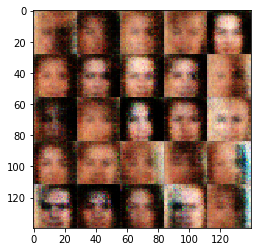

Epoch 1/1... Discriminator Loss: 1.3112... Generator Loss: 0.7848
Epoch 1/1... Discriminator Loss: 1.2349... Generator Loss: 5.3519
Epoch 1/1... Discriminator Loss: 0.6624... Generator Loss: 1.7567
Epoch 1/1... Discriminator Loss: 0.7261... Generator Loss: 2.0692
Epoch 1/1... Discriminator Loss: 0.5732... Generator Loss: 3.2926
Epoch 1/1... Discriminator Loss: 0.5288... Generator Loss: 3.0918
Epoch 1/1... Discriminator Loss: 0.8679... Generator Loss: 1.4726
Epoch 1/1... Discriminator Loss: 0.6670... Generator Loss: 2.6545
Epoch 1/1... Discriminator Loss: 0.7060... Generator Loss: 1.9346
Epoch 1/1... Discriminator Loss: 0.8507... Generator Loss: 1.5174
Epoch 1/1... Discriminator Loss: 0.8932... Generator Loss: 2.7344
Epoch 1/1... Discriminator Loss: 1.6658... Generator Loss: 0.7315
Epoch 1/1... Discriminator Loss: 2.0116... Generator Loss: 5.7982
Epoch 1/1... Discriminator Loss: 1.6140... Generator Loss: 0.7533
Epoch 1/1... Discriminator Loss: 0.6824... Generator Loss: 3.0905
Epoch 1/1.

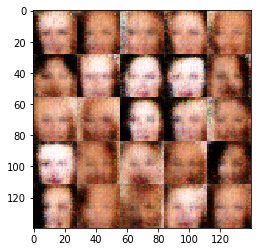

Epoch 1/1... Discriminator Loss: 1.1609... Generator Loss: 3.8424
Epoch 1/1... Discriminator Loss: 1.6376... Generator Loss: 0.7806
Epoch 1/1... Discriminator Loss: 0.5803... Generator Loss: 3.4223
Epoch 1/1... Discriminator Loss: 0.9876... Generator Loss: 1.3922
Epoch 1/1... Discriminator Loss: 1.0841... Generator Loss: 1.0546
Epoch 1/1... Discriminator Loss: 0.5829... Generator Loss: 3.0989
Epoch 1/1... Discriminator Loss: 0.6043... Generator Loss: 2.4717
Epoch 1/1... Discriminator Loss: 0.7053... Generator Loss: 1.7972
Epoch 1/1... Discriminator Loss: 0.7611... Generator Loss: 3.7616
Epoch 1/1... Discriminator Loss: 0.5661... Generator Loss: 2.5323
Epoch 1/1... Discriminator Loss: 0.6309... Generator Loss: 1.9687
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 4.7373
Epoch 1/1... Discriminator Loss: 1.6241... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 0.5695... Generator Loss: 3.2174
Epoch 1/1... Discriminator Loss: 0.6577... Generator Loss: 2.1685
Epoch 1/1.

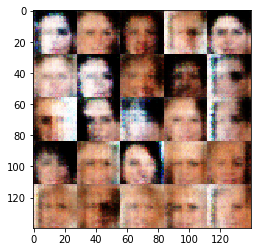

Epoch 1/1... Discriminator Loss: 0.8179... Generator Loss: 3.5991
Epoch 1/1... Discriminator Loss: 1.7594... Generator Loss: 0.4702
Epoch 1/1... Discriminator Loss: 0.9939... Generator Loss: 2.7995
Epoch 1/1... Discriminator Loss: 0.6047... Generator Loss: 3.8862
Epoch 1/1... Discriminator Loss: 1.0099... Generator Loss: 1.2478
Epoch 1/1... Discriminator Loss: 0.5513... Generator Loss: 2.7142
Epoch 1/1... Discriminator Loss: 0.5585... Generator Loss: 3.1226
Epoch 1/1... Discriminator Loss: 0.7022... Generator Loss: 1.7407
Epoch 1/1... Discriminator Loss: 0.6269... Generator Loss: 3.3436
Epoch 1/1... Discriminator Loss: 0.5611... Generator Loss: 3.7703
Epoch 1/1... Discriminator Loss: 0.7574... Generator Loss: 1.4309
Epoch 1/1... Discriminator Loss: 0.7131... Generator Loss: 2.0570
Epoch 1/1... Discriminator Loss: 0.6511... Generator Loss: 3.9630
Epoch 1/1... Discriminator Loss: 0.6751... Generator Loss: 4.5399
Epoch 1/1... Discriminator Loss: 2.0296... Generator Loss: 0.4693
Epoch 1/1.

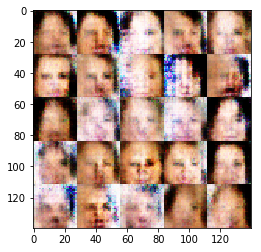

Epoch 1/1... Discriminator Loss: 0.6232... Generator Loss: 2.5279
Epoch 1/1... Discriminator Loss: 0.6209... Generator Loss: 3.8591
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.6770
Epoch 1/1... Discriminator Loss: 0.5704... Generator Loss: 4.4019
Epoch 1/1... Discriminator Loss: 0.4824... Generator Loss: 2.8567
Epoch 1/1... Discriminator Loss: 0.7180... Generator Loss: 1.7896
Epoch 1/1... Discriminator Loss: 0.5917... Generator Loss: 2.6384
Epoch 1/1... Discriminator Loss: 0.6104... Generator Loss: 2.4654
Epoch 1/1... Discriminator Loss: 1.8744... Generator Loss: 0.6246
Epoch 1/1... Discriminator Loss: 0.7688... Generator Loss: 4.1215
Epoch 1/1... Discriminator Loss: 0.5231... Generator Loss: 3.2243
Epoch 1/1... Discriminator Loss: 0.9278... Generator Loss: 1.3904
Epoch 1/1... Discriminator Loss: 0.8253... Generator Loss: 3.5930
Epoch 1/1... Discriminator Loss: 0.6100... Generator Loss: 3.2628
Epoch 1/1... Discriminator Loss: 1.3642... Generator Loss: 1.3484
Epoch 1/1.

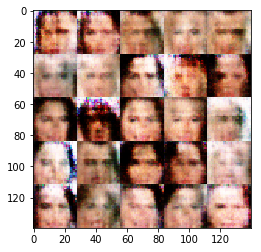

Epoch 1/1... Discriminator Loss: 0.5976... Generator Loss: 2.7711
Epoch 1/1... Discriminator Loss: 0.5281... Generator Loss: 2.5917
Epoch 1/1... Discriminator Loss: 1.0889... Generator Loss: 1.1217
Epoch 1/1... Discriminator Loss: 0.6537... Generator Loss: 2.5053
Epoch 1/1... Discriminator Loss: 0.7619... Generator Loss: 1.7261
Epoch 1/1... Discriminator Loss: 0.6329... Generator Loss: 2.4085
Epoch 1/1... Discriminator Loss: 0.9935... Generator Loss: 1.0425
Epoch 1/1... Discriminator Loss: 0.7234... Generator Loss: 3.0843
Epoch 1/1... Discriminator Loss: 1.0236... Generator Loss: 1.1319
Epoch 1/1... Discriminator Loss: 0.6719... Generator Loss: 2.0360
Epoch 1/1... Discriminator Loss: 0.8395... Generator Loss: 3.0935
Epoch 1/1... Discriminator Loss: 0.8592... Generator Loss: 1.5137
Epoch 1/1... Discriminator Loss: 0.6756... Generator Loss: 3.0047
Epoch 1/1... Discriminator Loss: 0.6978... Generator Loss: 1.4009
Epoch 1/1... Discriminator Loss: 1.1349... Generator Loss: 3.9079
Epoch 1/1.

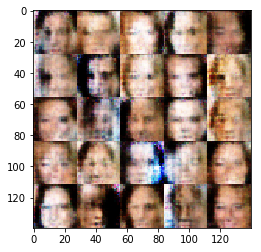

Epoch 1/1... Discriminator Loss: 1.4308... Generator Loss: 0.6065
Epoch 1/1... Discriminator Loss: 0.8838... Generator Loss: 3.2251
Epoch 1/1... Discriminator Loss: 0.5700... Generator Loss: 2.5521
Epoch 1/1... Discriminator Loss: 0.7048... Generator Loss: 1.5513
Epoch 1/1... Discriminator Loss: 0.6395... Generator Loss: 2.1639
Epoch 1/1... Discriminator Loss: 0.6589... Generator Loss: 2.6341
Epoch 1/1... Discriminator Loss: 0.8896... Generator Loss: 1.4306
Epoch 1/1... Discriminator Loss: 0.8036... Generator Loss: 1.4805
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 0.6841
Epoch 1/1... Discriminator Loss: 2.7818... Generator Loss: 6.3850
Epoch 1/1... Discriminator Loss: 0.6828... Generator Loss: 1.9496
Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 1.0141
Epoch 1/1... Discriminator Loss: 0.7084... Generator Loss: 3.0633
Epoch 1/1... Discriminator Loss: 0.6183... Generator Loss: 1.8143
Epoch 1/1... Discriminator Loss: 0.7225... Generator Loss: 1.4928
Epoch 1/1.

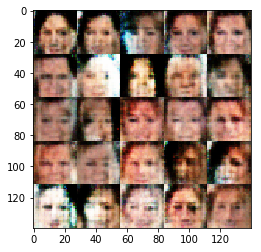

Epoch 1/1... Discriminator Loss: 1.1073... Generator Loss: 1.0609
Epoch 1/1... Discriminator Loss: 1.0110... Generator Loss: 4.3696
Epoch 1/1... Discriminator Loss: 0.6475... Generator Loss: 2.1890
Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 0.7113
Epoch 1/1... Discriminator Loss: 0.8832... Generator Loss: 1.9177
Epoch 1/1... Discriminator Loss: 0.9786... Generator Loss: 2.4550
Epoch 1/1... Discriminator Loss: 0.8327... Generator Loss: 1.5648
Epoch 1/1... Discriminator Loss: 1.0900... Generator Loss: 1.2236
Epoch 1/1... Discriminator Loss: 0.8444... Generator Loss: 1.7723
Epoch 1/1... Discriminator Loss: 0.8984... Generator Loss: 2.5751
Epoch 1/1... Discriminator Loss: 0.8802... Generator Loss: 1.4112
Epoch 1/1... Discriminator Loss: 0.7026... Generator Loss: 1.5780
Epoch 1/1... Discriminator Loss: 0.7462... Generator Loss: 1.7151
Epoch 1/1... Discriminator Loss: 1.1590... Generator Loss: 0.9143
Epoch 1/1... Discriminator Loss: 1.0154... Generator Loss: 2.3220
Epoch 1/1.

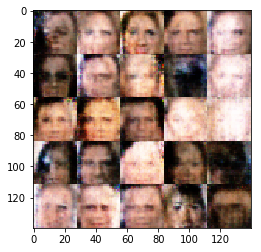

Epoch 1/1... Discriminator Loss: 0.8547... Generator Loss: 2.2697
Epoch 1/1... Discriminator Loss: 1.1165... Generator Loss: 0.8526
Epoch 1/1... Discriminator Loss: 1.0470... Generator Loss: 1.8183
Epoch 1/1... Discriminator Loss: 0.6993... Generator Loss: 2.1770
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.6350
Epoch 1/1... Discriminator Loss: 1.1243... Generator Loss: 3.2637
Epoch 1/1... Discriminator Loss: 0.8564... Generator Loss: 1.7866
Epoch 1/1... Discriminator Loss: 0.9761... Generator Loss: 0.9337
Epoch 1/1... Discriminator Loss: 0.8906... Generator Loss: 2.6408
Epoch 1/1... Discriminator Loss: 0.8693... Generator Loss: 1.4975
Epoch 1/1... Discriminator Loss: 1.0186... Generator Loss: 0.9973
Epoch 1/1... Discriminator Loss: 0.7734... Generator Loss: 2.5143
Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 1.1387
Epoch 1/1... Discriminator Loss: 0.8942... Generator Loss: 1.5841
Epoch 1/1... Discriminator Loss: 0.8081... Generator Loss: 1.5266
Epoch 1/1.

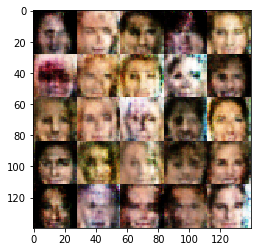

Epoch 1/1... Discriminator Loss: 0.9779... Generator Loss: 0.8986
Epoch 1/1... Discriminator Loss: 1.1215... Generator Loss: 0.7976
Epoch 1/1... Discriminator Loss: 1.1839... Generator Loss: 3.0083
Epoch 1/1... Discriminator Loss: 1.0519... Generator Loss: 1.0300
Epoch 1/1... Discriminator Loss: 1.6358... Generator Loss: 0.4532
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 3.0721
Epoch 1/1... Discriminator Loss: 0.7741... Generator Loss: 1.9874
Epoch 1/1... Discriminator Loss: 1.4903... Generator Loss: 0.6500
Epoch 1/1... Discriminator Loss: 0.9396... Generator Loss: 1.9931
Epoch 1/1... Discriminator Loss: 1.0149... Generator Loss: 1.3317
Epoch 1/1... Discriminator Loss: 1.0843... Generator Loss: 1.1557
Epoch 1/1... Discriminator Loss: 1.5622... Generator Loss: 2.0344
Epoch 1/1... Discriminator Loss: 1.4137... Generator Loss: 0.5980
Epoch 1/1... Discriminator Loss: 1.0058... Generator Loss: 1.3959
Epoch 1/1... Discriminator Loss: 0.8216... Generator Loss: 1.7455
Epoch 1/1.

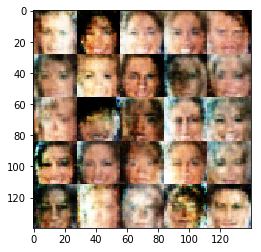

Epoch 1/1... Discriminator Loss: 0.9714... Generator Loss: 1.6546
Epoch 1/1... Discriminator Loss: 0.9444... Generator Loss: 1.6779
Epoch 1/1... Discriminator Loss: 1.1338... Generator Loss: 1.1692
Epoch 1/1... Discriminator Loss: 0.9027... Generator Loss: 2.0107
Epoch 1/1... Discriminator Loss: 0.7689... Generator Loss: 1.3282
Epoch 1/1... Discriminator Loss: 1.0555... Generator Loss: 1.2202
Epoch 1/1... Discriminator Loss: 0.7716... Generator Loss: 2.0384
Epoch 1/1... Discriminator Loss: 0.8639... Generator Loss: 1.3481
Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 0.9810
Epoch 1/1... Discriminator Loss: 1.1472... Generator Loss: 2.1878
Epoch 1/1... Discriminator Loss: 0.8117... Generator Loss: 1.5399
Epoch 1/1... Discriminator Loss: 1.1399... Generator Loss: 1.0852
Epoch 1/1... Discriminator Loss: 1.0865... Generator Loss: 2.3083
Epoch 1/1... Discriminator Loss: 1.3784... Generator Loss: 0.9471
Epoch 1/1... Discriminator Loss: 0.8486... Generator Loss: 1.8472
Epoch 1/1.

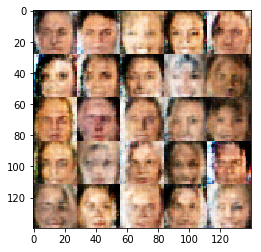

Epoch 1/1... Discriminator Loss: 1.1597... Generator Loss: 0.8529
Epoch 1/1... Discriminator Loss: 0.7980... Generator Loss: 1.8773
Epoch 1/1... Discriminator Loss: 1.0118... Generator Loss: 1.8285
Epoch 1/1... Discriminator Loss: 1.1637... Generator Loss: 0.9506
Epoch 1/1... Discriminator Loss: 1.1739... Generator Loss: 1.5480
Epoch 1/1... Discriminator Loss: 1.2476... Generator Loss: 1.1434
Epoch 1/1... Discriminator Loss: 1.1575... Generator Loss: 2.1129
Epoch 1/1... Discriminator Loss: 1.5051... Generator Loss: 0.8344
Epoch 1/1... Discriminator Loss: 0.8881... Generator Loss: 2.0348
Epoch 1/1... Discriminator Loss: 0.9017... Generator Loss: 2.6339
Epoch 1/1... Discriminator Loss: 1.1579... Generator Loss: 0.6626
Epoch 1/1... Discriminator Loss: 0.9659... Generator Loss: 2.4352
Epoch 1/1... Discriminator Loss: 0.7481... Generator Loss: 2.0429
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 0.8566
Epoch 1/1... Discriminator Loss: 0.7971... Generator Loss: 2.0278
Epoch 1/1.

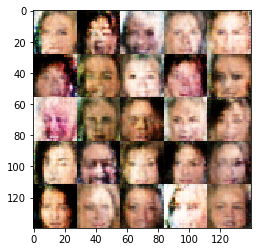

Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.6889
Epoch 1/1... Discriminator Loss: 0.9374... Generator Loss: 1.8695
Epoch 1/1... Discriminator Loss: 0.9847... Generator Loss: 0.7898
Epoch 1/1... Discriminator Loss: 0.8780... Generator Loss: 1.8447
Epoch 1/1... Discriminator Loss: 1.0522... Generator Loss: 1.0169
Epoch 1/1... Discriminator Loss: 0.8340... Generator Loss: 1.4129
Epoch 1/1... Discriminator Loss: 0.8930... Generator Loss: 2.0901
Epoch 1/1... Discriminator Loss: 1.2191... Generator Loss: 0.8378
Epoch 1/1... Discriminator Loss: 0.8422... Generator Loss: 1.8968
Epoch 1/1... Discriminator Loss: 0.9183... Generator Loss: 1.4188
Epoch 1/1... Discriminator Loss: 1.1383... Generator Loss: 1.1460
Epoch 1/1... Discriminator Loss: 0.9504... Generator Loss: 1.3141
Epoch 1/1... Discriminator Loss: 0.8927... Generator Loss: 1.8341
Epoch 1/1... Discriminator Loss: 0.8694... Generator Loss: 1.7363
Epoch 1/1... Discriminator Loss: 1.0687... Generator Loss: 1.4907
Epoch 1/1.

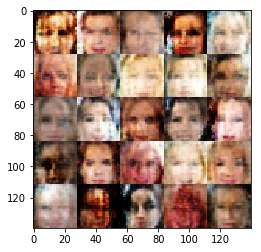

Epoch 1/1... Discriminator Loss: 1.0336... Generator Loss: 1.1765
Epoch 1/1... Discriminator Loss: 0.9794... Generator Loss: 2.1036
Epoch 1/1... Discriminator Loss: 1.0330... Generator Loss: 1.1905
Epoch 1/1... Discriminator Loss: 0.8198... Generator Loss: 1.5335
Epoch 1/1... Discriminator Loss: 0.9385... Generator Loss: 1.5086
Epoch 1/1... Discriminator Loss: 1.0364... Generator Loss: 1.1013
Epoch 1/1... Discriminator Loss: 0.8635... Generator Loss: 1.8309
Epoch 1/1... Discriminator Loss: 0.8945... Generator Loss: 1.4061
Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 1.1788
Epoch 1/1... Discriminator Loss: 0.9172... Generator Loss: 1.3154
Epoch 1/1... Discriminator Loss: 0.9867... Generator Loss: 1.8130
Epoch 1/1... Discriminator Loss: 1.1610... Generator Loss: 1.0152
Epoch 1/1... Discriminator Loss: 0.8411... Generator Loss: 1.4472
Epoch 1/1... Discriminator Loss: 1.0147... Generator Loss: 1.3939
Epoch 1/1... Discriminator Loss: 0.9746... Generator Loss: 1.1819
Epoch 1/1.

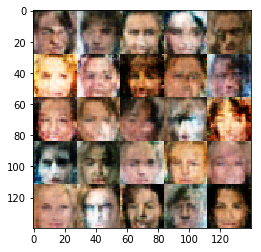

Epoch 1/1... Discriminator Loss: 1.2243... Generator Loss: 2.6526
Epoch 1/1... Discriminator Loss: 1.0875... Generator Loss: 0.9513
Epoch 1/1... Discriminator Loss: 0.8399... Generator Loss: 1.5218
Epoch 1/1... Discriminator Loss: 1.0987... Generator Loss: 0.8513
Epoch 1/1... Discriminator Loss: 1.1708... Generator Loss: 2.8530
Epoch 1/1... Discriminator Loss: 1.1606... Generator Loss: 0.8141
Epoch 1/1... Discriminator Loss: 0.9041... Generator Loss: 1.4743
Epoch 1/1... Discriminator Loss: 0.8922... Generator Loss: 1.5424
Epoch 1/1... Discriminator Loss: 1.1886... Generator Loss: 0.7427
Epoch 1/1... Discriminator Loss: 0.7018... Generator Loss: 1.8540
Epoch 1/1... Discriminator Loss: 0.9365... Generator Loss: 1.6320
Epoch 1/1... Discriminator Loss: 1.1460... Generator Loss: 0.7720
Epoch 1/1... Discriminator Loss: 0.7761... Generator Loss: 1.7830


KeyboardInterrupt: 

In [15]:
batch_size = 32
z_dim = 128
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.